# Data COVID 19

In [ ]:
import requests
import io
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import calendar
from google.colab import files
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [ ]:
# call this function if you want to save dataframe as excel to your local machine
def save_as_excel(df, file_name):
  df.to_excel(f'{file_name}.xlsx')
  files.download(f'{file_name}.xlsx')

# give the variable that represent a dataframe when calling this function
# ex:
# i have a dataframe called data_df
# if you want to save this dataframe as data.xlsx, so
# save_as_excel(data_df, data)

## A. Preparing Data
---

### 1. Data Mobility

In [ ]:
def read_csv_from_github(url):
  download = requests.get(url).content
  df = pd.read_csv(io.StringIO(download.decode('utf-8')))
  return df

In [ ]:
data_mobility_2020_df = read_csv_from_github('https://raw.githubusercontent.com/rimhart/CompfestData2023/main/2020_ID_Region_Mobility_Report.csv')
data_mobility_2021_df = read_csv_from_github('https://raw.githubusercontent.com/rimhart/CompfestData2023/main/2021_ID_Region_Mobility_Report.csv')
data_mobility_2022_df = read_csv_from_github('https://raw.githubusercontent.com/rimhart/CompfestData2023/main/2022_ID_Region_Mobility_Report.csv')

In [ ]:
data_mobility_2020_df

country_region_code country_region  sub_region_1  sub_region_2  \
0                      ID      Indonesia           NaN           NaN   
1                      ID      Indonesia           NaN           NaN   
2                      ID      Indonesia           NaN           NaN   
3                      ID      Indonesia           NaN           NaN   
4                      ID      Indonesia           NaN           NaN   
...                   ...            ...           ...           ...   
11230                  ID      Indonesia  West Sumatra           NaN   
11231                  ID      Indonesia  West Sumatra           NaN   
11232                  ID      Indonesia  West Sumatra           NaN   
11233                  ID      Indonesia  West Sumatra           NaN   
11234                  ID      Indonesia  West Sumatra           NaN   

       metro_area iso_3166_2_code  census_fips_code  \
0             NaN             NaN               NaN   
1             NaN             NaN               NaN   
2             NaN             NaN               NaN   
3             NaN             NaN               NaN   
4             NaN             NaN               NaN   
...           ...             ...               ...   
11230         NaN           ID-SB               NaN   
11231         NaN           ID-SB               NaN   
11232         NaN           ID-SB               NaN   
11233         NaN           ID-SB               NaN   
11234         NaN           ID-SB               NaN   

                          place_id        date  \
0      ChIJtwRkSdcHTCwRhfStG-dNe-M  2020-02-15   
1      ChIJtwRkSdcHTCwRhfStG-dNe-M  2020-02-16   
2      ChIJtwRkSdcHTCwRhfStG-dNe-M  2020-02-17   
3      ChIJtwRkSdcHTCwRhfStG-dNe-M  2020-02-18   
4      ChIJtwRkSdcHTCwRhfStG-dNe-M  2020-02-19   
...                            ...         ...   
11230  ChIJRUJ08Ey51C8RVTvVdblRsXA  2020-12-27   
11231  ChIJRUJ08Ey51C8RVTvVdblRsXA  2020-12-28   
11232  ChIJRUJ08Ey51C8RVTvVdblRsXA  2020-12-29   
11233  ChIJRUJ08Ey51C8RVTvVdblRsXA  2020-12-30   
11234  ChIJRUJ08Ey51C8RVTvVdblRsXA  2020-12-31   

       retail_and_recreation_percent_change_from_baseline  \
0                                                   -2.0    
1                                                   -3.0    
2                                                   -3.0    
3                                                   -3.0    
4                                                   -3.0    
...                                                  ...    
11230                                                4.0    
11231                                                2.0    
11232                                                1.0    
11233                                               11.0    
11234                                               17.0    

       grocery_and_pharmacy_percent_change_from_baseline  \
0                                                   -2.0   
1                                                   -3.0   
2                                                   -4.0   
3                                                   -2.0   
4                                                   -4.0   
...                                                  ...   
11230                                               28.0   
11231                                               25.0   
11232                                               26.0   
11233                                               38.0   
11234                                               50.0   

       parks_percent_change_from_baseline  \
0                                    -8.0   
1                                    -7.0   
2                                    -7.0   
3                                    -4.0   
4                                    -3.0   
...                                   ...   
11230                                29.0   
11231                                32.0   
11232               

In [ ]:
data_mobility_2021_df

country_region_code country_region  sub_region_1  sub_region_2  \
0                      ID      Indonesia           NaN           NaN   
1                      ID      Indonesia           NaN           NaN   
2                      ID      Indonesia           NaN           NaN   
3                      ID      Indonesia           NaN           NaN   
4                      ID      Indonesia           NaN           NaN   
...                   ...            ...           ...           ...   
12770                  ID      Indonesia  West Sumatra           NaN   
12771                  ID      Indonesia  West Sumatra           NaN   
12772                  ID      Indonesia  West Sumatra           NaN   
12773                  ID      Indonesia  West Sumatra           NaN   
12774                  ID      Indonesia  West Sumatra           NaN   

       metro_area iso_3166_2_code  census_fips_code  \
0             NaN             NaN               NaN   
1             NaN             NaN               NaN   
2             NaN             NaN               NaN   
3             NaN             NaN               NaN   
4             NaN             NaN               NaN   
...           ...             ...               ...   
12770         NaN           ID-SB               NaN   
12771         NaN           ID-SB               NaN   
12772         NaN           ID-SB               NaN   
12773         NaN           ID-SB               NaN   
12774         NaN           ID-SB               NaN   

                          place_id        date  \
0      ChIJtwRkSdcHTCwRhfStG-dNe-M  2021-01-01   
1      ChIJtwRkSdcHTCwRhfStG-dNe-M  2021-01-02   
2      ChIJtwRkSdcHTCwRhfStG-dNe-M  2021-01-03   
3      ChIJtwRkSdcHTCwRhfStG-dNe-M  2021-01-04   
4      ChIJtwRkSdcHTCwRhfStG-dNe-M  2021-01-05   
...                            ...         ...   
12770  ChIJRUJ08Ey51C8RVTvVdblRsXA  2021-12-27   
12771  ChIJRUJ08Ey51C8RVTvVdblRsXA  2021-12-28   
12772  ChIJRUJ08Ey51C8RVTvVdblRsXA  2021-12-29   
12773  ChIJRUJ08Ey51C8RVTvVdblRsXA  2021-12-30   
12774  ChIJRUJ08Ey51C8RVTvVdblRsXA  2021-12-31   

       retail_and_recreation_percent_change_from_baseline  \
0                                                    -25    
1                                                    -20    
2                                                    -21    
3                                                    -15    
4                                                    -18    
...                                                  ...    
12770                                                 26    
12771                                                 27    
12772                                                 33    
12773                                                 33    
12774                                                 35    

       grocery_and_pharmacy_percent_change_from_baseline  \
0                                                     -8   
1                                                      3   
2                                                     -2   
3                                                      5   
4                                                      3   
...                                                  ...   
12770                                                 54   
12771                                                 58   
12772                                                 63   
12773                                                 59   
12774                                                 71   

       parks_percent_change_from_baseline  \
0                                      18   
1                                       0   
2                                      -6   
3                                      -5   
4                                     -10   
...                                   ...   
12770                                  36   
12771                                  45   
12772               

In [ ]:
data_mobility_2022_df

country_region_code country_region  sub_region_1  sub_region_2  \
0                      ID      Indonesia           NaN           NaN   
1                      ID      Indonesia           NaN           NaN   
2                      ID      Indonesia           NaN           NaN   
3                      ID      Indonesia           NaN           NaN   
4                      ID      Indonesia           NaN           NaN   
...                   ...            ...           ...           ...   
10075                  ID      Indonesia  West Sumatra           NaN   
10076                  ID      Indonesia  West Sumatra           NaN   
10077                  ID      Indonesia  West Sumatra           NaN   
10078                  ID      Indonesia  West Sumatra           NaN   
10079                  ID      Indonesia  West Sumatra           NaN   

       metro_area iso_3166_2_code  census_fips_code  \
0             NaN             NaN               NaN   
1             NaN             NaN               NaN   
2             NaN             NaN               NaN   
3             NaN             NaN               NaN   
4             NaN             NaN               NaN   
...           ...             ...               ...   
10075         NaN           ID-SB               NaN   
10076         NaN           ID-SB               NaN   
10077         NaN           ID-SB               NaN   
10078         NaN           ID-SB               NaN   
10079         NaN           ID-SB               NaN   

                          place_id        date  \
0      ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-01-01   
1      ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-01-02   
2      ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-01-03   
3      ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-01-04   
4      ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-01-05   
...                            ...         ...   
10075  ChIJRUJ08Ey51C8RVTvVdblRsXA  2022-10-11   
10076  ChIJRUJ08Ey51C8RVTvVdblRsXA  2022-10-12   
10077  ChIJRUJ08Ey51C8RVTvVdblRsXA  2022-10-13   
10078  ChIJRUJ08Ey51C8RVTvVdblRsXA  2022-10-14   
10079  ChIJRUJ08Ey51C8RVTvVdblRsXA  2022-10-15   

       retail_and_recreation_percent_change_from_baseline  \
0                                                      3    
1                                                     11    
2                                                     14    
3                                                     11    
4                                                     12    
...                                                  ...    
10075                                                 24    
10076                                                 36    
10077                                                 34    
10078                                                 30    
10079                                                 12    

       grocery_and_pharmacy_percent_change_from_baseline  \
0                                                     24   
1                                                     35   
2                                                     36   
3                                                     33   
4                                                     34   
...                                                  ...   
10075                                                 67   
10076                                                 82   
10077                                                 73   
10078                                                 74   
10079                                                 50   

       parks_percent_change_from_baseline  \
0                                      46   
1                                      28   
2                                      20   
3                                      15   
4                                      17   
...                                   ...   
10075                                  39   
10076                                  57   
10077               

In [ ]:
# Merge data mobility year 2020, 2021, 2022
data_mobility_df = pd.concat([data_mobility_2020_df, data_mobility_2021_df, data_mobility_2022_df], join='outer')
data_mobility_df = data_mobility_df.sort_values(by=['sub_region_1', 'date'])
data_mobility_df = data_mobility_df.reset_index(drop=True)
data_mobility_df

country_region_code country_region sub_region_1  sub_region_2  \
0                      ID      Indonesia         Aceh           NaN   
1                      ID      Indonesia         Aceh           NaN   
2                      ID      Indonesia         Aceh           NaN   
3                      ID      Indonesia         Aceh           NaN   
4                      ID      Indonesia         Aceh           NaN   
...                   ...            ...          ...           ...   
34085                  ID      Indonesia          NaN           NaN   
34086                  ID      Indonesia          NaN           NaN   
34087                  ID      Indonesia          NaN           NaN   
34088                  ID      Indonesia          NaN           NaN   
34089                  ID      Indonesia          NaN           NaN   

       metro_area iso_3166_2_code  census_fips_code  \
0             NaN           ID-AC               NaN   
1             NaN           ID-AC               NaN   
2             NaN           ID-AC               NaN   
3             NaN           ID-AC               NaN   
4             NaN           ID-AC               NaN   
...           ...             ...               ...   
34085         NaN             NaN               NaN   
34086         NaN             NaN               NaN   
34087         NaN             NaN               NaN   
34088         NaN             NaN               NaN   
34089         NaN             NaN               NaN   

                          place_id        date  \
0      ChIJvcR8UN-bOTARYMogsoCdAwE  2020-02-15   
1      ChIJvcR8UN-bOTARYMogsoCdAwE  2020-02-16   
2      ChIJvcR8UN-bOTARYMogsoCdAwE  2020-02-17   
3      ChIJvcR8UN-bOTARYMogsoCdAwE  2020-02-18   
4      ChIJvcR8UN-bOTARYMogsoCdAwE  2020-02-19   
...                            ...         ...   
34085  ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-10-11   
34086  ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-10-12   
34087  ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-10-13   
34088  ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-10-14   
34089  ChIJtwRkSdcHTCwRhfStG-dNe-M  2022-10-15   

       retail_and_recreation_percent_change_from_baseline  \
0                                                   -1.0    
1                                                    4.0    
2                                                    4.0    
3                                                    0.0    
4                                                   -2.0    
...                                                  ...    
34085                                                9.0    
34086                                               12.0    
34087                                               10.0    
34088                                               12.0    
34089                                               10.0    

       grocery_and_pharmacy_percent_change_from_baseline  \
0                                                   -2.0   
1                                                    3.0   
2                                                    1.0   
3                                                   -1.0   
4                                                   -3.0   
...                                                  ...   
34085                                               27.0   
34086                                               30.0   
34087                                               27.0   
34088                                               29.0   
34089                                               29.0   

       parks_percent_change_from_baseline  \
0                                    -7.0   
1                                     5.0   
2                                     5.0   
3                                     0.0   
4                                     2.0   
...                                   ...   
34085                                38.0   
34086                                46.0   
34087                           

### 2. Data Covid Case

In [ ]:
data_covid_df = read_csv_from_github('https://raw.githubusercontent.com/rimhart/CompfestData2023/main/data_covid19_cases.csv')
data_covid_df = data_covid_df.sort_values(by=['subregion1_name', 'date'])
data_covid_df = data_covid_df.reset_index(drop=True)
data_covid_df

country_name subregion1_name  subregion2_name        date  population  \
0        Indonesia            Aceh              NaN  2020-01-01     5371532   
1        Indonesia            Aceh              NaN  2020-01-02     5371532   
2        Indonesia            Aceh              NaN  2020-01-03     5371532   
3        Indonesia            Aceh              NaN  2020-01-04     5371532   
4        Indonesia            Aceh              NaN  2020-01-05     5371532   
...            ...             ...              ...         ...         ...   
34680    Indonesia             NaN              NaN  2022-09-13   273523621   
34681    Indonesia             NaN              NaN  2022-09-14   273523621   
34682    Indonesia             NaN              NaN  2022-09-15   273523621   
34683    Indonesia             NaN              NaN  2022-09-16   273523621   
34684    Indonesia             NaN              NaN  2022-09-17   273523621   

       new_confirmed  cumulative_confirmed  new_deceased  cumulative_deceased  \
0                NaN                   NaN           NaN                  NaN   
1                NaN                   NaN           NaN                  NaN   
2                NaN                   NaN           NaN                  NaN   
3                NaN                   NaN           NaN                  NaN   
4                NaN                   NaN           NaN                  NaN   
...              ...                   ...           ...                  ...   
34680         2896.0             6397236.0          20.0             157807.0   
34681         2799.0             6400035.0          21.0             157828.0   
34682         2651.0             6402686.0          21.0             157849.0   
34683            NaN                   NaN           NaN                  NaN   
34684            NaN                   NaN           NaN                  NaN   

       new_persons_vaccinated  cumulative_persons_vaccinated  \
0                         NaN                            NaN   
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   
...                       ...                            ...   
34680                446977.0                    203882351.0   
34681                     NaN                            NaN   
34682                     NaN                            NaN   
34683                     NaN                            NaN   
34684                     NaN                            NaN   

       new_persons_fully_vaccinated  cumulative_persons_fully_vaccinated  \
0                               NaN                                  NaN   
1                               NaN                                  NaN   
2                               NaN                                  NaN   
3                               NaN                                  NaN   
4                               NaN                                  NaN   
...                             ...                                  ...   
34680                      142206.0                          170498655.0   
34681                           NaN                                  NaN   
34682                           NaN                                  NaN   
34683                           NaN                                  NaN   
34684                           NaN                                  NaN   

       new_recovered  cumulative_recovered  
0                NaN                   NaN  
1                NaN                   NaN  
2                NaN                   NaN  
3                NaN                   NaN  
4                NaN                   NaN  
...              ...                   ...  
34680         3617.0             6207858.0  
34681         3938.0             6211796.0

## B. Preprocessing Data
---

### 1. Renaming Columns

Data Covid Cases

In [ ]:
data_covid_df.columns

Index(['country_name', 'subregion1_name', 'subregion2_name', 'date',
       'population', 'new_confirmed', 'cumulative_confirmed', 'new_deceased',
       'cumulative_deceased', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'new_recovered',
       'cumulative_recovered'],
      dtype='object')

In [ ]:
data_covid_df = data_covid_df.rename(columns={'subregion1_name':'Province',
                                              'date':'Date',
                                              'new_confirmed':'New_Cases',
                                              'cumulative_confirmed':'Cumulative_Cases',
                                              'new_deceased':'New_Deceased',
                                              'cumulative_deceased':'Cumulative_Deceased',
                                              'new_persons_vaccinated':'New_Vaccinated',
                                              'cumulative_persons_vaccinated':'Cumulative_Vaccinated',
                                              'new_persons_fully_vaccinated':'New_Fully_Vaccinated',
                                              'cumulative_persons_fully_vaccinated':'Cumulative_Fully_Vaccinated',
                                              'new_persons_fully_vaccinated':'New_Fully_Vaccinated',
                                              'new_recovered':'New_Recovered',
                                              'cumulative_recovered':'Cumulative_Recovered'
                                              }
                                     )

In [ ]:
data_covid_df.columns

Index(['country_name', 'Province', 'subregion2_name', 'Date', 'population',
       'New_Cases', 'Cumulative_Cases', 'New_Deceased', 'Cumulative_Deceased',
       'New_Vaccinated', 'Cumulative_Vaccinated', 'New_Fully_Vaccinated',
       'Cumulative_Fully_Vaccinated', 'New_Recovered', 'Cumulative_Recovered'],
      dtype='object')

Data Mobility

In [ ]:
data_mobility_df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [ ]:
data_mobility_df = data_mobility_df.rename(columns={'sub_region_1':'Province',
                                                    'date':'Date',
                                                    'retail_and_recreation_percent_change_from_baseline':'Retail_Recreation',
                                                    'grocery_and_pharmacy_percent_change_from_baseline':'Grocery_Pharmacy',
                                                    'parks_percent_change_from_baseline':'Parks',
                                                    'transit_stations_percent_change_from_baseline':'Transit_Stations',
                                                    'workplaces_percent_change_from_baseline':'Workplaces',
                                                    'residential_percent_change_from_baseline':'Residential'
                                                    }
                                           )

In [ ]:
data_mobility_df.columns

Index(['country_region_code', 'country_region', 'Province', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'Date',
       'Retail_Recreation', 'Grocery_Pharmacy', 'Parks', 'Transit_Stations',
       'Workplaces', 'Residential'],
      dtype='object')

### 2. Removing Unnecessary Data

Data Covid Cases

In [ ]:
# check null data
data_covid_df.isnull().sum()

country_name                       0
Province                         991
subregion2_name                34685
Date                               0
population                         0
New_Cases                       2881
Cumulative_Cases                2881
New_Deceased                    2881
Cumulative_Deceased             2881
New_Vaccinated                 34188
Cumulative_Vaccinated          34187
New_Fully_Vaccinated           34194
Cumulative_Fully_Vaccinated    34195
New_Recovered                   2941
Cumulative_Recovered            2941
dtype: int64

In [ ]:
# check content of each columns
data_covid_df

country_name Province  subregion2_name        Date  population  \
0        Indonesia     Aceh              NaN  2020-01-01     5371532   
1        Indonesia     Aceh              NaN  2020-01-02     5371532   
2        Indonesia     Aceh              NaN  2020-01-03     5371532   
3        Indonesia     Aceh              NaN  2020-01-04     5371532   
4        Indonesia     Aceh              NaN  2020-01-05     5371532   
...            ...      ...              ...         ...         ...   
34680    Indonesia      NaN              NaN  2022-09-13   273523621   
34681    Indonesia      NaN              NaN  2022-09-14   273523621   
34682    Indonesia      NaN              NaN  2022-09-15   273523621   
34683    Indonesia      NaN              NaN  2022-09-16   273523621   
34684    Indonesia      NaN              NaN  2022-09-17   273523621   

       New_Cases  Cumulative_Cases  New_Deceased  Cumulative_Deceased  \
0            NaN               NaN           NaN                  NaN   
1            NaN               NaN           NaN                  NaN   
2            NaN               NaN           NaN                  NaN   
3            NaN               NaN           NaN                  NaN   
4            NaN               NaN           NaN                  NaN   
...          ...               ...           ...                  ...   
34680     2896.0         6397236.0          20.0             157807.0   
34681     2799.0         6400035.0          21.0             157828.0   
34682     2651.0         6402686.0          21.0             157849.0   
34683        NaN               NaN           NaN                  NaN   
34684        NaN               NaN           NaN                  NaN   

       New_Vaccinated  Cumulative_Vaccinated  New_Fully_Vaccinated  \
0                 NaN                    NaN                   NaN   
1                 NaN                    NaN                   NaN   
2                 NaN                    NaN                   NaN   
3                 NaN                    NaN                   NaN   
4                 NaN                    NaN                   NaN   
...               ...                    ...                   ...   
34680        446977.0            203882351.0              142206.0   
34681             NaN                    NaN                   NaN   
34682             NaN                    NaN                   NaN   
34683             NaN                    NaN                   NaN   
34684             NaN                    NaN                   NaN   

       Cumulative_Fully_Vaccinated  New_Recovered  Cumulative_Recovered  
0                              NaN            NaN                   NaN  
1                              NaN            NaN                   NaN  
2                              NaN            NaN                   NaN  
3                              NaN            NaN                   NaN  
4                              NaN            NaN                   NaN  
...                            ...            ...                   ...  
34680                  170498655.0         3617.0             6207858.0  
34681                          NaN         3938.0             6211796.0  
34682                          NaN         3915.0             6215711.0  
34683                          NaN            NaN                   NaN  
34684                          NaN            NaN                   NaN  

[34685 rows x 15 columns]

In [ ]:
# drop unnecessary columns
data_covid_df = data_covid_df.drop(columns=['country_name','subregion2_name','population'])
# show the result
data_covid_df

Province        Date  New_Cases  Cumulative_Cases  New_Deceased  \
0         Aceh  2020-01-01        NaN               NaN           NaN   
1         Aceh  2020-01-02        NaN               NaN           NaN   
2         Aceh  2020-01-03        NaN               NaN           NaN   
3         Aceh  2020-01-04        NaN               NaN           NaN   
4         Aceh  2020-01-05        NaN               NaN           NaN   
...        ...         ...        ...               ...           ...   
34680      NaN  2022-09-13     2896.0         6397236.0          20.0   
34681      NaN  2022-09-14     2799.0         6400035.0          21.0   
34682      NaN  2022-09-15     2651.0         6402686.0          21.0   
34683      NaN  2022-09-16        NaN               NaN           NaN   
34684      NaN  2022-09-17        NaN               NaN           NaN   

       Cumulative_Deceased  New_Vaccinated  Cumulative_Vaccinated  \
0                      NaN             NaN                    NaN   
1                      NaN             NaN                    NaN   
2                      NaN             NaN                    NaN   
3                      NaN             NaN                    NaN   
4                      NaN             NaN                    NaN   
...                    ...             ...                    ...   
34680             157807.0        446977.0            203882351.0   
34681             157828.0             NaN                    NaN   
34682             157849.0             NaN                    NaN   
34683                  NaN             NaN                    NaN   
34684                  NaN             NaN                    NaN   

       New_Fully_Vaccinated  Cumulative_Fully_Vaccinated  New_Recovered  \
0                       NaN                          NaN            NaN   
1                       NaN                          NaN            NaN   
2                       NaN                          NaN            NaN   
3                       NaN                          NaN            NaN   
4                       NaN                          NaN            NaN   
...                     ...                          ...            ...   
34680              142206.0                  170498655.0         3617.0   
34681                   NaN                          NaN         3938.0   
34682                   NaN                          NaN         3915.0   
34683                   NaN                          NaN            NaN   
34684                   NaN                          NaN            NaN   

       Cumulative_Recovered  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
34680             6207858.0  
34681             6211796.0  
34682             6215711.0  
34683                   NaN  
34684                   NaN  

[34685 rows x 12 columns]

Data Mobility

In [ ]:
# Check null data
data_mobility_df.isnull().sum()

country_region_code        0
country_region             0
Province                 974
sub_region_2           34090
metro_area             34090
iso_3166_2_code          974
census_fips_code       34090
place_id                   0
Date                       0
Retail_Recreation         50
Grocery_Pharmacy          99
Parks                    118
Transit_Stations         954
Workplaces                 0
Residential                0
dtype: int64

In [ ]:
# Check the content of each columns
data_mobility_df

country_region_code country_region Province  sub_region_2  metro_area  \
0                      ID      Indonesia     Aceh           NaN         NaN   
1                      ID      Indonesia     Aceh           NaN         NaN   
2                      ID      Indonesia     Aceh           NaN         NaN   
3                      ID      Indonesia     Aceh           NaN         NaN   
4                      ID      Indonesia     Aceh           NaN         NaN   
...                   ...            ...      ...           ...         ...   
34085                  ID      Indonesia      NaN           NaN         NaN   
34086                  ID      Indonesia      NaN           NaN         NaN   
34087                  ID      Indonesia      NaN           NaN         NaN   
34088                  ID      Indonesia      NaN           NaN         NaN   
34089                  ID      Indonesia      NaN           NaN         NaN   

      iso_3166_2_code  census_fips_code                     place_id  \
0               ID-AC               NaN  ChIJvcR8UN-bOTARYMogsoCdAwE   
1               ID-AC               NaN  ChIJvcR8UN-bOTARYMogsoCdAwE   
2               ID-AC               NaN  ChIJvcR8UN-bOTARYMogsoCdAwE   
3               ID-AC               NaN  ChIJvcR8UN-bOTARYMogsoCdAwE   
4               ID-AC               NaN  ChIJvcR8UN-bOTARYMogsoCdAwE   
...               ...               ...                          ...   
34085             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M   
34086             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M   
34087             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M   
34088             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M   
34089             NaN               NaN  ChIJtwRkSdcHTCwRhfStG-dNe-M   

             Date  Retail_Recreation  Grocery_Pharmacy  Parks  \
0      2020-02-15               -1.0              -2.0   -7.0   
1      2020-02-16                4.0               3.0    5.0   
2      2020-02-17                4.0               1.0    5.0   
3      2020-02-18                0.0              -1.0    0.0   
4      2020-02-19               -2.0              -3.0    2.0   
...           ...                ...               ...    ...   
34085  2022-10-11                9.0              27.0   38.0   
34086  2022-10-12               12.0              30.0   46.0   
34087  2022-10-13               10.0              27.0   38.0   
34088  2022-10-14               12.0              29.0   37.0   
34089  2022-10-15               10.0              29.0   29.0   

       Transit_Stations  Workplaces  Residential  
0                  -3.0           3            2  
1                   4.0           3            1  
2                  10.0           8            0  
3                   0.0           5            1  
4                   4.0           6            1  
...                 ...         ...          ...  
34085              -8.0          14           14  
34086              -9.0          15           13  
34087              -9.0          16           13  
34088              -7.0          18           13  
34089              -6.0          20           13  

[34090 rows x 15 columns]

In [ ]:
# Drop the null columns
data_mobility_df = data_mobility_df.drop(columns=['sub_region_2','metro_area','census_fips_code'])
# Drop the non-null unnecessary columns
data_mobility_df = data_mobility_df.drop(columns=['country_region_code','country_region','iso_3166_2_code','place_id'])
# show the result
data_mobility_df

Province        Date  Retail_Recreation  Grocery_Pharmacy  Parks  \
0         Aceh  2020-02-15               -1.0              -2.0   -7.0   
1         Aceh  2020-02-16                4.0               3.0    5.0   
2         Aceh  2020-02-17                4.0               1.0    5.0   
3         Aceh  2020-02-18                0.0              -1.0    0.0   
4         Aceh  2020-02-19               -2.0              -3.0    2.0   
...        ...         ...                ...               ...    ...   
34085      NaN  2022-10-11                9.0              27.0   38.0   
34086      NaN  2022-10-12               12.0              30.0   46.0   
34087      NaN  2022-10-13               10.0              27.0   38.0   
34088      NaN  2022-10-14               12.0              29.0   37.0   
34089      NaN  2022-10-15               10.0              29.0   29.0   

       Transit_Stations  Workplaces  Residential  
0                  -3.0           3            2  
1                   4.0           3            1  
2                  10.0           8            0  
3                   0.0           5            1  
4                   4.0           6            1  
...                 ...         ...          ...  
34085              -8.0          14           14  
34086              -9.0          15           13  
34087              -9.0          16           13  
34088              -7.0          18           13  
34089              -6.0          20           13  

[34090 rows x 8 columns]

### 4. Parsing Date Column

Data Covid Cases

In [ ]:
# change the data type of Date column
data_covid_df['Date'] = pd.to_datetime(data_covid_df['Date'])

In [ ]:
# Parsing Date column
year = data_covid_df['Date'].dt.year
month = data_covid_df['Date'].dt.month
day = data_covid_df['Date'].dt.day
# Create new columns for year,month,day
data_covid_df.insert(loc=2, column='Year', value=year)
data_covid_df.insert(loc=3, column='Month', value=month)
data_covid_df.insert(loc=4, column='Day', value=day)

In [ ]:
# # drop the older format of date
# data_covid_df = data_covid_df.drop(['Date'], axis=1)
# # show the result
data_covid_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-01-01  2020      1    1        NaN               NaN   
1         Aceh 2020-01-02  2020      1    2        NaN               NaN   
2         Aceh 2020-01-03  2020      1    3        NaN               NaN   
3         Aceh 2020-01-04  2020      1    4        NaN               NaN   
4         Aceh 2020-01-05  2020      1    5        NaN               NaN   
...        ...        ...   ...    ...  ...        ...               ...   
34680      NaN 2022-09-13  2022      9   13     2896.0         6397236.0   
34681      NaN 2022-09-14  2022      9   14     2799.0         6400035.0   
34682      NaN 2022-09-15  2022      9   15     2651.0         6402686.0   
34683      NaN 2022-09-16  2022      9   16        NaN               NaN   
34684      NaN 2022-09-17  2022      9   17        NaN               NaN   

       New_Deceased  Cumulative_Deceased  New_Vaccinated  \
0               NaN                  NaN             NaN   
1               NaN                  NaN             NaN   
2               NaN                  NaN             NaN   
3               NaN                  NaN             NaN   
4               NaN                  NaN             NaN   
...             ...                  ...             ...   
34680          20.0             157807.0        446977.0   
34681          21.0             157828.0             NaN   
34682          21.0             157849.0             NaN   
34683           NaN                  NaN             NaN   
34684           NaN                  NaN             NaN   

       Cumulative_Vaccinated  New_Fully_Vaccinated  \
0                        NaN                   NaN   
1                        NaN                   NaN   
2                        NaN                   NaN   
3                        NaN                   NaN   
4                        NaN                   NaN   
...                      ...                   ...   
34680            203882351.0              142206.0   
34681                    NaN                   NaN   
34682                    NaN                   NaN   
34683                    NaN                   NaN   
34684                    NaN                   NaN   

       Cumulative_Fully_Vaccinated  New_Recovered  Cumulative_Recovered  
0                              NaN            NaN                   NaN  
1                              NaN            NaN                   NaN  
2                              NaN            NaN                   NaN  
3                              NaN            NaN                   NaN  
4                              NaN            NaN                   NaN  
...                            ...            ...                   ...  
34680                  170498655.0         3617.0             6207858.0  
34681                          NaN         3938.0             6211796.0  
34682                          NaN         3915.0             6215711.0  
34683                          NaN            NaN                   NaN  
34684                          NaN            NaN                   NaN  

[34685 rows x 15 columns]

Data Mobility

In [ ]:
# Change the data type of Date column
data_mobility_df['Date'] = pd.to_datetime(data_mobility_df['Date'])

In [ ]:
# Parsing Date column
year = data_mobility_df['Date'].dt.year
month = data_mobility_df['Date'].dt.month
day = data_mobility_df['Date'].dt.day
# Create new columns for year,month,day
data_mobility_df.insert(loc=2, column='Year', value=year)
data_mobility_df.insert(loc=3, column='Month', value=month)
data_mobility_df.insert(loc=4, column='Day', value=day)

In [ ]:
# # drop the older format of date
# data_mobility_df = data_mobility_df.drop(['Date'], axis=1)
# # show the result
data_mobility_df

Province       Date  Year  Month  Day  Retail_Recreation  \
0         Aceh 2020-02-15  2020      2   15               -1.0   
1         Aceh 2020-02-16  2020      2   16                4.0   
2         Aceh 2020-02-17  2020      2   17                4.0   
3         Aceh 2020-02-18  2020      2   18                0.0   
4         Aceh 2020-02-19  2020      2   19               -2.0   
...        ...        ...   ...    ...  ...                ...   
34085      NaN 2022-10-11  2022     10   11                9.0   
34086      NaN 2022-10-12  2022     10   12               12.0   
34087      NaN 2022-10-13  2022     10   13               10.0   
34088      NaN 2022-10-14  2022     10   14               12.0   
34089      NaN 2022-10-15  2022     10   15               10.0   

       Grocery_Pharmacy  Parks  Transit_Stations  Workplaces  Residential  
0                  -2.0   -7.0              -3.0           3            2  
1                   3.0    5.0               4.0           3            1  
2                   1.0    5.0              10.0           8            0  
3                  -1.0    0.0               0.0           5            1  
4                  -3.0    2.0               4.0           6            1  
...                 ...    ...               ...         ...          ...  
34085              27.0   38.0              -8.0          14           14  
34086              30.0   46.0              -9.0          15           13  
34087              27.0   38.0              -9.0          16           13  
34088              29.0   37.0              -7.0          18           13  
34089              29.0   29.0              -6.0          20           13  

[34090 rows x 11 columns]

### 5. Merging Covid Cases Dataframe and Mobility Dataframe

#### Adjusting Date

In [ ]:
# show covid cases dataframe
data_covid_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-01-01  2020      1    1        NaN               NaN   
1         Aceh 2020-01-02  2020      1    2        NaN               NaN   
2         Aceh 2020-01-03  2020      1    3        NaN               NaN   
3         Aceh 2020-01-04  2020      1    4        NaN               NaN   
4         Aceh 2020-01-05  2020      1    5        NaN               NaN   
...        ...        ...   ...    ...  ...        ...               ...   
34680      NaN 2022-09-13  2022      9   13     2896.0         6397236.0   
34681      NaN 2022-09-14  2022      9   14     2799.0         6400035.0   
34682      NaN 2022-09-15  2022      9   15     2651.0         6402686.0   
34683      NaN 2022-09-16  2022      9   16        NaN               NaN   
34684      NaN 2022-09-17  2022      9   17        NaN               NaN   

       New_Deceased  Cumulative_Deceased  New_Vaccinated  \
0               NaN                  NaN             NaN   
1               NaN                  NaN             NaN   
2               NaN                  NaN             NaN   
3               NaN                  NaN             NaN   
4               NaN                  NaN             NaN   
...             ...                  ...             ...   
34680          20.0             157807.0        446977.0   
34681          21.0             157828.0             NaN   
34682          21.0             157849.0             NaN   
34683           NaN                  NaN             NaN   
34684           NaN                  NaN             NaN   

       Cumulative_Vaccinated  New_Fully_Vaccinated  \
0                        NaN                   NaN   
1                        NaN                   NaN   
2                        NaN                   NaN   
3                        NaN                   NaN   
4                        NaN                   NaN   
...                      ...                   ...   
34680            203882351.0              142206.0   
34681                    NaN                   NaN   
34682                    NaN                   NaN   
34683                    NaN                   NaN   
34684                    NaN                   NaN   

       Cumulative_Fully_Vaccinated  New_Recovered  Cumulative_Recovered  
0                              NaN            NaN                   NaN  
1                              NaN            NaN                   NaN  
2                              NaN            NaN                   NaN  
3                              NaN            NaN                   NaN  
4                              NaN            NaN                   NaN  
...                            ...            ...                   ...  
34680                  170498655.0         3617.0             6207858.0  
34681                          NaN         3938.0             6211796.0  
34682                          NaN         3915.0             6215711.0  
34683                          NaN            NaN                   NaN  
34684                          NaN            NaN                   NaN  

[34685 rows x 15 columns]

In [ ]:
# show mobility dataframe
data_mobility_df

Province       Date  Year  Month  Day  Retail_Recreation  \
0         Aceh 2020-02-15  2020      2   15               -1.0   
1         Aceh 2020-02-16  2020      2   16                4.0   
2         Aceh 2020-02-17  2020      2   17                4.0   
3         Aceh 2020-02-18  2020      2   18                0.0   
4         Aceh 2020-02-19  2020      2   19               -2.0   
...        ...        ...   ...    ...  ...                ...   
34085      NaN 2022-10-11  2022     10   11                9.0   
34086      NaN 2022-10-12  2022     10   12               12.0   
34087      NaN 2022-10-13  2022     10   13               10.0   
34088      NaN 2022-10-14  2022     10   14               12.0   
34089      NaN 2022-10-15  2022     10   15               10.0   

       Grocery_Pharmacy  Parks  Transit_Stations  Workplaces  Residential  
0                  -2.0   -7.0              -3.0           3            2  
1                   3.0    5.0               4.0           3            1  
2                   1.0    5.0              10.0           8            0  
3                  -1.0    0.0               0.0           5            1  
4                  -3.0    2.0               4.0           6            1  
...                 ...    ...               ...         ...          ...  
34085              27.0   38.0              -8.0          14           14  
34086              30.0   46.0              -9.0          15           13  
34087              27.0   38.0              -9.0          16           13  
34088              29.0   37.0              -7.0          18           13  
34089              29.0   29.0              -6.0          20           13  

[34090 rows x 11 columns]

In this case, we cutoff data earlier than Mar 2020 and more update than Aug 2022

In [ ]:
# filter data in data_covid_df
# get rows
rows_dropped1 = data_covid_df.loc[(data_covid_df['Year'] == 2020) & (data_covid_df['Month'] < 3)]
rows_dropped2 = data_covid_df.loc[(data_covid_df['Year'] == 2022) & (data_covid_df['Month'] > 8)]
# get index
index_dropped1 = list(rows_dropped1.index)
index_dropped2 = list(rows_dropped2.index)
index_dropped = index_dropped1 + index_dropped2
# drop data
data_covid_df = data_covid_df.drop(index=index_dropped)
data_covid_df = data_covid_df.reset_index(drop=True)
# show result
# pd.set_option('display.max_rows', None)
data_covid_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-03-01  2020      3    1        NaN               NaN   
1         Aceh 2020-03-02  2020      3    2        NaN               NaN   
2         Aceh 2020-03-03  2020      3    3        NaN               NaN   
3         Aceh 2020-03-04  2020      3    4        NaN               NaN   
4         Aceh 2020-03-05  2020      3    5        NaN               NaN   
...        ...        ...   ...    ...  ...        ...               ...   
31985      NaN 2022-08-27  2022      8   27     4170.0         6343076.0   
31986      NaN 2022-08-28  2022      8   28     3228.0         6346304.0   
31987      NaN 2022-08-29  2022      8   29     2871.0         6349175.0   
31988      NaN 2022-08-30  2022      8   30     5070.0         6354245.0   
31989      NaN 2022-08-31  2022      8   31     4563.0         6358808.0   

       New_Deceased  Cumulative_Deceased  New_Vaccinated  \
0               NaN                  NaN             NaN   
1               NaN                  NaN             NaN   
2               NaN                  NaN             NaN   
3               NaN                  NaN             NaN   
4               NaN                  NaN             NaN   
...             ...                  ...             ...   
31985          15.0             157493.0             NaN   
31986           7.0             157500.0        397494.0   
31987          21.0             157521.0             NaN   
31988          20.0             157541.0             NaN   
31989          25.0             157566.0             NaN   

       Cumulative_Vaccinated  New_Fully_Vaccinated  \
0                        NaN                   NaN   
1                        NaN                   NaN   
2                        NaN                   NaN   
3                        NaN                   NaN   
4                        NaN                   NaN   
...                      ...                   ...   
31985                    NaN                   NaN   
31986            203435374.0                   0.0   
31987                    NaN                   NaN   
31988                    NaN                   NaN   
31989                    NaN                   NaN   

       Cumulative_Fully_Vaccinated  New_Recovered  Cumulative_Recovered  
0                              NaN            NaN                   NaN  
1                              NaN            NaN                   NaN  
2                              NaN            NaN                   NaN  
3                              NaN            NaN                   NaN  
4                              NaN            NaN                   NaN  
...                            ...            ...                   ...  
31985                          NaN         2514.0             6137394.0  
31986                          NaN         5044.0             6142438.0  
31987                          NaN         4702.0             6147140.0  
31988                          NaN         4510.0             6151650.0  
31989                          NaN         4384.0             6156034.0  

[31990 rows x 15 columns]

In [ ]:
# filter data in data_mobility_df
# get rows
rows_dropped1 = data_mobility_df.loc[(data_mobility_df['Year'] == 2020) & (data_mobility_df['Month'] < 3)]
rows_dropped2 = data_mobility_df.loc[(data_mobility_df['Year'] == 2022) & (data_mobility_df['Month'] > 8)]
# get index
index_dropped1 = list(rows_dropped1.index)
index_dropped2 = list(rows_dropped2.index)
index_dropped = index_dropped1 + index_dropped2
# drop data
data_mobility_df = data_mobility_df.drop(index=index_dropped)
data_mobility_df = data_mobility_df.reset_index(drop=True)
# # show result
# pd.set_option('display.max_rows', None)
data_mobility_df

Province       Date  Year  Month  Day  Retail_Recreation  \
0         Aceh 2020-03-01  2020      3    1                3.0   
1         Aceh 2020-03-02  2020      3    2                6.0   
2         Aceh 2020-03-03  2020      3    3                4.0   
3         Aceh 2020-03-04  2020      3    4                4.0   
4         Aceh 2020-03-05  2020      3    5                4.0   
...        ...        ...   ...    ...  ...                ...   
31985      NaN 2022-08-27  2022      8   27               14.0   
31986      NaN 2022-08-28  2022      8   28               13.0   
31987      NaN 2022-08-29  2022      8   29               14.0   
31988      NaN 2022-08-30  2022      8   30               13.0   
31989      NaN 2022-08-31  2022      8   31               16.0   

       Grocery_Pharmacy  Parks  Transit_Stations  Workplaces  Residential  
0                   2.0   12.0              -2.0           5            2  
1                   5.0    5.0               5.0          10            0  
2                   7.0    5.0               5.0           9            0  
3                   6.0    8.0               9.0           8            0  
4                   7.0    3.0               8.0           7            0  
...                 ...    ...               ...         ...          ...  
31985              36.0   40.0              -4.0          24           16  
31986              35.0   39.0              -4.0          26           16  
31987              33.0   47.0              -9.0          17           17  
31988              34.0   46.0              -9.0          17           15  
31989              38.0   48.0              -8.0          17           15  

[31990 rows x 11 columns]

In [ ]:
pd.reset_option('display.max_rows')

Adjusting Province

In [ ]:
for index, row in data_mobility_df.iterrows():
  if (row['Province'] == 'South East Sulawesi'):
    data_mobility_df['Province'].iloc[index] = 'Southeast Sulawesi'
  if (row['Province'] == 'Special Region of Yogyakarta'):
    data_mobility_df['Province'].iloc[index] = 'Yogyakarta'

data_mobility_df = data_mobility_df.sort_values(by=['Province','Year','Month','Day'])
data_mobility_df = data_mobility_df.reset_index(drop=True)

<ipython-input-34-4028031daee0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mobility_df['Province'].iloc[index] = 'Southeast Sulawesi'
<ipython-input-34-4028031daee0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mobility_df['Province'].iloc[index] = 'Yogyakarta'


In [ ]:
data_covid_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-03-01  2020      3    1        NaN               NaN   
1         Aceh 2020-03-02  2020      3    2        NaN               NaN   
2         Aceh 2020-03-03  2020      3    3        NaN               NaN   
3         Aceh 2020-03-04  2020      3    4        NaN               NaN   
4         Aceh 2020-03-05  2020      3    5        NaN               NaN   
...        ...        ...   ...    ...  ...        ...               ...   
31985      NaN 2022-08-27  2022      8   27     4170.0         6343076.0   
31986      NaN 2022-08-28  2022      8   28     3228.0         6346304.0   
31987      NaN 2022-08-29  2022      8   29     2871.0         6349175.0   
31988      NaN 2022-08-30  2022      8   30     5070.0         6354245.0   
31989      NaN 2022-08-31  2022      8   31     4563.0         6358808.0   

       New_Deceased  Cumulative_Deceased  New_Vaccinated  \
0               NaN                  NaN             NaN   
1               NaN                  NaN             NaN   
2               NaN                  NaN             NaN   
3               NaN                  NaN             NaN   
4               NaN                  NaN             NaN   
...             ...                  ...             ...   
31985          15.0             157493.0             NaN   
31986           7.0             157500.0        397494.0   
31987          21.0             157521.0             NaN   
31988          20.0             157541.0             NaN   
31989          25.0             157566.0             NaN   

       Cumulative_Vaccinated  New_Fully_Vaccinated  \
0                        NaN                   NaN   
1                        NaN                   NaN   
2                        NaN                   NaN   
3                        NaN                   NaN   
4                        NaN                   NaN   
...                      ...                   ...   
31985                    NaN                   NaN   
31986            203435374.0                   0.0   
31987                    NaN                   NaN   
31988                    NaN                   NaN   
31989                    NaN                   NaN   

       Cumulative_Fully_Vaccinated  New_Recovered  Cumulative_Recovered  
0                              NaN            NaN                   NaN  
1                              NaN            NaN                   NaN  
2                              NaN            NaN                   NaN  
3                              NaN            NaN                   NaN  
4                              NaN            NaN                   NaN  
...                            ...            ...                   ...  
31985                          NaN         2514.0             6137394.0  
31986                          NaN         5044.0             6142438.0  
31987                          NaN         4702.0             6147140.0  
31988                          NaN         4510.0             6151650.0  
31989                          NaN         4384.0             6156034.0  

[31990 rows x 15 columns]

In [ ]:
data_mobility_df

Province       Date  Year  Month  Day  Retail_Recreation  \
0         Aceh 2020-03-01  2020      3    1                3.0   
1         Aceh 2020-03-02  2020      3    2                6.0   
2         Aceh 2020-03-03  2020      3    3                4.0   
3         Aceh 2020-03-04  2020      3    4                4.0   
4         Aceh 2020-03-05  2020      3    5                4.0   
...        ...        ...   ...    ...  ...                ...   
31985      NaN 2022-08-27  2022      8   27               14.0   
31986      NaN 2022-08-28  2022      8   28               13.0   
31987      NaN 2022-08-29  2022      8   29               14.0   
31988      NaN 2022-08-30  2022      8   30               13.0   
31989      NaN 2022-08-31  2022      8   31               16.0   

       Grocery_Pharmacy  Parks  Transit_Stations  Workplaces  Residential  
0                   2.0   12.0              -2.0           5            2  
1                   5.0    5.0               5.0          10            0  
2                   7.0    5.0               5.0           9            0  
3                   6.0    8.0               9.0           8            0  
4                   7.0    3.0               8.0           7            0  
...                 ...    ...               ...         ...          ...  
31985              36.0   40.0              -4.0          24           16  
31986              35.0   39.0              -4.0          26           16  
31987              33.0   47.0              -9.0          17           17  
31988              34.0   46.0              -9.0          17           15  
31989              38.0   48.0              -8.0          17           15  

[31990 rows x 11 columns]

Check differences between data_covid_df and data_mobility_df

In [ ]:
pd.set_option('display.max_rows', None)
df_diff = pd.concat([data_covid_df[['Province','Year','Month','Day']], data_mobility_df[['Province','Year','Month','Day']]]).drop_duplicates(keep=False)
df_diff

Empty DataFrame
Columns: [Province, Year, Month, Day]
Index: []

In [ ]:
len(df_diff)

0

In [ ]:
pd.reset_option('display.max_rows')

Merge data_covid_df and data_mobility_df into new dataframe

In [ ]:
# merge dataframe
data_mix_df = pd.concat([data_covid_df, data_mobility_df[['Retail_Recreation','Grocery_Pharmacy','Parks','Transit_Stations','Workplaces','Residential']]], axis=1)
# show data
data_mix_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-03-01  2020      3    1        NaN               NaN   
1         Aceh 2020-03-02  2020      3    2        NaN               NaN   
2         Aceh 2020-03-03  2020      3    3        NaN               NaN   
3         Aceh 2020-03-04  2020      3    4        NaN               NaN   
4         Aceh 2020-03-05  2020      3    5        NaN               NaN   
...        ...        ...   ...    ...  ...        ...               ...   
31985      NaN 2022-08-27  2022      8   27     4170.0         6343076.0   
31986      NaN 2022-08-28  2022      8   28     3228.0         6346304.0   
31987      NaN 2022-08-29  2022      8   29     2871.0         6349175.0   
31988      NaN 2022-08-30  2022      8   30     5070.0         6354245.0   
31989      NaN 2022-08-31  2022      8   31     4563.0         6358808.0   

       New_Deceased  Cumulative_Deceased  New_Vaccinated  \
0               NaN                  NaN             NaN   
1               NaN                  NaN             NaN   
2               NaN                  NaN             NaN   
3               NaN                  NaN             NaN   
4               NaN                  NaN             NaN   
...             ...                  ...             ...   
31985          15.0             157493.0             NaN   
31986           7.0             157500.0        397494.0   
31987          21.0             157521.0             NaN   
31988          20.0             157541.0             NaN   
31989          25.0             157566.0             NaN   

       Cumulative_Vaccinated  New_Fully_Vaccinated  \
0                        NaN                   NaN   
1                        NaN                   NaN   
2                        NaN                   NaN   
3                        NaN                   NaN   
4                        NaN                   NaN   
...                      ...                   ...   
31985                    NaN                   NaN   
31986            203435374.0                   0.0   
31987                    NaN                   NaN   
31988                    NaN                   NaN   
31989                    NaN                   NaN   

       Cumulative_Fully_Vaccinated  New_Recovered  Cumulative_Recovered  \
0                              NaN            NaN                   NaN   
1                              NaN            NaN                   NaN   
2                              NaN            NaN                   NaN   
3                              NaN            NaN                   NaN   
4                              NaN            NaN                   NaN   
...                            ...            ...                   ...   
31985                          NaN         2514.0             6137394.0   
31986                          NaN         5044.0             6142438.0   
31987                          NaN         4702.0             6147140.0   
31988                          NaN         4510.0             6151650.0   
31989                          NaN         4384.0             6156034.0   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
0                    3.0               2.0   12.0              -2.0   
1                    6.0               5.0    5.0               5.0   
2                    4.0               7.0    5.0               5.0   
3                    4.0               6.0    8.0               9.0   
4                    4.0               7.0    3.0               8.0   
...                  ...               ...    ...               ...   
31985               14.0              36.0   40.0              -4.0   
31986               13.0              35.0   39.0              -4.0   
31987               14.0              33.0   47.0              -9.0   
31988               13.0              34.0   46.0              -9.0   
31989               16.0              38.

In [ ]:
# save_as_excel(data_mix_df, 'data_mix_df')

### 6. Fixing Mixed Dataframe

Check data information

In [ ]:
data_mix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31990 entries, 0 to 31989
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Province                     31076 non-null  object        
 1   Date                         31990 non-null  datetime64[ns]
 2   Year                         31990 non-null  int64         
 3   Month                        31990 non-null  int64         
 4   Day                          31990 non-null  int64         
 5   New_Cases                    31361 non-null  float64       
 6   Cumulative_Cases             31361 non-null  float64       
 7   New_Deceased                 31361 non-null  float64       
 8   Cumulative_Deceased          31361 non-null  float64       
 9   New_Vaccinated               496 non-null    float64       
 10  Cumulative_Vaccinated        497 non-null    float64       
 11  New_Fully_Vaccinated         490 non-null

Adjusting Data Types

In [ ]:
# convert numerical data to float64 for processing null data
data_mix_df['Workplaces'] = data_mix_df['Workplaces'].astype(np.float64)
data_mix_df['Residential'] = data_mix_df['Residential'].astype(np.float64)

In [ ]:
# check the result
data_mix_df.dtypes

Province                               object
Date                           datetime64[ns]
Year                                    int64
Month                                   int64
Day                                     int64
New_Cases                             float64
Cumulative_Cases                      float64
New_Deceased                          float64
Cumulative_Deceased                   float64
New_Vaccinated                        float64
Cumulative_Vaccinated                 float64
New_Fully_Vaccinated                  float64
Cumulative_Fully_Vaccinated           float64
New_Recovered                         float64
Cumulative_Recovered                  float64
Retail_Recreation                     float64
Grocery_Pharmacy                      float64
Parks                                 float64
Transit_Stations                      float64
Workplaces                            float64
Residential                           float64
dtype: object

Drop Column Contain All Null Data

In [ ]:
data_mix_df = data_mix_df.drop(columns=['New_Vaccinated','Cumulative_Vaccinated','New_Fully_Vaccinated','Cumulative_Fully_Vaccinated'])
data_mix_df = data_mix_df.reset_index(drop=True)
data_mix_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-03-01  2020      3    1        NaN               NaN   
1         Aceh 2020-03-02  2020      3    2        NaN               NaN   
2         Aceh 2020-03-03  2020      3    3        NaN               NaN   
3         Aceh 2020-03-04  2020      3    4        NaN               NaN   
4         Aceh 2020-03-05  2020      3    5        NaN               NaN   
...        ...        ...   ...    ...  ...        ...               ...   
31985      NaN 2022-08-27  2022      8   27     4170.0         6343076.0   
31986      NaN 2022-08-28  2022      8   28     3228.0         6346304.0   
31987      NaN 2022-08-29  2022      8   29     2871.0         6349175.0   
31988      NaN 2022-08-30  2022      8   30     5070.0         6354245.0   
31989      NaN 2022-08-31  2022      8   31     4563.0         6358808.0   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
0               NaN                  NaN            NaN                   NaN   
1               NaN                  NaN            NaN                   NaN   
2               NaN                  NaN            NaN                   NaN   
3               NaN                  NaN            NaN                   NaN   
4               NaN                  NaN            NaN                   NaN   
...             ...                  ...            ...                   ...   
31985          15.0             157493.0         2514.0             6137394.0   
31986           7.0             157500.0         5044.0             6142438.0   
31987          21.0             157521.0         4702.0             6147140.0   
31988          20.0             157541.0         4510.0             6151650.0   
31989          25.0             157566.0         4384.0             6156034.0   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
0                    3.0               2.0   12.0              -2.0   
1                    6.0               5.0    5.0               5.0   
2                    4.0               7.0    5.0               5.0   
3                    4.0               6.0    8.0               9.0   
4                    4.0               7.0    3.0               8.0   
...                  ...               ...    ...               ...   
31985               14.0              36.0   40.0              -4.0   
31986               13.0              35.0   39.0              -4.0   
31987               14.0              33.0   47.0              -9.0   
31988               13.0              34.0   46.0              -9.0   
31989               16.0              38.0   48.0              -8.0   

       Workplaces  Residential  
0             5.0          2.0  
1            10.0          0.0  
2             9.0          0.0  
3             8.0          0.0  
4             7.0          0.0  
...           ...          ...  
31985        24.0         16.0  
31986        26.0         16.0  
31987        17.0         17.0  
31988        17.0         15.0  
31989        17.0         15.0  

[31990 rows x 17 columns]

In [ ]:
data_mix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31990 entries, 0 to 31989
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province              31076 non-null  object        
 1   Date                  31990 non-null  datetime64[ns]
 2   Year                  31990 non-null  int64         
 3   Month                 31990 non-null  int64         
 4   Day                   31990 non-null  int64         
 5   New_Cases             31361 non-null  float64       
 6   Cumulative_Cases      31361 non-null  float64       
 7   New_Deceased          31361 non-null  float64       
 8   Cumulative_Deceased   31361 non-null  float64       
 9   New_Recovered         31361 non-null  float64       
 10  Cumulative_Recovered  31361 non-null  float64       
 11  Retail_Recreation     31940 non-null  float64       
 12  Grocery_Pharmacy      31891 non-null  float64       
 13  Parks           

Handling other null data

In [ ]:
# check null data
data_mix_df.isnull().sum()

Province                914
Date                      0
Year                      0
Month                     0
Day                       0
New_Cases               629
Cumulative_Cases        629
New_Deceased            629
Cumulative_Deceased     629
New_Recovered           629
Cumulative_Recovered    629
Retail_Recreation        50
Grocery_Pharmacy         99
Parks                   118
Transit_Stations        903
Workplaces                0
Residential               0
dtype: int64

In [ ]:
# function to get null data
def get_null_data():
  # check for the null columns
  # Data Covid Cases
  NewCasesNull = data_mix_df['New_Cases'].isnull()
  CumulativeCasesNull = data_mix_df['Cumulative_Cases'].isnull()
  NewDeceasedNull = data_mix_df['New_Deceased'].isnull()
  CumulativeDeceasedNull = data_mix_df['Cumulative_Deceased'].isnull()
  NewRecoveredNull = data_mix_df['New_Recovered'].isnull()
  CumulativeRecoveredNull = data_mix_df['Cumulative_Recovered'].isnull()
  # Data Mobility
  RetailRecreationNull = data_mix_df['Retail_Recreation'].isnull()
  GroceryPharmacyNull = data_mix_df['Grocery_Pharmacy'].isnull()
  ParksNull = data_mix_df['Parks'].isnull()
  TransitStationsNull = data_mix_df['Transit_Stations'].isnull()
  WorkplacesNull = data_mix_df['Workplaces'].isnull()
  ResidentialNull = data_mix_df['Residential'].isnull()
  # locating null data
  data_covid_null = NewCasesNull | CumulativeCasesNull | NewDeceasedNull |  CumulativeDeceasedNull | NewRecoveredNull | CumulativeRecoveredNull
  data_mobility_null = RetailRecreationNull | GroceryPharmacyNull | ParksNull | TransitStationsNull | WorkplacesNull | ResidentialNull
  data_null = data_covid_null | data_mobility_null

  return data_null

In [ ]:
# function to show null data
def show_null_data():
  data_null = get_null_data()
  data_null_df = data_mix_df.loc[data_null]
  return data_null_df

In [ ]:
# show null data
pd.reset_option('display.max_rows')
show_null_data()

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0            Aceh 2020-03-01  2020      3    1        NaN               NaN   
1            Aceh 2020-03-02  2020      3    2        NaN               NaN   
2            Aceh 2020-03-03  2020      3    3        NaN               NaN   
3            Aceh 2020-03-04  2020      3    4        NaN               NaN   
4            Aceh 2020-03-05  2020      3    5        NaN               NaN   
...           ...        ...   ...    ...  ...        ...               ...   
30170  Yogyakarta 2020-03-09  2020      3    9        NaN               NaN   
30171  Yogyakarta 2020-03-10  2020      3   10        NaN               NaN   
30172  Yogyakarta 2020-03-11  2020      3   11        NaN               NaN   
30173  Yogyakarta 2020-03-12  2020      3   12        NaN               NaN   
30174  Yogyakarta 2020-03-13  2020      3   13        NaN               NaN   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
0               NaN                  NaN            NaN                   NaN   
1               NaN                  NaN            NaN                   NaN   
2               NaN                  NaN            NaN                   NaN   
3               NaN                  NaN            NaN                   NaN   
4               NaN                  NaN            NaN                   NaN   
...             ...                  ...            ...                   ...   
30170           NaN                  NaN            NaN                   NaN   
30171           NaN                  NaN            NaN                   NaN   
30172           NaN                  NaN            NaN                   NaN   
30173           NaN                  NaN            NaN                   NaN   
30174           NaN                  NaN            NaN                   NaN   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
0                    3.0               2.0   12.0              -2.0   
1                    6.0               5.0    5.0               5.0   
2                    4.0               7.0    5.0               5.0   
3                    4.0               6.0    8.0               9.0   
4                    4.0               7.0    3.0               8.0   
...                  ...               ...    ...               ...   
30170               -7.0              -9.0  -26.0             -23.0   
30171                9.0              10.0    0.0             -18.0   
30172               -1.0              -1.0  -17.0             -19.0   
30173                6.0               6.0   -6.0             -18.0   
30174                6.0               6.0   -9.0             -17.0   

       Workplaces  Residential  
0             5.0          2.0  
1            10.0          0.0  
2             9.0          0.0  
3             8.0          0.0  
4             7.0          0.0  
...           ...          ...  
30170         4.0          2.0  
30171         5.0         -1.0  
30172         5.0          1.0  
30173         6.0          0.0  
30174         7.0          0.0  

[1538 rows x 17 columns]

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
# get mean and standard deviation at certain province in certain time
def find_mean_std(province, year, month):
  requirement = (data_mix_df['Province'] == province) & (data_mix_df['Year'] == year) & (data_mix_df['Month'] == month)
  rows_data = data_mix_df.loc[requirement]
  index_data = list(rows_data.index)
  mean_data = round(data_mobility_df.iloc[index_data][['Retail_Recreation','Grocery_Pharmacy','Parks','Transit_Stations','Workplaces','Residential']].mean())
  std_data = round(data_mobility_df.iloc[index_data][['Retail_Recreation','Grocery_Pharmacy','Parks','Transit_Stations','Workplaces','Residential']].std())
  return mean_data, std_data

In [ ]:
# find null data at certain province in certain time
def find_null_data(province, year, month):
  data_null = get_null_data()

  df = data_mix_df.loc[(data_mix_df['Province'] == province) & (data_mix_df['Year'] == year) & (data_mix_df['Month'] == month) & (data_null)]
  return df

In [ ]:
def fill_covid_data(index):
  if np.isnan(data_mix_df['New_Cases'].iloc[index]):
    data_mix_df['New_Cases'].iloc[index] = 0
  if np.isnan(data_mix_df['Cumulative_Cases'].iloc[index]):
    data_mix_df['Cumulative_Cases'].iloc[index] = 0
  if np.isnan(data_mix_df['New_Deceased'].iloc[index]):
    data_mix_df['New_Deceased'].iloc[index] = 0
  if np.isnan(data_mix_df['Cumulative_Deceased'].iloc[index]):
    data_mix_df['Cumulative_Deceased'].iloc[index] = 0
  if np.isnan(data_mix_df['New_Recovered'].iloc[index]):
    data_mix_df['New_Recovered'].iloc[index] = 0
  if np.isnan(data_mix_df['Cumulative_Recovered'].iloc[index]):
    data_mix_df['Cumulative_Recovered'].iloc[index] = 0

In [ ]:
def fill_mobility_data(province, year, month, index, mean, std):
  list_data = np.random.normal(loc=mean, scale=std, size=None)
  list_data = list(list_data)

  if np.isnan(data_mix_df['Retail_Recreation'].iloc[index]) :
    data = list_data[0]
    data_mix_df['Retail_Recreation'].iloc[index] = data

  if np.isnan(data_mix_df['Grocery_Pharmacy'].iloc[index]) :
    data = list_data[1]
    data_mix_df['Grocery_Pharmacy'].iloc[index] = data

  if np.isnan(data_mix_df['Parks'].iloc[index]) :
    data = list_data[2]
    data_mix_df['Parks'].iloc[index] = data

  if np.isnan(data_mix_df['Transit_Stations'].iloc[index]) :
    data = list_data[3]
    data_mix_df['Transit_Stations'].iloc[index] = data

  if np.isnan(data_mix_df['Workplaces'].iloc[index]) :
    data = list_data[4]
    data_mix_df['Workplaces'].iloc[index] = data

  if np.isnan(data_mix_df['Residential'].iloc[index]) :
    data = list_data[5]
    data_mix_df['Residential'].iloc[index] = data

  return mean, std

In [ ]:
# creating data null dataframe
data_null = get_null_data()
data_null_df = data_mix_df.loc[data_null]
data_null_df
# variable to keep value temporarily
cache_province = ''
cache_year = 0
cache_month = 0
cache_mean = 0
cache_std = 0

# iterate through data null dataframe and fill null data automatically
for index, row in data_null_df.iterrows():
  province = row['Province']
  year = row['Year']
  month = row['Month']

  if ((province == cache_province) and (year == cache_year) and (month == cache_month)):
    mean, std = cache_mean, cache_std
  else:
    mean, std = find_mean_std(province, year, month)

  fill_covid_data(index)
  fill_mobility_data(province, year, month, index, mean, std)

  cache_province = province
  cache_year = year
  cache_month = month

  cache_mean = mean
  cache_std = std

<ipython-input-54-91078c73c491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mix_df['New_Cases'].iloc[index] = 0
<ipython-input-54-91078c73c491>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mix_df['Cumulative_Cases'].iloc[index] = 0
<ipython-input-54-91078c73c491>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mix_df['New_Deceased'].iloc[index] = 0
<ipython-input-54-91078c73c491>:9: SettingWithCopyWarning: 
A v

In [ ]:
# Check for the null data
data_mix_df.isnull().sum()

Province                914
Date                      0
Year                      0
Month                     0
Day                       0
New_Cases                 0
Cumulative_Cases          0
New_Deceased              0
Cumulative_Deceased       0
New_Recovered             0
Cumulative_Recovered      0
Retail_Recreation         0
Grocery_Pharmacy          0
Parks                     0
Transit_Stations        364
Workplaces                0
Residential               0
dtype: int64

In [ ]:
show_null_data()

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
10603  Gorontalo 2021-09-01  2021      9    1       28.0           11241.0   
10604  Gorontalo 2021-09-02  2021      9    2       35.0           11276.0   
10605  Gorontalo 2021-09-03  2021      9    3       27.0           11303.0   
10606  Gorontalo 2021-09-04  2021      9    4        8.0           11311.0   
10608  Gorontalo 2021-09-06  2021      9    6        8.0           11347.0   
...          ...        ...   ...    ...  ...        ...               ...   
10963  Gorontalo 2022-08-27  2022      8   27        0.0           13941.0   
10964  Gorontalo 2022-08-28  2022      8   28        0.0           13941.0   
10965  Gorontalo 2022-08-29  2022      8   29        0.0           13941.0   
10966  Gorontalo 2022-08-30  2022      8   30        0.0           13941.0   
10967  Gorontalo 2022-08-31  2022      8   31        0.0           13941.0   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
10603           5.0                427.0           91.0               10065.0   
10604           2.0                429.0           24.0               10089.0   
10605           3.0                432.0          107.0               10196.0   
10606           5.0                437.0          101.0               10297.0   
10608           4.0                444.0           96.0               10423.0   
...             ...                  ...            ...                   ...   
10963           0.0                487.0            0.0               13433.0   
10964           0.0                487.0            0.0               13433.0   
10965           0.0                487.0            0.0               13433.0   
10966           0.0                487.0            0.0               13433.0   
10967           0.0                487.0            0.0               13433.0   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
10603               22.0              44.0   36.0               NaN   
10604               32.0              50.0   38.0               NaN   
10605               21.0              37.0   31.0               NaN   
10606               14.0              32.0   17.0               NaN   
10608               33.0              50.0   42.0               NaN   
...                  ...               ...    ...               ...   
10963               39.0              53.0  112.0               NaN   
10964               43.0              55.0   82.0               NaN   
10965               42.0              54.0   83.0               NaN   
10966               28.0              43.0   57.0               NaN   
10967               45.0              61.0  112.0               NaN   

       Workplaces  Residential  
10603       -10.0          2.0  
10604        -7.0          1.0  
10605        -7.0          1.0  
10606        -8.0          3.0  
10608        -9.0          1.0  
...           ...          ...  
10963        36.0         14.0  
10964        36.0         14.0  
10965        24.0         17.0  
10966        24.0         17.0  
10967        27.0         14.0  

[364 rows x 17 columns]

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
# check data
data_mix_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-03-01  2020      3    1        0.0               0.0   
1         Aceh 2020-03-02  2020      3    2        0.0               0.0   
2         Aceh 2020-03-03  2020      3    3        0.0               0.0   
3         Aceh 2020-03-04  2020      3    4        0.0               0.0   
4         Aceh 2020-03-05  2020      3    5        0.0               0.0   
...        ...        ...   ...    ...  ...        ...               ...   
31985      NaN 2022-08-27  2022      8   27     4170.0         6343076.0   
31986      NaN 2022-08-28  2022      8   28     3228.0         6346304.0   
31987      NaN 2022-08-29  2022      8   29     2871.0         6349175.0   
31988      NaN 2022-08-30  2022      8   30     5070.0         6354245.0   
31989      NaN 2022-08-31  2022      8   31     4563.0         6358808.0   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
0               0.0                  0.0            0.0                   0.0   
1               0.0                  0.0            0.0                   0.0   
2               0.0                  0.0            0.0                   0.0   
3               0.0                  0.0            0.0                   0.0   
4               0.0                  0.0            0.0                   0.0   
...             ...                  ...            ...                   ...   
31985          15.0             157493.0         2514.0             6137394.0   
31986           7.0             157500.0         5044.0             6142438.0   
31987          21.0             157521.0         4702.0             6147140.0   
31988          20.0             157541.0         4510.0             6151650.0   
31989          25.0             157566.0         4384.0             6156034.0   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
0                    3.0               2.0   12.0              -2.0   
1                    6.0               5.0    5.0               5.0   
2                    4.0               7.0    5.0               5.0   
3                    4.0               6.0    8.0               9.0   
4                    4.0               7.0    3.0               8.0   
...                  ...               ...    ...               ...   
31985               14.0              36.0   40.0              -4.0   
31986               13.0              35.0   39.0              -4.0   
31987               14.0              33.0   47.0              -9.0   
31988               13.0              34.0   46.0              -9.0   
31989               16.0              38.0   48.0              -8.0   

       Workplaces  Residential  
0             5.0          2.0  
1            10.0          0.0  
2             9.0          0.0  
3             8.0          0.0  
4             7.0          0.0  
...           ...          ...  
31985        24.0         16.0  
31986        26.0         16.0  
31987        17.0         17.0  
31988        17.0         15.0  
31989        17.0         15.0  

[31990 rows x 17 columns]

We analyze the data above and getting that sometimes cumulative data is not synchronized with daily data. Because of that, we decided to apply a function to fix the value of cumulative data

Check for the duplicated data

In [ ]:
data_mix_df.duplicated().sum()

0

There are no duplicated data

Ensuring data types

In [ ]:
# recheck data types
data_mix_df.dtypes

Province                        object
Date                    datetime64[ns]
Year                             int64
Month                            int64
Day                              int64
New_Cases                      float64
Cumulative_Cases               float64
New_Deceased                   float64
Cumulative_Deceased            float64
New_Recovered                  float64
Cumulative_Recovered           float64
Retail_Recreation              float64
Grocery_Pharmacy               float64
Parks                          float64
Transit_Stations               float64
Workplaces                     float64
Residential                    float64
dtype: object

In [ ]:
# convert data types
data_mix_df['New_Cases'] = data_mix_df['New_Cases'].astype(np.int64)
data_mix_df['Cumulative_Cases'] = data_mix_df['Cumulative_Cases'].astype(np.int64)
data_mix_df['New_Deceased'] = data_mix_df['New_Deceased'].astype(np.int64)
data_mix_df['Cumulative_Deceased'] = data_mix_df['Cumulative_Deceased'].astype(np.int64)
data_mix_df['New_Recovered'] = data_mix_df['New_Recovered'].astype(np.int64)
data_mix_df['Cumulative_Recovered'] = data_mix_df['Cumulative_Recovered'].astype(np.int64)

In [ ]:
# check the result
data_mix_df.dtypes

Province                        object
Date                    datetime64[ns]
Year                             int64
Month                            int64
Day                              int64
New_Cases                        int64
Cumulative_Cases                 int64
New_Deceased                     int64
Cumulative_Deceased              int64
New_Recovered                    int64
Cumulative_Recovered             int64
Retail_Recreation              float64
Grocery_Pharmacy               float64
Parks                          float64
Transit_Stations               float64
Workplaces                     float64
Residential                    float64
dtype: object

In [ ]:
# # change format of numerical data
# data_mix_styler_df = data_mix_df.style.format({
#     "Population": "{:,d}",
#     "New_Cases": "{:,d}",
#     "Cumulative_Cases": "{:,d}",
#     "New_Deceased": "{:,d}",
#     "Cumulative_Deceased": "{:,d}",
#     "New_Recovered": "{:,d}",
#     "Retail_Recreation": "{:.1f}",
#     "Grocery_Pharmacy": "{:.1f}",
#     "Parks": "{:.1f}",
#     "Transit_Stations": "{:.1f}",
#     "Workplaces": "{:.1f}",
#     "Residential": "{:.1f}"
# })

# # show result
# data_mix_styler_df

In [ ]:
pd.reset_option('display.max_rows')
data_mix_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-03-01  2020      3    1          0                 0   
1         Aceh 2020-03-02  2020      3    2          0                 0   
2         Aceh 2020-03-03  2020      3    3          0                 0   
3         Aceh 2020-03-04  2020      3    4          0                 0   
4         Aceh 2020-03-05  2020      3    5          0                 0   
...        ...        ...   ...    ...  ...        ...               ...   
31985      NaN 2022-08-27  2022      8   27       4170           6343076   
31986      NaN 2022-08-28  2022      8   28       3228           6346304   
31987      NaN 2022-08-29  2022      8   29       2871           6349175   
31988      NaN 2022-08-30  2022      8   30       5070           6354245   
31989      NaN 2022-08-31  2022      8   31       4563           6358808   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
0                 0                    0              0                     0   
1                 0                    0              0                     0   
2                 0                    0              0                     0   
3                 0                    0              0                     0   
4                 0                    0              0                     0   
...             ...                  ...            ...                   ...   
31985            15               157493           2514               6137394   
31986             7               157500           5044               6142438   
31987            21               157521           4702               6147140   
31988            20               157541           4510               6151650   
31989            25               157566           4384               6156034   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
0                    3.0               2.0   12.0              -2.0   
1                    6.0               5.0    5.0               5.0   
2                    4.0               7.0    5.0               5.0   
3                    4.0               6.0    8.0               9.0   
4                    4.0               7.0    3.0               8.0   
...                  ...               ...    ...               ...   
31985               14.0              36.0   40.0              -4.0   
31986               13.0              35.0   39.0              -4.0   
31987               14.0              33.0   47.0              -9.0   
31988               13.0              34.0   46.0              -9.0   
31989               16.0              38.0   48.0              -8.0   

       Workplaces  Residential  
0             5.0          2.0  
1            10.0          0.0  
2             9.0          0.0  
3             8.0          0.0  
4             7.0          0.0  
...           ...          ...  
31985        24.0         16.0  
31986        26.0         16.0  
31987        17.0         17.0  
31988        17.0         15.0  
31989        17.0         15.0  

[31990 rows x 17 columns]

### 7. Finding Outlier

Data Mobility

In [ ]:
Q1 = data_mix_df.quantile(q=0.25)
Q2 = data_mix_df.quantile(q=0.50)
Q3 = data_mix_df.quantile(q=0.75)
IQR = Q3 - Q1

<ipython-input-67-1fedba85722e>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data_mix_df.quantile(q=0.25)
<ipython-input-67-1fedba85722e>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q2 = data_mix_df.quantile(q=0.50)
<ipython-input-67-1fedba85722e>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data_mix_df.quantile(q=0.75)


In [ ]:
Q1

Year                    2020.0
Month                      4.0
Day                        8.0
New_Cases                  3.0
Cumulative_Cases        4284.5
New_Deceased               0.0
Cumulative_Deceased      110.0
New_Recovered              1.0
Cumulative_Recovered    2964.0
Retail_Recreation        -17.0
Grocery_Pharmacy          -1.0
Parks                    -17.0
Transit_Stations         -38.0
Workplaces               -25.0
Residential                2.0
Name: 0.25, dtype: float64

In [ ]:
Q3

Year                     2022.00
Month                       9.00
Day                        23.00
New_Cases                 127.75
Cumulative_Cases        65613.00
New_Deceased                3.00
Cumulative_Deceased      2067.75
New_Recovered             120.00
Cumulative_Recovered    62918.50
Retail_Recreation          10.00
Grocery_Pharmacy           36.00
Parks                      19.00
Transit_Stations           -3.00
Workplaces                 -1.00
Residential                12.00
Name: 0.75, dtype: float64

In [ ]:
IQR

Year                        2.00
Month                       5.00
Day                        15.00
New_Cases                 124.75
Cumulative_Cases        61328.50
New_Deceased                3.00
Cumulative_Deceased      1957.75
New_Recovered             119.00
Cumulative_Recovered    59954.50
Retail_Recreation          27.00
Grocery_Pharmacy           37.00
Parks                      36.00
Transit_Stations           35.00
Workplaces                 24.00
Residential                10.00
dtype: float64

In [ ]:
far_lower_fence = Q1 - 3*IQR
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
far_upper_fence = Q3 + 3*IQR

In [ ]:
# data covid cases outlier
# perlu ditampilin ga?

In [ ]:
# data mobility outlier
RetailRecreationOutlier = (data_mix_df['Retail_Recreation'] < lower_fence['Retail_Recreation']) | (data_mix_df['Retail_Recreation'] > upper_fence['Retail_Recreation'])
GroceryPharmacyOutlier = (data_mix_df['Grocery_Pharmacy'] < lower_fence['Grocery_Pharmacy']) | (data_mix_df['Grocery_Pharmacy'] > upper_fence['Grocery_Pharmacy'])
ParksOutlier = (data_mix_df['Parks'] < lower_fence['Parks']) | (data_mix_df['Parks'] > upper_fence['Parks'])
TransitStationsOutlier = (data_mix_df['Transit_Stations'] < lower_fence['Transit_Stations']) | (data_mix_df['Transit_Stations'] > upper_fence['Transit_Stations'])
WorkplacesOutlier = (data_mix_df['Workplaces'] < lower_fence['Workplaces']) | (data_mix_df['Workplaces'] > upper_fence['Workplaces'])
ResidentialOutlier = (data_mix_df['Residential'] < lower_fence['Residential']) | (data_mix_df['Residential'] > upper_fence['Residential'])

In [ ]:
data_outlier = RetailRecreationOutlier | GroceryPharmacyOutlier | ParksOutlier | TransitStationsOutlier | WorkplacesOutlier | ResidentialOutlier
data_outlier_df = data_mix_df.loc[data_outlier]
data_outlier_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
437       Aceh 2021-05-12  2021      5   12        128             12126   
438       Aceh 2021-05-13  2021      5   13         26             12152   
439       Aceh 2021-05-14  2021      5   14          5             12157   
440       Aceh 2021-05-15  2021      5   15         57             12214   
506       Aceh 2021-07-20  2021      7   20         52             21013   
...        ...        ...   ...    ...  ...        ...               ...   
31875      NaN 2022-05-09  2022      5    9        254           6048685   
31882      NaN 2022-05-16  2022      5   16        182           6050958   
31892      NaN 2022-05-26  2022      5   26        246           6053670   
31898      NaN 2022-06-01  2022      6    1        368           6055341   
31975      NaN 2022-08-17  2022      8   17       5253           6297484   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
437               3                  485             32                 10219   
438               1                  486             22                 10241   
439               3                  489             18                 10259   
440               2                  491             12                 10271   
506               0                  924             11                 16228   
...             ...                  ...            ...                   ...   
31875            15               156396            353               5886211   
31882             6               156464            263               5889797   
31892             3               156556            243               5894103   
31898             3               156594            183               5895606   
31975            19               157296           4324               6087056   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
437                  7.0              83.0    2.0             -28.0   
438                -22.0              -7.0   -2.0             -49.0   
439                 -8.0              11.0   19.0             -46.0   
440                  2.0              22.0   45.0             -32.0   
506                -18.0              -6.0   14.0             -47.0   
...                  ...               ...    ...               ...   
31875               24.0              42.0   85.0               4.0   
31882               25.0              38.0  105.0               2.0   
31892               18.0              33.0   76.0              -8.0   
31898               23.0              41.0   88.0             -12.0   
31975               22.0              38.0  103.0             -17.0   

       Workplaces  Residential  
437         -64.0         -4.0  
438         -74.0        -12.0  
439         -74.0         -7.0  
440         -62.0        -10.0  
506         -71.0         -8.0  
...           ...          ...  
31875        -4.0         14.0  
31882       -48.0         21.0  
31892       -44.0         22.0  
31898       -44.0         22.0  
31975       -37.0         25.0  

[2933 rows x 17 columns]

In [ ]:
pd.reset_option('display.max_rows')

### 8. Creating Data National Dataframe

In [ ]:
data_mix_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0         Aceh 2020-03-01  2020      3    1          0                 0   
1         Aceh 2020-03-02  2020      3    2          0                 0   
2         Aceh 2020-03-03  2020      3    3          0                 0   
3         Aceh 2020-03-04  2020      3    4          0                 0   
4         Aceh 2020-03-05  2020      3    5          0                 0   
...        ...        ...   ...    ...  ...        ...               ...   
31985      NaN 2022-08-27  2022      8   27       4170           6343076   
31986      NaN 2022-08-28  2022      8   28       3228           6346304   
31987      NaN 2022-08-29  2022      8   29       2871           6349175   
31988      NaN 2022-08-30  2022      8   30       5070           6354245   
31989      NaN 2022-08-31  2022      8   31       4563           6358808   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
0                 0                    0              0                     0   
1                 0                    0              0                     0   
2                 0                    0              0                     0   
3                 0                    0              0                     0   
4                 0                    0              0                     0   
...             ...                  ...            ...                   ...   
31985            15               157493           2514               6137394   
31986             7               157500           5044               6142438   
31987            21               157521           4702               6147140   
31988            20               157541           4510               6151650   
31989            25               157566           4384               6156034   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
0                    3.0               2.0   12.0              -2.0   
1                    6.0               5.0    5.0               5.0   
2                    4.0               7.0    5.0               5.0   
3                    4.0               6.0    8.0               9.0   
4                    4.0               7.0    3.0               8.0   
...                  ...               ...    ...               ...   
31985               14.0              36.0   40.0              -4.0   
31986               13.0              35.0   39.0              -4.0   
31987               14.0              33.0   47.0              -9.0   
31988               13.0              34.0   46.0              -9.0   
31989               16.0              38.0   48.0              -8.0   

       Workplaces  Residential  
0             5.0          2.0  
1            10.0          0.0  
2             9.0          0.0  
3             8.0          0.0  
4             7.0          0.0  
...           ...          ...  
31985        24.0         16.0  
31986        26.0         16.0  
31987        17.0         17.0  
31988        17.0         15.0  
31989        17.0         15.0  

[31990 rows x 17 columns]

In [ ]:
data_mix_df.loc[data_mix_df['Province'].isnull()]

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
31076      NaN 2020-03-01  2020      3    1          2                 2   
31077      NaN 2020-03-02  2020      3    2          2                 2   
31078      NaN 2020-03-03  2020      3    3          0                 2   
31079      NaN 2020-03-04  2020      3    4          0                 2   
31080      NaN 2020-03-05  2020      3    5          0                 2   
...        ...        ...   ...    ...  ...        ...               ...   
31985      NaN 2022-08-27  2022      8   27       4170           6343076   
31986      NaN 2022-08-28  2022      8   28       3228           6346304   
31987      NaN 2022-08-29  2022      8   29       2871           6349175   
31988      NaN 2022-08-30  2022      8   30       5070           6354245   
31989      NaN 2022-08-31  2022      8   31       4563           6358808   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
31076             0                    0              0                     0   
31077             0                    0              0                     0   
31078             0                    0              0                     0   
31079             0                    0              0                     0   
31080             0                    0              0                     0   
...             ...                  ...            ...                   ...   
31985            15               157493           2514               6137394   
31986             7               157500           5044               6142438   
31987            21               157521           4702               6147140   
31988            20               157541           4510               6151650   
31989            25               157566           4384               6156034   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
31076                1.0               5.0   -8.0               0.0   
31077                5.0              12.0    0.0               3.0   
31078                3.0              10.0   -2.0               2.0   
31079                0.0               4.0   -5.0              -1.0   
31080                4.0               8.0   -1.0               3.0   
...                  ...               ...    ...               ...   
31985               14.0              36.0   40.0              -4.0   
31986               13.0              35.0   39.0              -4.0   
31987               14.0              33.0   47.0              -9.0   
31988               13.0              34.0   46.0              -9.0   
31989               16.0              38.0   48.0              -8.0   

       Workplaces  Residential  
31076         3.0          1.0  
31077         5.0          0.0  
31078         5.0          0.0  
31079         4.0          1.0  
31080         4.0          0.0  
...           ...          ...  
31985        24.0         16.0  
31986        26.0         16.0  
31987        17.0         17.0  
31988        17.0         15.0  
31989        17.0         15.0  

[914 rows x 17 columns]

In [ ]:
data_mix_national_df = data_mix_df.loc[data_mix_df['Province'].isnull()]
data_mix_national_df = data_mix_national_df.iloc[:, 1:]
data_mix_national_df = data_mix_national_df.reset_index(drop=True)
data_mix_national_df

Date  Year  Month  Day  New_Cases  Cumulative_Cases  New_Deceased  \
0   2020-03-01  2020      3    1          2                 2             0   
1   2020-03-02  2020      3    2          2                 2             0   
2   2020-03-03  2020      3    3          0                 2             0   
3   2020-03-04  2020      3    4          0                 2             0   
4   2020-03-05  2020      3    5          0                 2             0   
..         ...   ...    ...  ...        ...               ...           ...   
909 2022-08-27  2022      8   27       4170           6343076            15   
910 2022-08-28  2022      8   28       3228           6346304             7   
911 2022-08-29  2022      8   29       2871           6349175            21   
912 2022-08-30  2022      8   30       5070           6354245            20   
913 2022-08-31  2022      8   31       4563           6358808            25   

     Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
0                      0              0                     0   
1                      0              0                     0   
2                      0              0                     0   
3                      0              0                     0   
4                      0              0                     0   
..                   ...            ...                   ...   
909               157493           2514               6137394   
910               157500           5044               6142438   
911               157521           4702               6147140   
912               157541           4510               6151650   
913               157566           4384               6156034   

     Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  Workplaces  \
0                  1.0               5.0   -8.0               0.0         3.0   
1                  5.0              12.0    0.0               3.0         5.0   
2                  3.0              10.0   -2.0               2.0         5.0   
3                  0.0               4.0   -5.0              -1.0         4.0   
4                  4.0               8.0   -1.0               3.0         4.0   
..                 ...               ...    ...               ...         ...   
909               14.0              36.0   40.0              -4.0        24.0   
910               13.0              35.0   39.0              -4.0        26.0   
911               14.0              33.0   47.0              -9.0        17.0   
912               13.0              34.0   46.0              -9.0        17.0   
913               16.0              38.0   48.0              -8.0        17.0   

     Residential  
0            1.0  
1            0.0  
2            0.0  
3            1.0  
4            0.0  
..           ...  
909         16.0  
910         16.0  
911         17.0  
912         15.0  
913         15.0  

[914 rows x 16 columns]

In [ ]:
# drop data national in data per province
rows_dropped = data_mix_df.loc[data_mix_df['Province'].isnull()]
index_dropped = list(rows_dropped.index)
data_mix_df = data_mix_df.drop(index=index_dropped)
data_mix_df = data_mix_df.reset_index(drop=True)
data_mix_df

Province       Date  Year  Month  Day  New_Cases  Cumulative_Cases  \
0            Aceh 2020-03-01  2020      3    1          0                 0   
1            Aceh 2020-03-02  2020      3    2          0                 0   
2            Aceh 2020-03-03  2020      3    3          0                 0   
3            Aceh 2020-03-04  2020      3    4          0                 0   
4            Aceh 2020-03-05  2020      3    5          0                 0   
...           ...        ...   ...    ...  ...        ...               ...   
31071  Yogyakarta 2022-08-27  2022      8   27         47            223739   
31072  Yogyakarta 2022-08-28  2022      8   28         32            223771   
31073  Yogyakarta 2022-08-29  2022      8   29         40            223811   
31074  Yogyakarta 2022-08-30  2022      8   30         53            223864   
31075  Yogyakarta 2022-08-31  2022      8   31         38            223902   

       New_Deceased  Cumulative_Deceased  New_Recovered  Cumulative_Recovered  \
0                 0                    0              0                     0   
1                 0                    0              0                     0   
2                 0                    0              0                     0   
3                 0                    0              0                     0   
4                 0                    0              0                     0   
...             ...                  ...            ...                   ...   
31071             0                 5921             62                217130   
31072             0                 5921             29                217159   
31073             2                 5923             73                217232   
31074             0                 5923              4                217236   
31075             0                 5923             35                217271   

       Retail_Recreation  Grocery_Pharmacy  Parks  Transit_Stations  \
0                    3.0               2.0   12.0              -2.0   
1                    6.0               5.0    5.0               5.0   
2                    4.0               7.0    5.0               5.0   
3                    4.0               6.0    8.0               9.0   
4                    4.0               7.0    3.0               8.0   
...                  ...               ...    ...               ...   
31071               11.0              21.0   26.0              -8.0   
31072               13.0              20.0   27.0              -8.0   
31073               12.0              19.0   32.0             -13.0   
31074               13.0              20.0   29.0             -15.0   
31075               10.0              19.0   20.0             -16.0   

       Workplaces  Residential  
0             5.0          2.0  
1            10.0          0.0  
2             9.0          0.0  
3             8.0          0.0  
4             7.0          0.0  
...           ...          ...  
31071        19.0         16.0  
31072        16.0         16.0  
31073        11.0         16.0  
31074        13.0         14.0  
31075        14.0         14.0  

[31076 rows x 17 columns]

## C. Exploratory Data Analysis (EDA)

### Pre-EDA


Dataframe we are using: <br>
1. data_covid_df: This dataframe contains information about the number of COVID cases, deaths, and recoveries for each province.
2. data_mobility_df: This dataframe provides the percentage deviation from the baseline mobility for various aspects in each province.
3. data_mobility_national_df: This dataframe shows the cumulative percentage of mobility for each province.
4. data_covid_national_df: This dataframe includes the cumulative number of COVID cases, deaths, and recoveries for each province.
5. data_mix_df: This dataframe is a combination of data_covid_df and data_mobility_df.

<br>
This is description of columns from Dataframe that we use:<br>
Dataset Covid-19: <br>
1. Province: This column represents the province for which the COVID-19 cases are being recorded. <br>
2. Year: This column denotes the year in which the COVID-19 cases were reported or recorded<br>
3. Month: This column indicates the month during which the COVID-19 cases were reported or recorded. It helps track the progression of cases over different months of the year.<br>
4. Day: This column represents the day of the month when the COVID-19 cases were reported or recorded.<br>
5. Population: This column denotes the population of the respective province.<br>
6. New_Cases: This column represents the number of newly reported COVID-19 cases on a specific day in the given province.<br>
7. Cumulative_Cases: This column denotes the total number of confirmed COVID-19 cases up to a specific day in the given province from the start.<br>
8. New_Deceased: This column represents the number of newly reported COVID-19-related deaths on a specific day in the given province.<br>
9. Cumulative_Deceased: This column denotes the total number of COVID-19-related deaths up to a specific day in the given province or region.<br>
10. New_Recovered: This column represents the number of newly reported recoveries from COVID-19 on a specific day in the given province or region.<br>
11. Cumulative_Recovered: This column denotes the total number of COVID-19 recoveries up to a specific day in the given province.<br>

Dataset Mobility:
1. Province: This column represent the province for which percentage of mobility data are being recorded.
2. Year:  This column represents the year during which the mobility data related to COVID-19 is recorded.
3. Month: This column denotes the month for which the mobility data is recorded.
4. Day:  This column represents the specific day of the month for which the mobility data is recorded.
5. Retail_Recreation: This column represents the percent change in mobility or activity in retail and recreational areas compared to a baseline
6. Grocery_Pharmacy: This column represents the percent change in mobility or activity in grocery stores and pharmacies compared to a baseline.
7. Parks: This column represents the percent change in mobility or activity in parks and recreational outdoor spaces compared to a baseline.
8. Transit_Stations: This column represents the percent change in mobility or activity in public transit stations compared to a baseline.
9. Workplaces: This column represents the percent change in mobility or activity in workplaces or office areas compared to a baseline.
10. Residential: This column represents the percent change in mobility or activity in residential areas compared to a baseline.

### 1. Overview Data

### National Overview

**Covid**

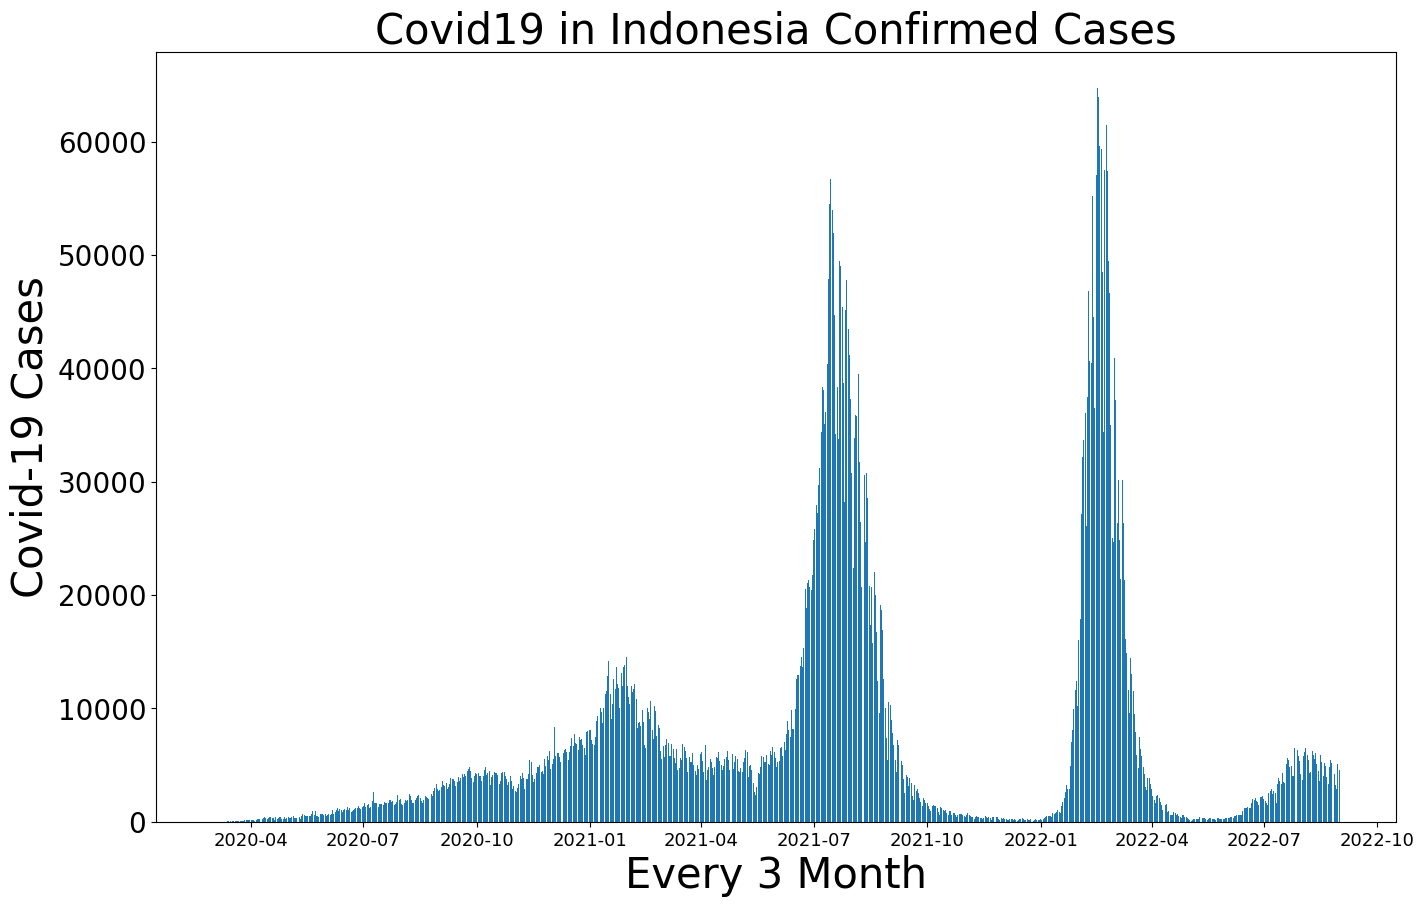

In [ ]:
# Daily New Cases in Indonesia
plt.figure(figsize=(16, 10))
plt.bar(data_mix_national_df["Date"], data_mix_national_df["New_Cases"])
plt.title('Covid19 in Indonesia Confirmed Cases', size=30)
plt.xlabel('Every 3 Month', size=30)
plt.ylabel('Covid-19 Cases', size=30)
plt.xticks(size=13)
plt.yticks(size=20)
plt.show()

From the graph above, we can observe that there are 3 waves of increases covid cases

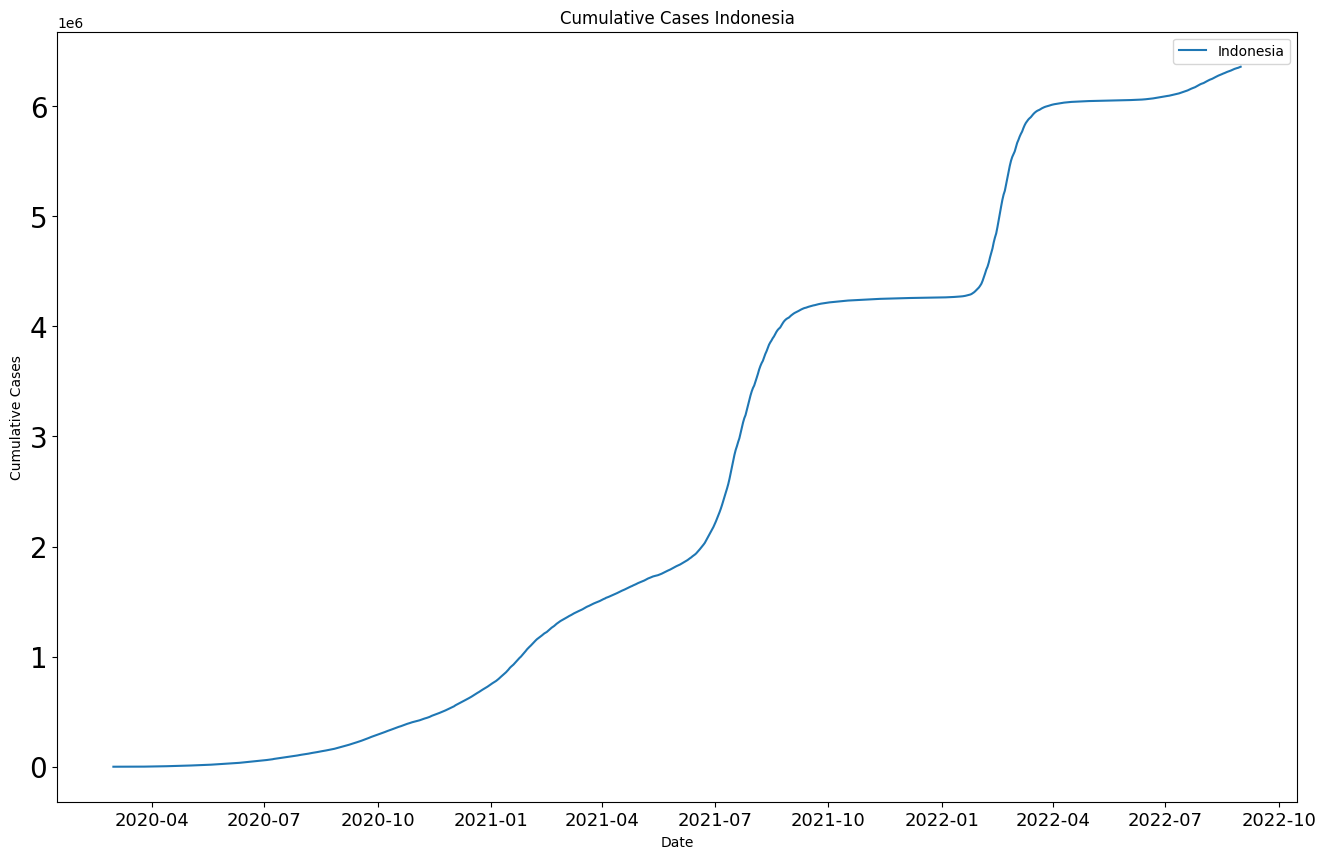

In [ ]:
# Cumulative Cases in Indonesia
plt.figure(figsize=(16, 10))
plt.plot(data_mix_national_df["Date"], data_mix_national_df["Cumulative_Cases"], label="Indonesia")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("Cumulative Cases Indonesia")
plt.legend()
plt.xticks(size=13)
plt.yticks(size=20)

plt.show()

We can observe that in July 2021 and few months after, the cumulative covid cases is extremely increased. Same with January 2022 and after.

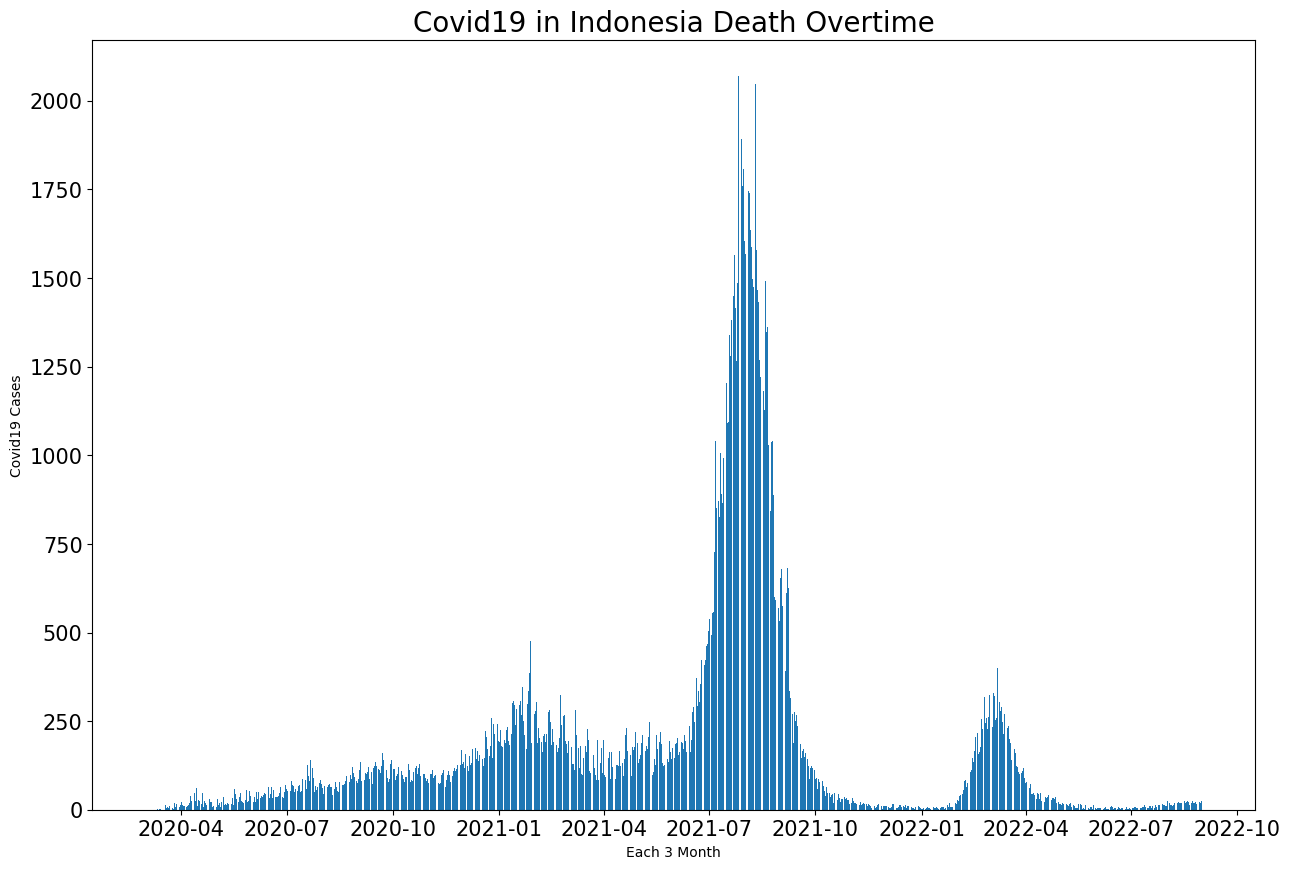

In [ ]:
# Daily deceased in Indonesia
plt.figure(figsize=(15, 10))
plt.bar(data_mix_national_df["Date"], data_mix_national_df["New_Deceased"])
plt.title('Covid19 in Indonesia Death Overtime', size=20)
plt.xlabel('Each 3 Month', size=10)
plt.ylabel('Covid19 Cases', size=10)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

We can observe that in range Januari 2022 until April 2022, the daily covid cases is extremely increased, but the number of daily deceased is not.

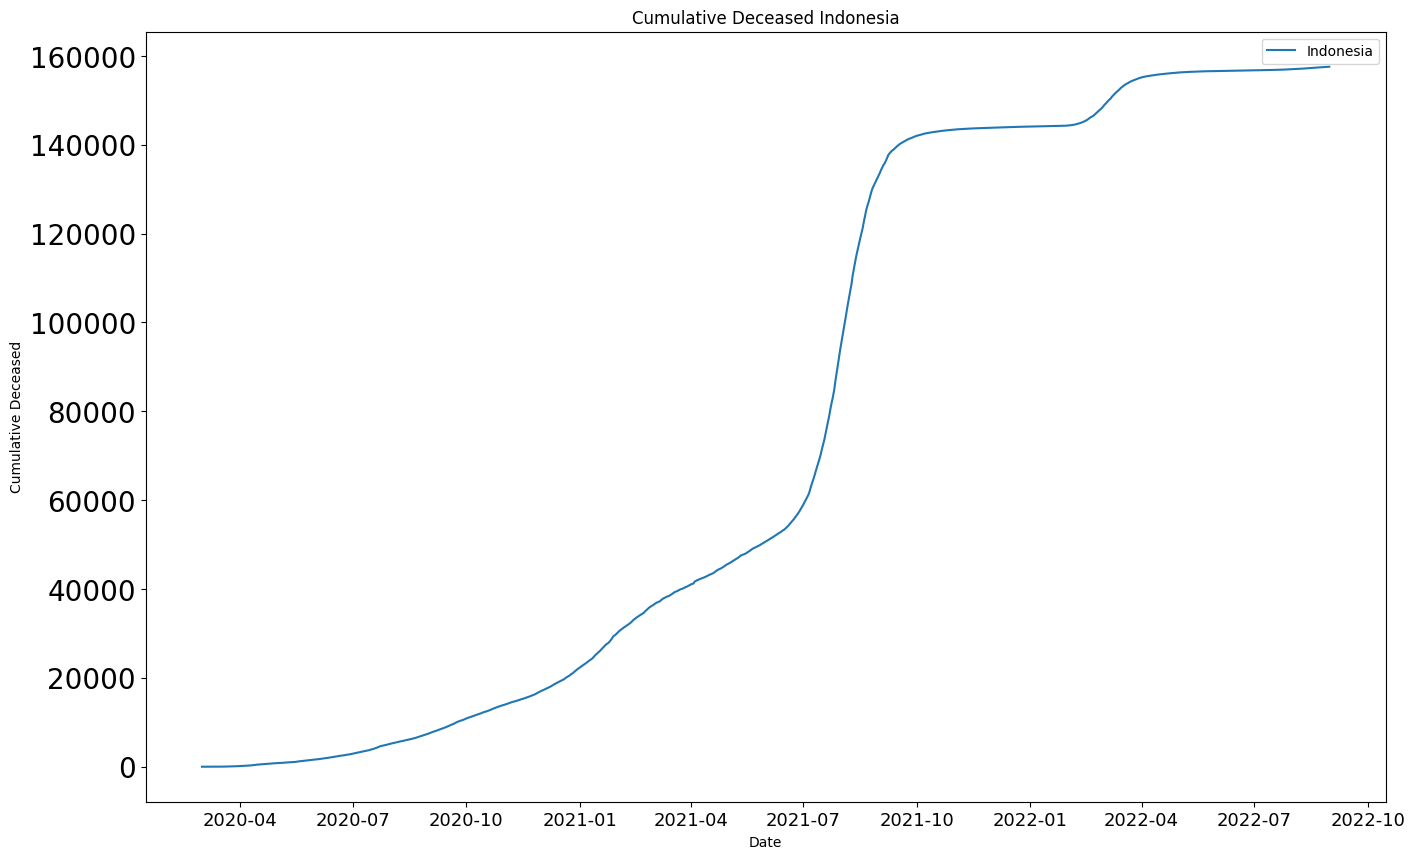

In [ ]:
# Cumulative deceased in Indonesia
plt.figure(figsize=(16, 10))
plt.plot(data_mix_national_df["Date"], data_mix_national_df["Cumulative_Deceased"], label="Indonesia")
plt.xlabel("Date")
plt.ylabel("Cumulative Deceased")
plt.title("Cumulative Deceased Indonesia")
plt.legend()
plt.xticks(size=13)
plt.yticks(size=20)

plt.show()

We can observe there are three waves of COVID-19 cases, with the third wave in Indonesia showing better preparedness, resulting in a lower death toll compared to the previous two waves.

**Mobility**

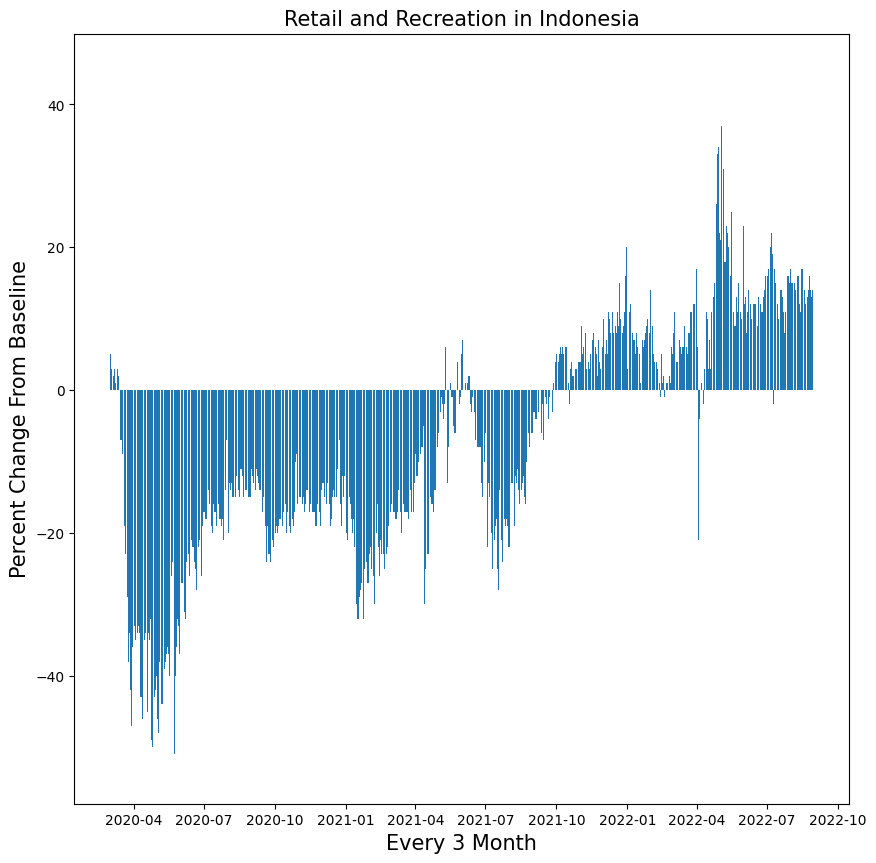

In [ ]:
# Daily percent change of Retail and Recreation sector
plt.figure(figsize=(10, 10))
plt.bar(data_mix_national_df["Date"], data_mix_national_df["Retail_Recreation"])
plt.title('Retail and Recreation in Indonesia', size=15)
plt.xlabel('Every 3 Month', size=15)
plt.ylabel('Percent Change From Baseline', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

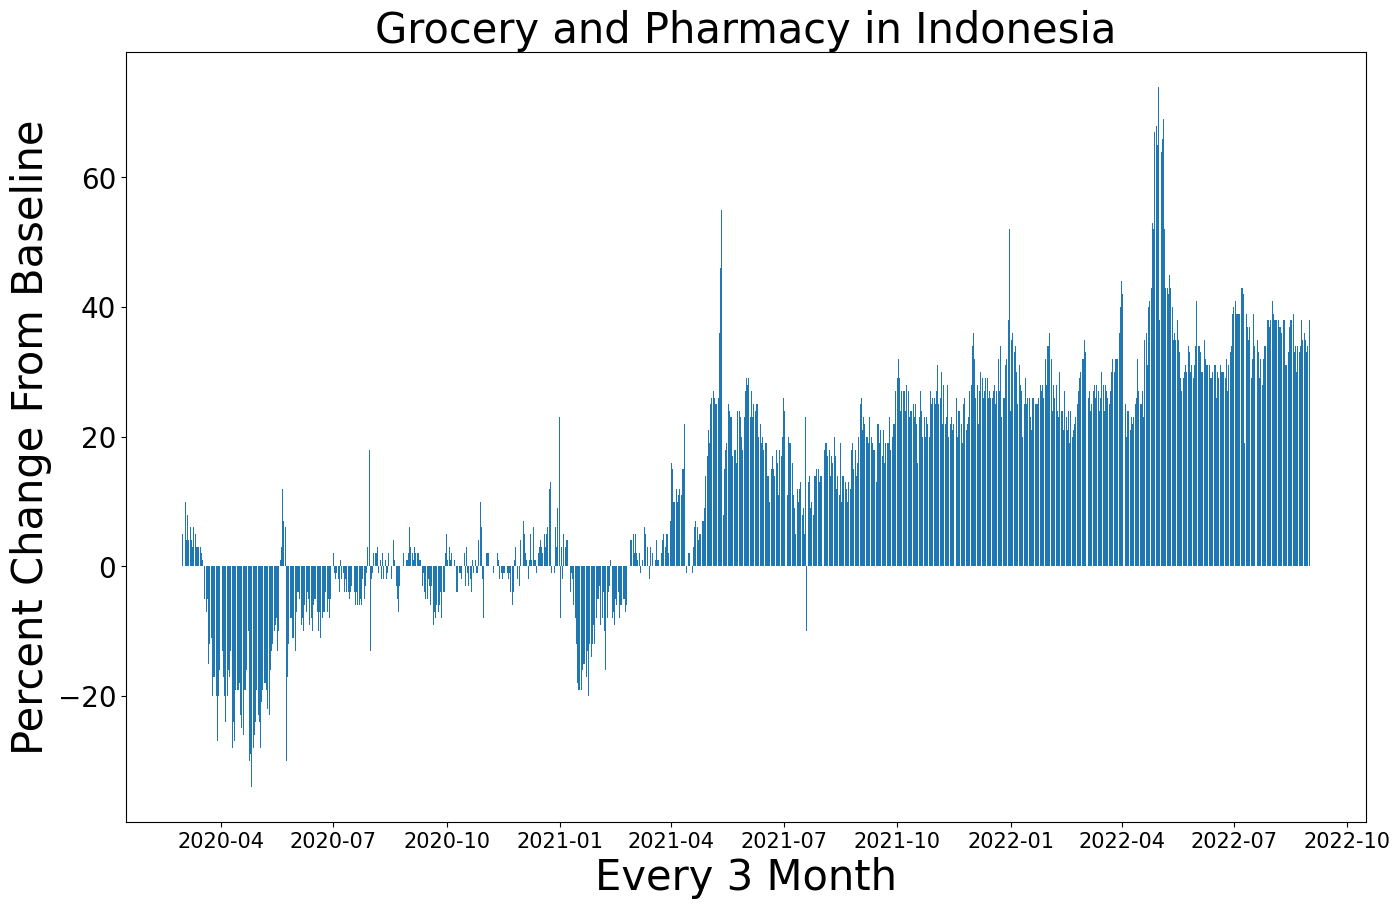

In [ ]:
# Daily percent change of Grocery and Pharmacy sector
plt.figure(figsize=(16, 10))
plt.bar(data_mix_national_df["Date"], data_mix_national_df["Grocery_Pharmacy"])
plt.title('Grocery and Pharmacy in Indonesia', size=30)
plt.xlabel('Every 3 Month', size=30)
plt.ylabel('Percent Change From Baseline', size=30)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

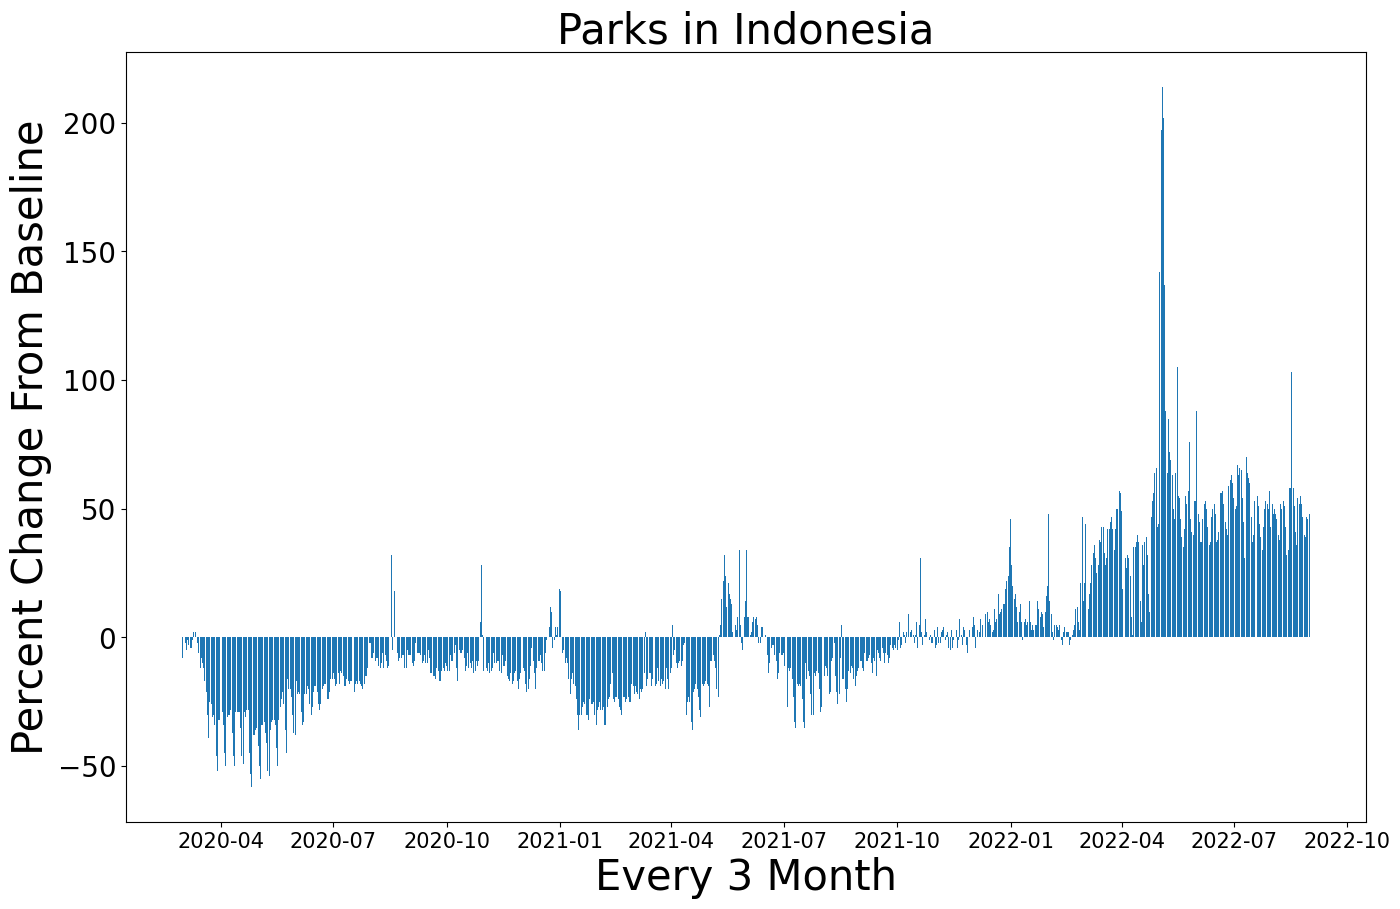

In [ ]:
# Daily percent change of Parks sector
plt.figure(figsize=(16, 10))
plt.bar(data_mix_national_df["Date"], data_mix_national_df["Parks"])
plt.title('Parks in Indonesia', size=30)
plt.xlabel('Every 3 Month', size=30)
plt.ylabel('Percent Change From Baseline', size=30)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

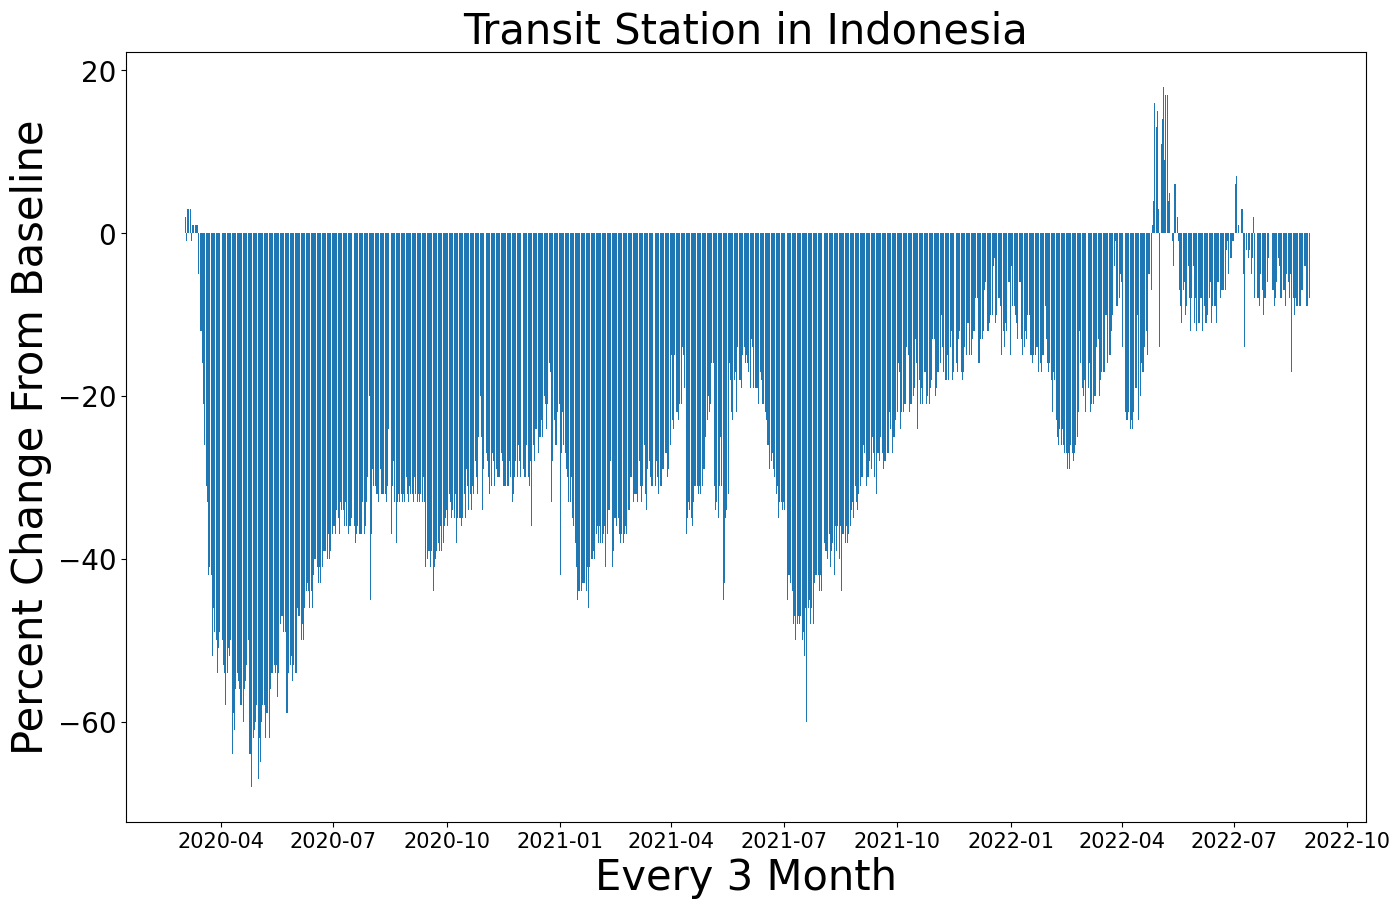

In [ ]:
# Daily percent change of Transit Stations sector
plt.figure(figsize=(16, 10))
plt.bar(data_mix_national_df["Date"], data_mix_national_df["Transit_Stations"])
plt.title('Transit Station in Indonesia', size=30)
plt.xlabel('Every 3 Month', size=30)
plt.ylabel('Percent Change From Baseline', size=30)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

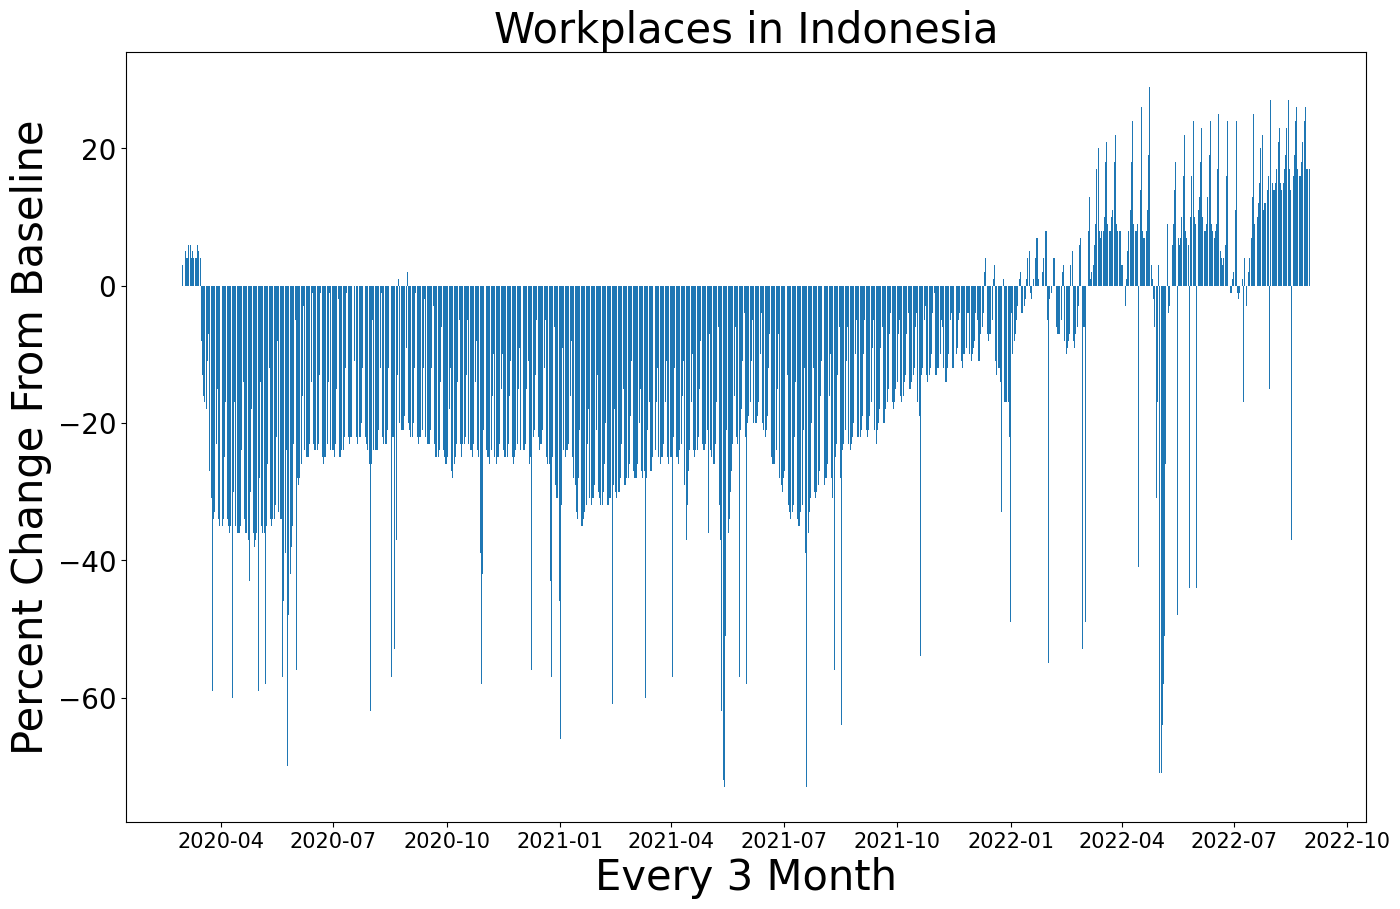

In [ ]:
# Daily percent change of Workplaces sector
plt.figure(figsize=(16, 10))
plt.bar(data_mix_national_df["Date"], data_mix_national_df["Workplaces"])
plt.title('Workplaces in Indonesia', size=30)
plt.xlabel('Every 3 Month', size=30)
plt.ylabel('Percent Change From Baseline', size=30)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

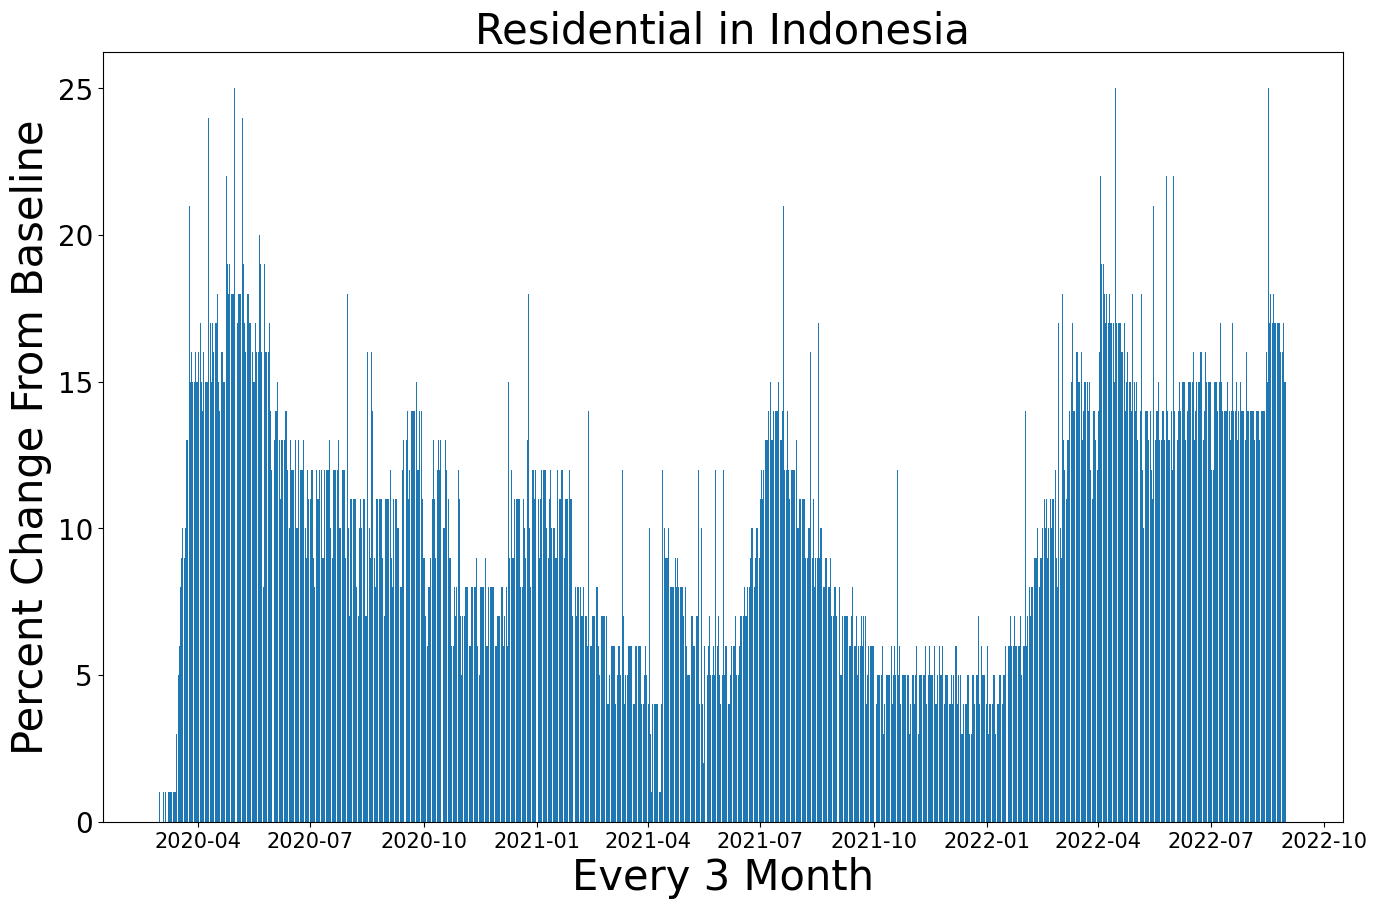

In [ ]:
# Daily percent change of Residential sector
plt.figure(figsize=(16, 10))
plt.bar(data_mix_national_df["Date"], data_mix_national_df["Residential"])
plt.title('Residential in Indonesia', size=30)
plt.xlabel('Every 3 Month', size=30)
plt.ylabel('Percent Change From Baseline', size=30)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

### Each Province Review

**Each Province Data**

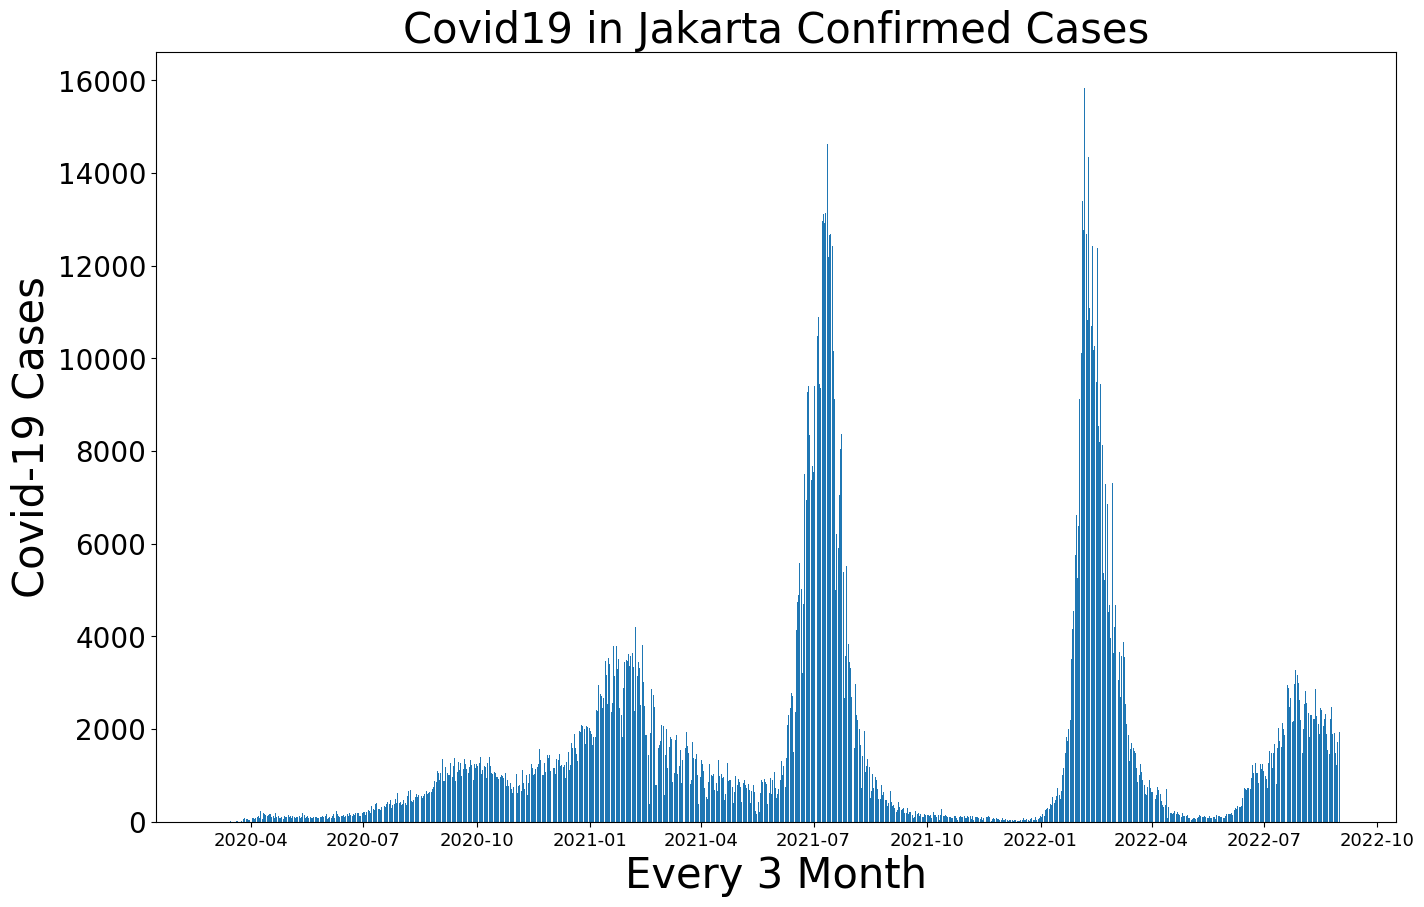

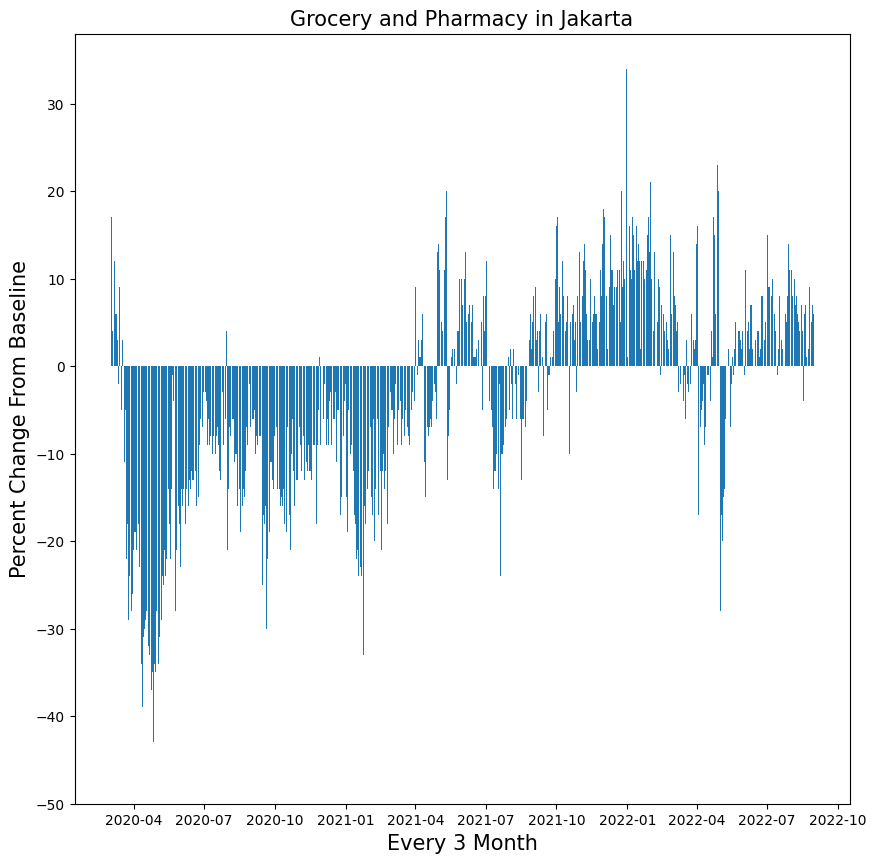

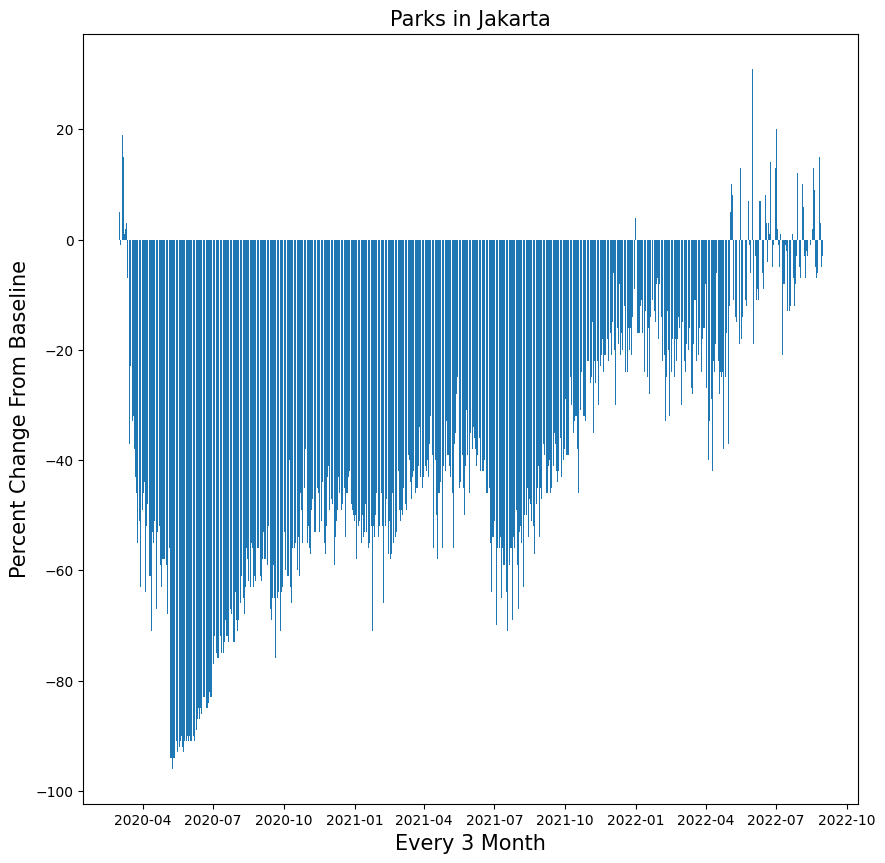

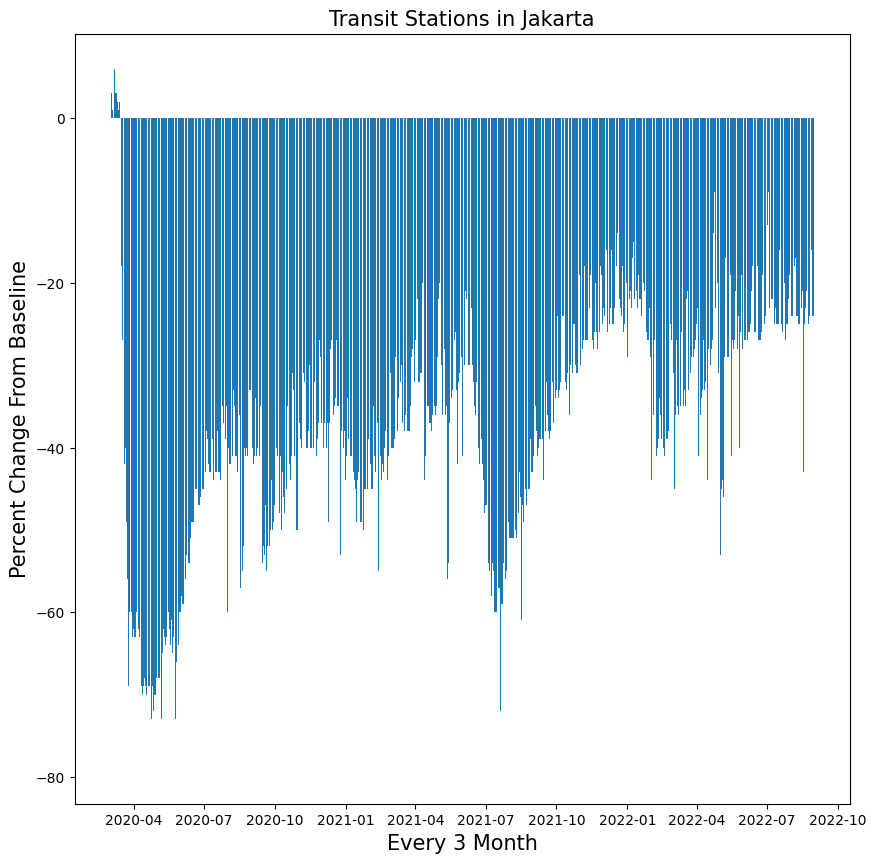

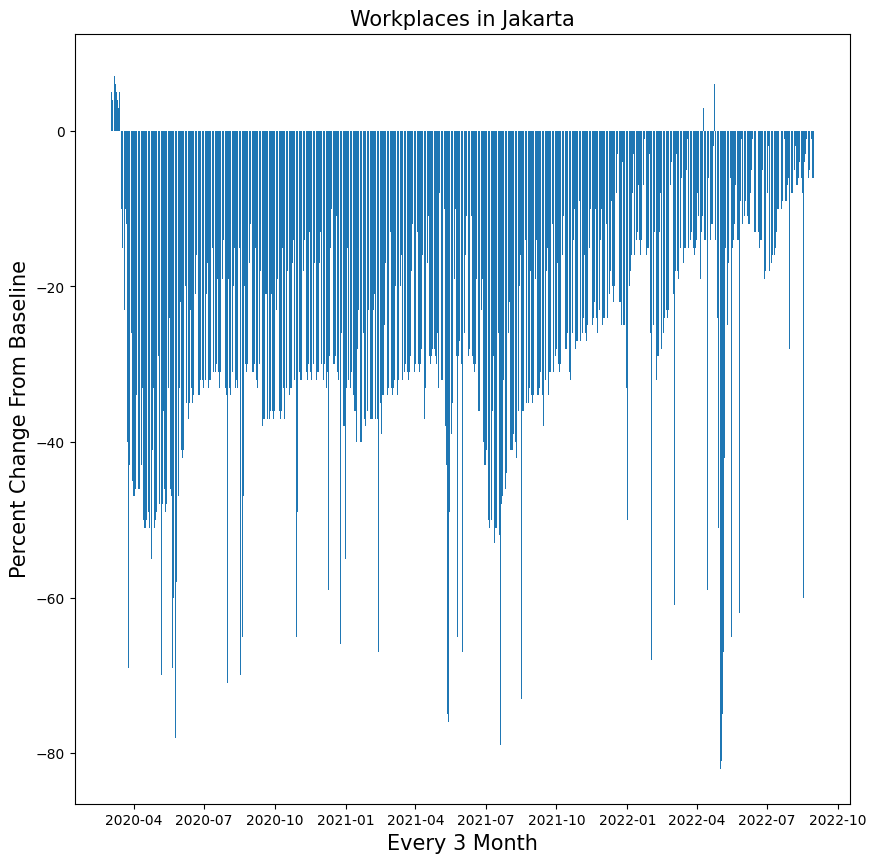

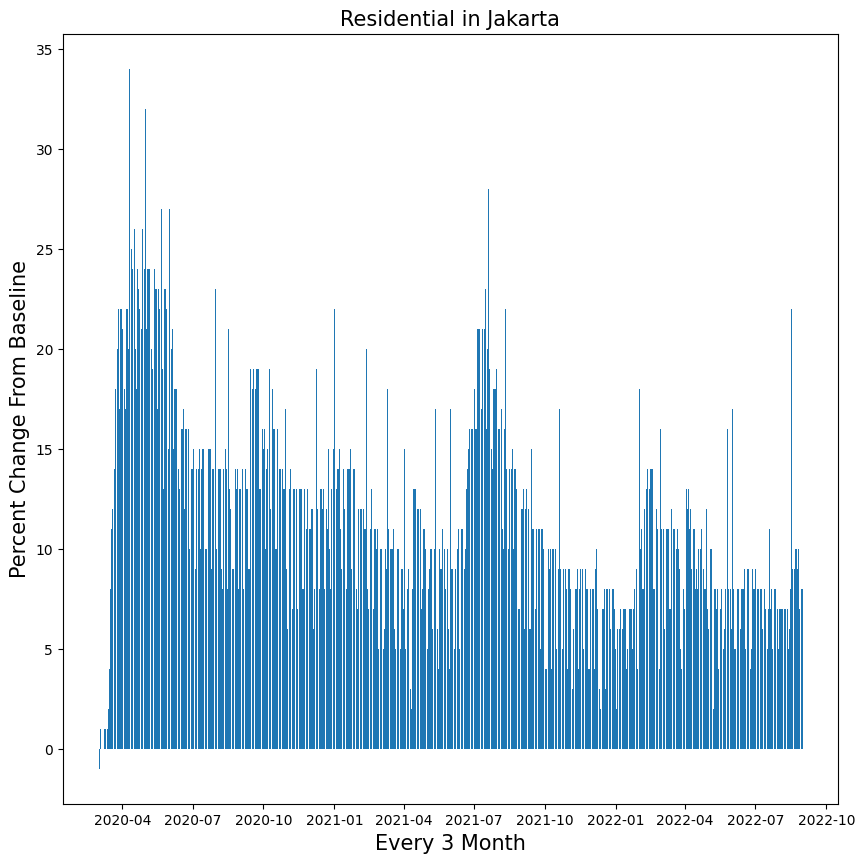

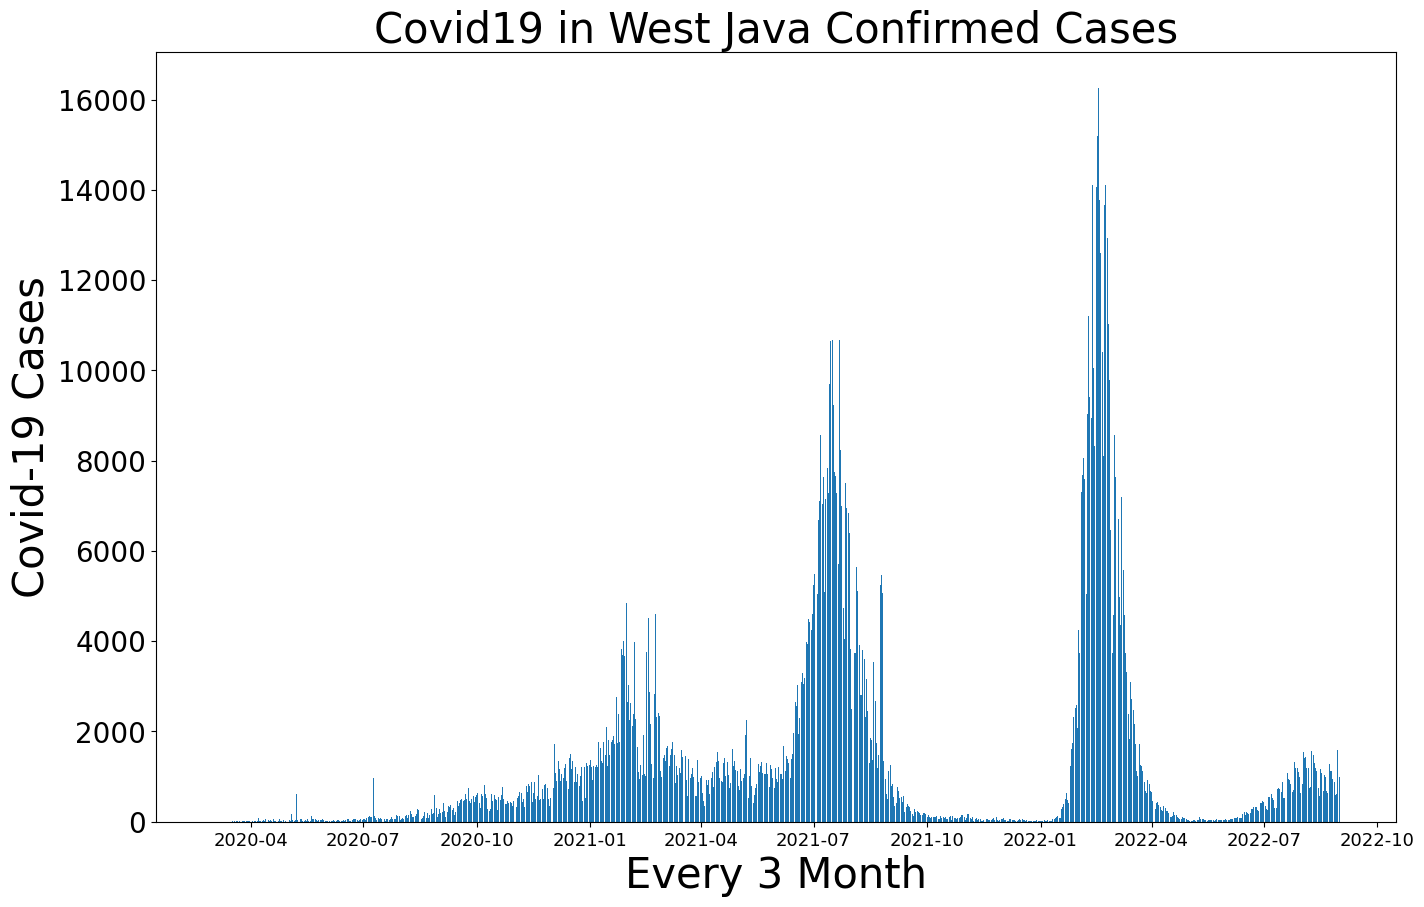

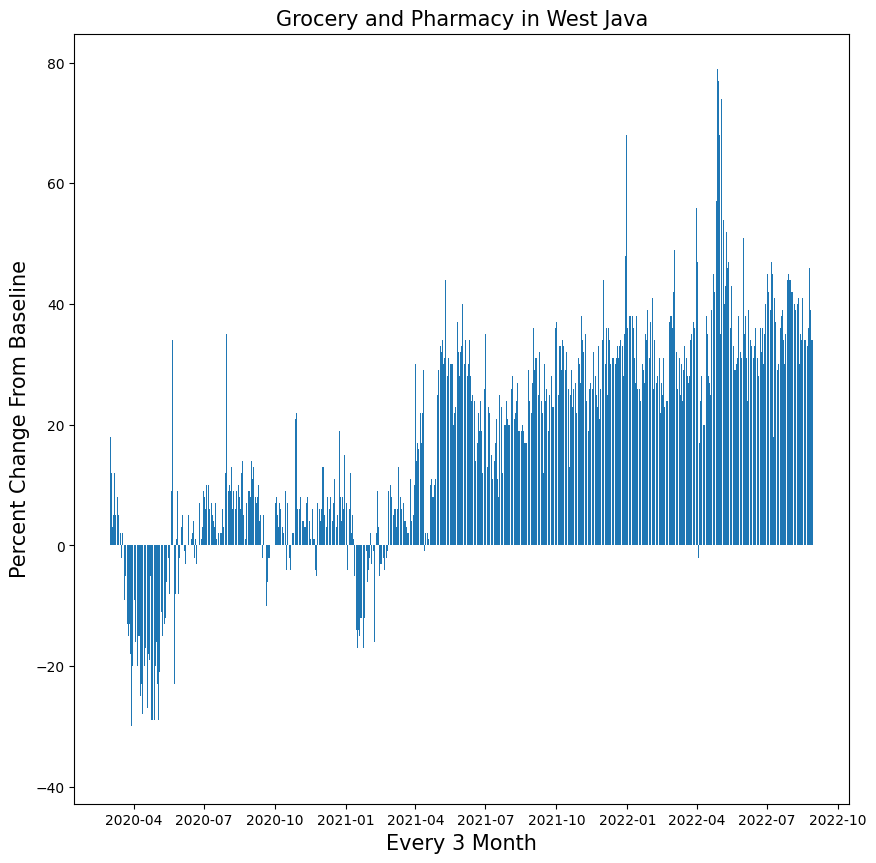

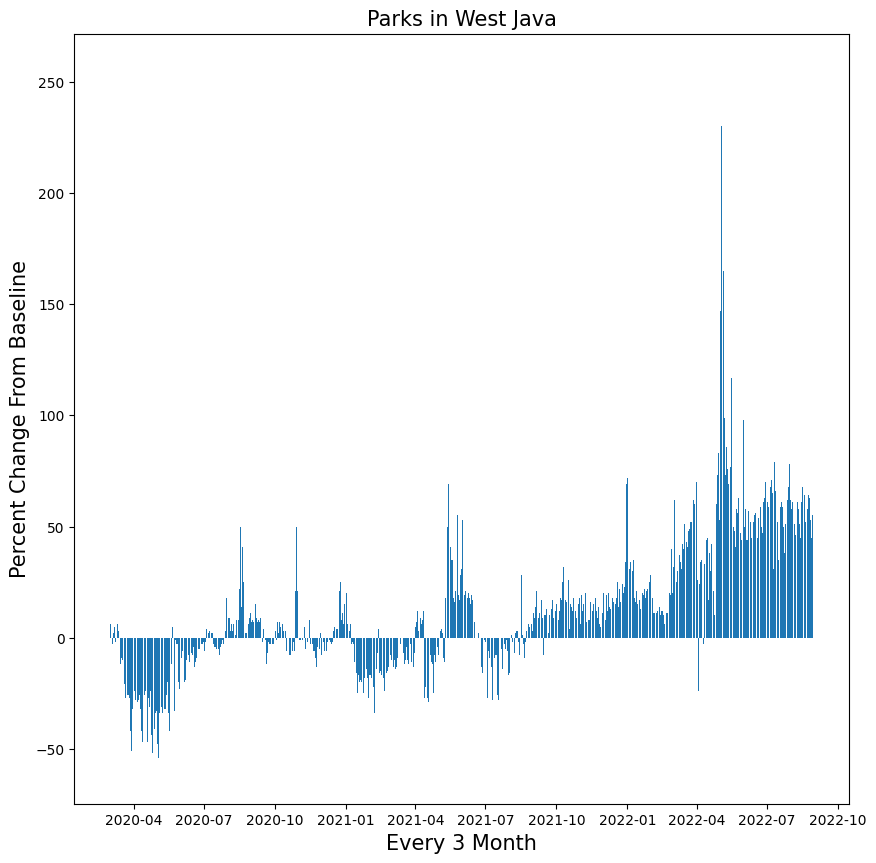

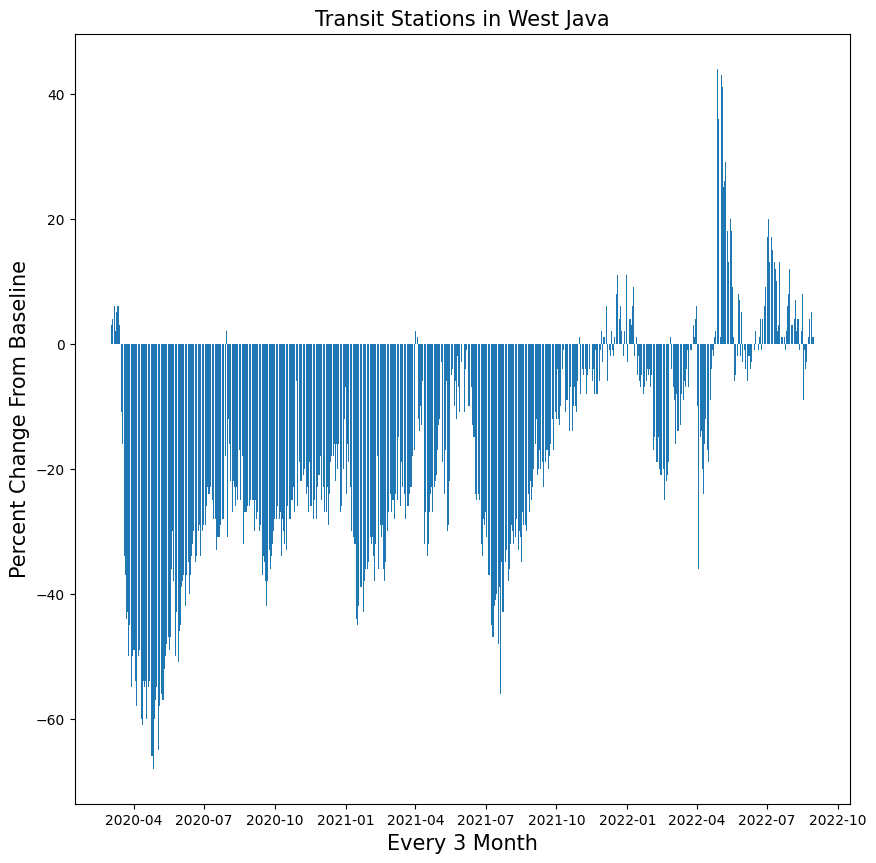

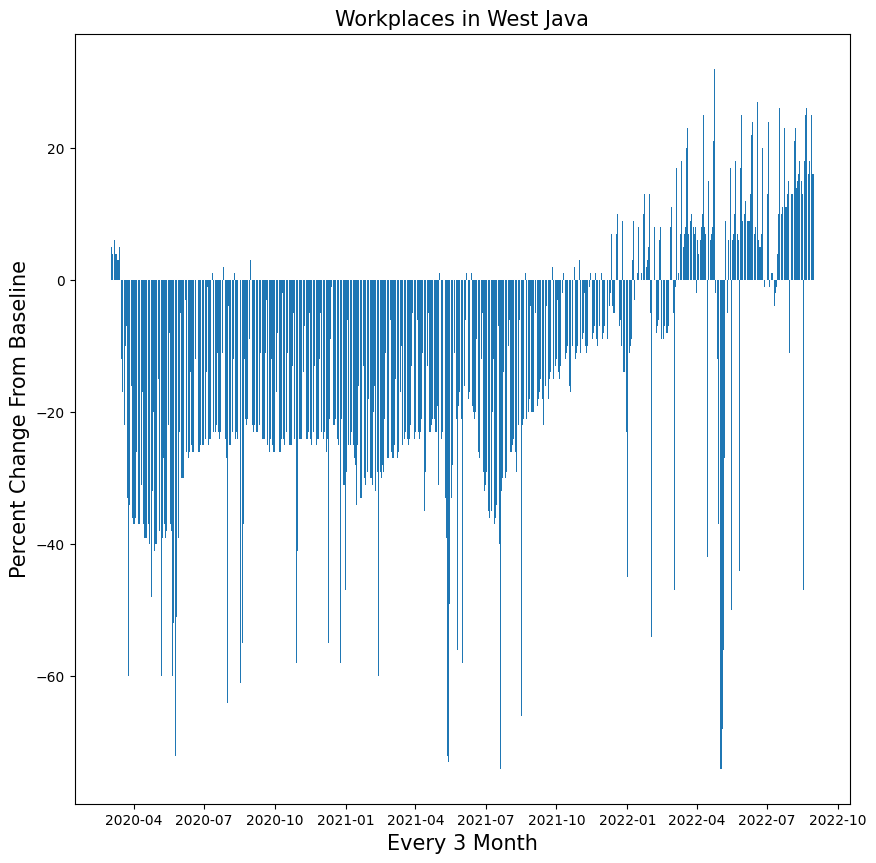

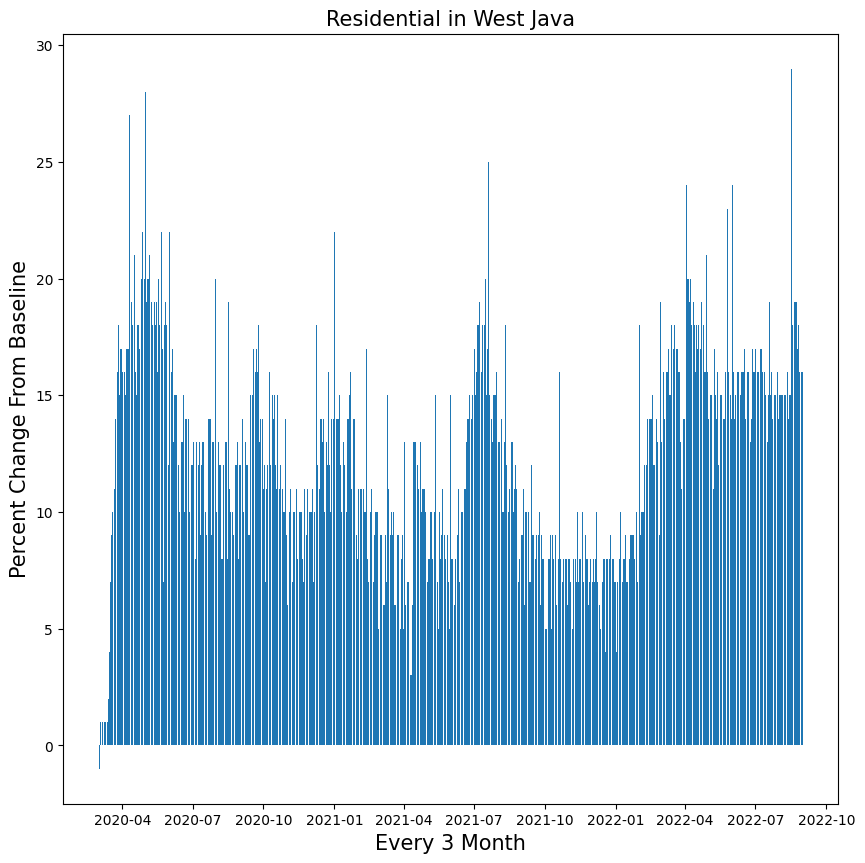

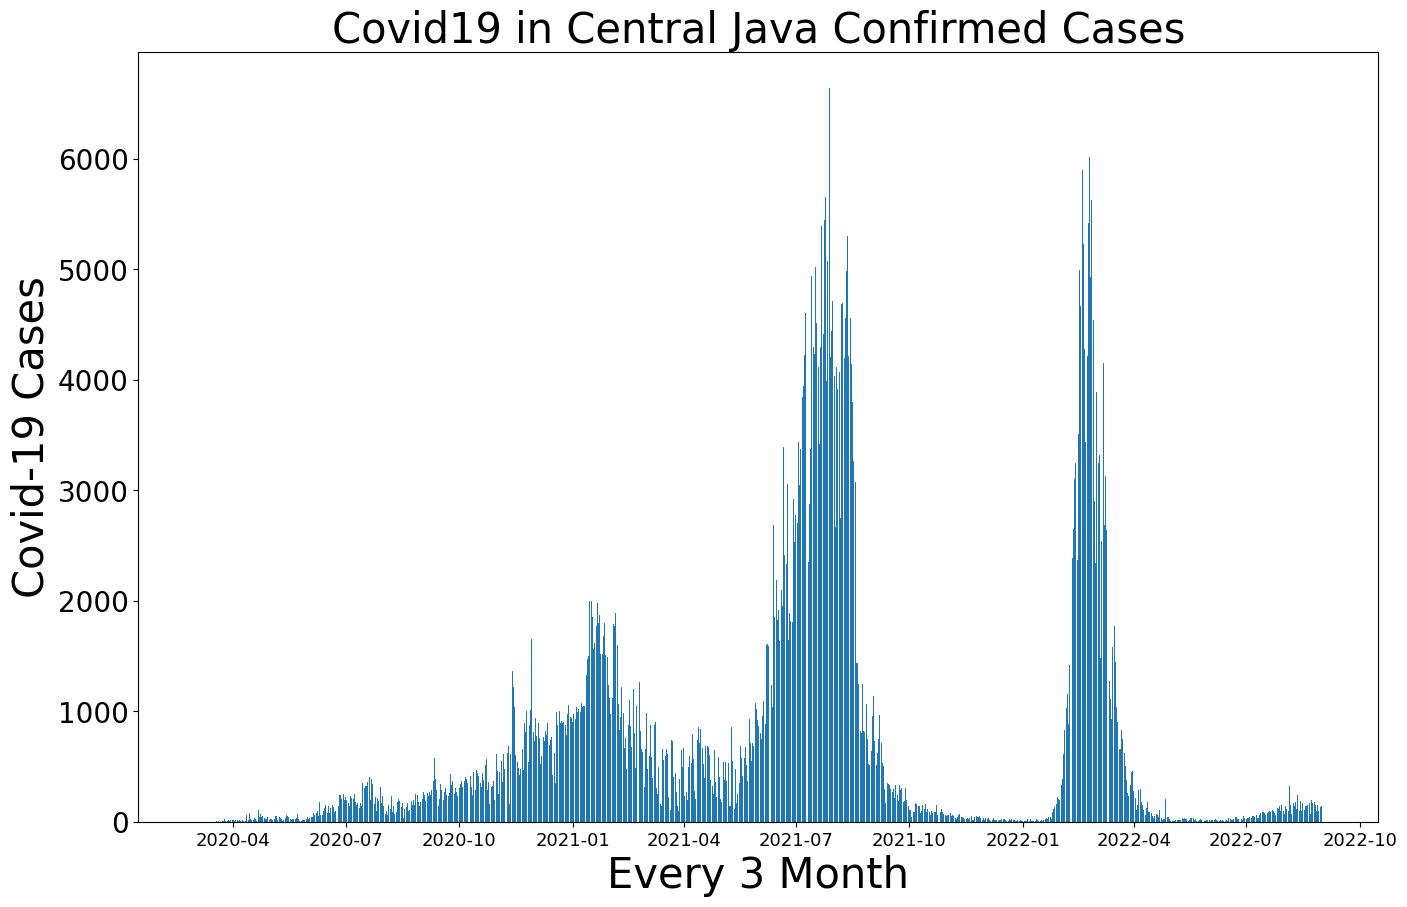

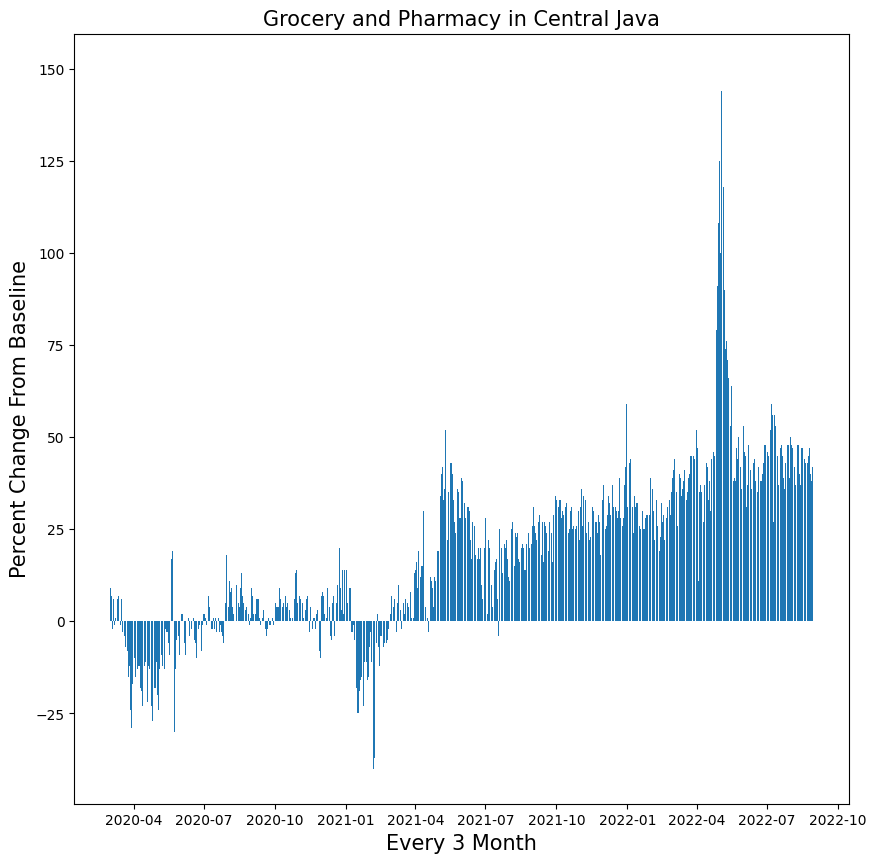

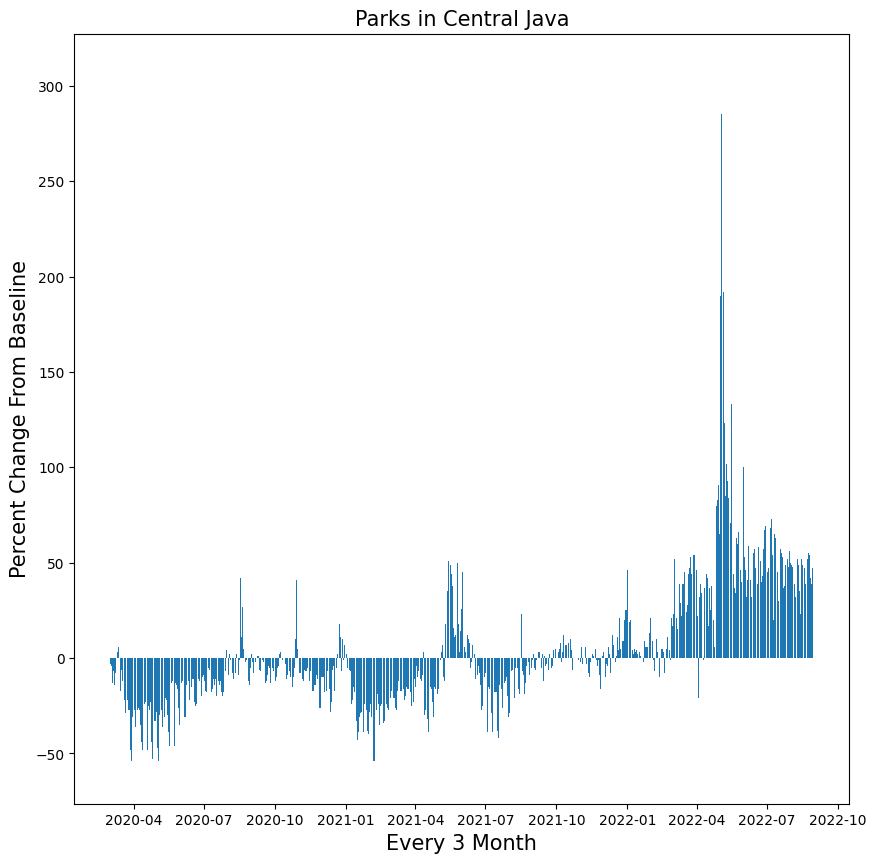

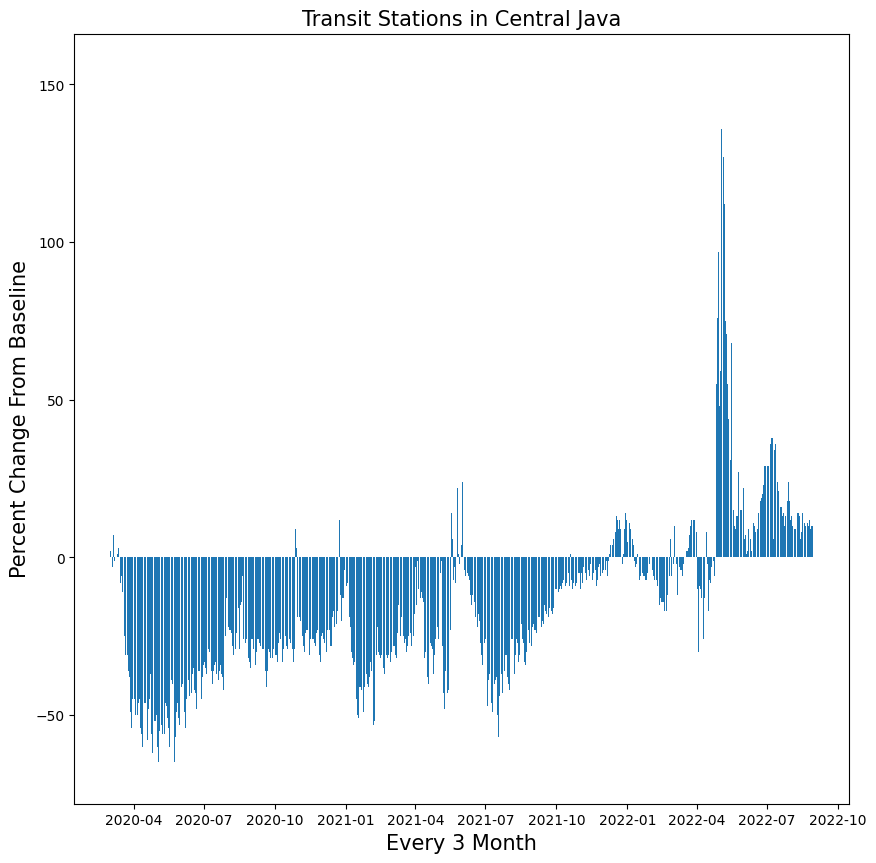

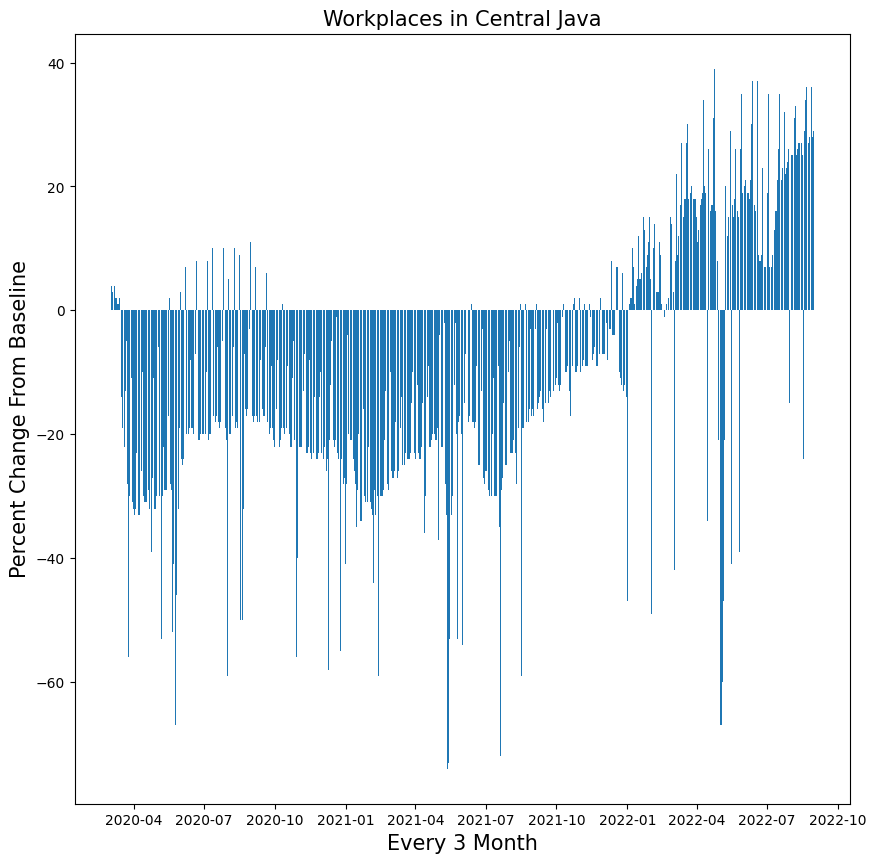

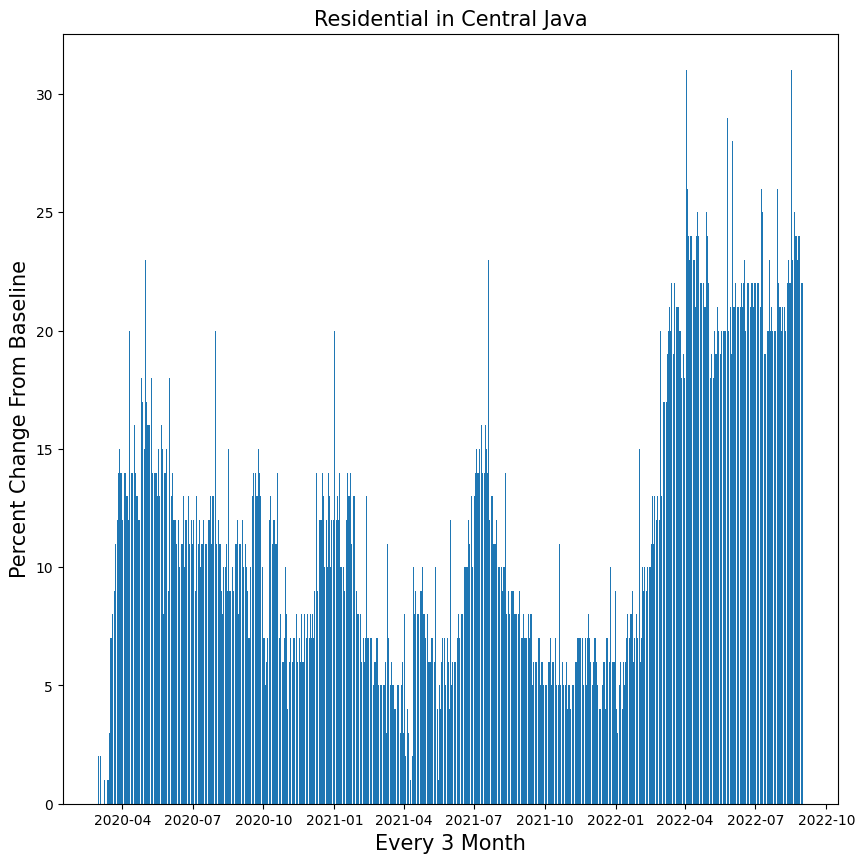

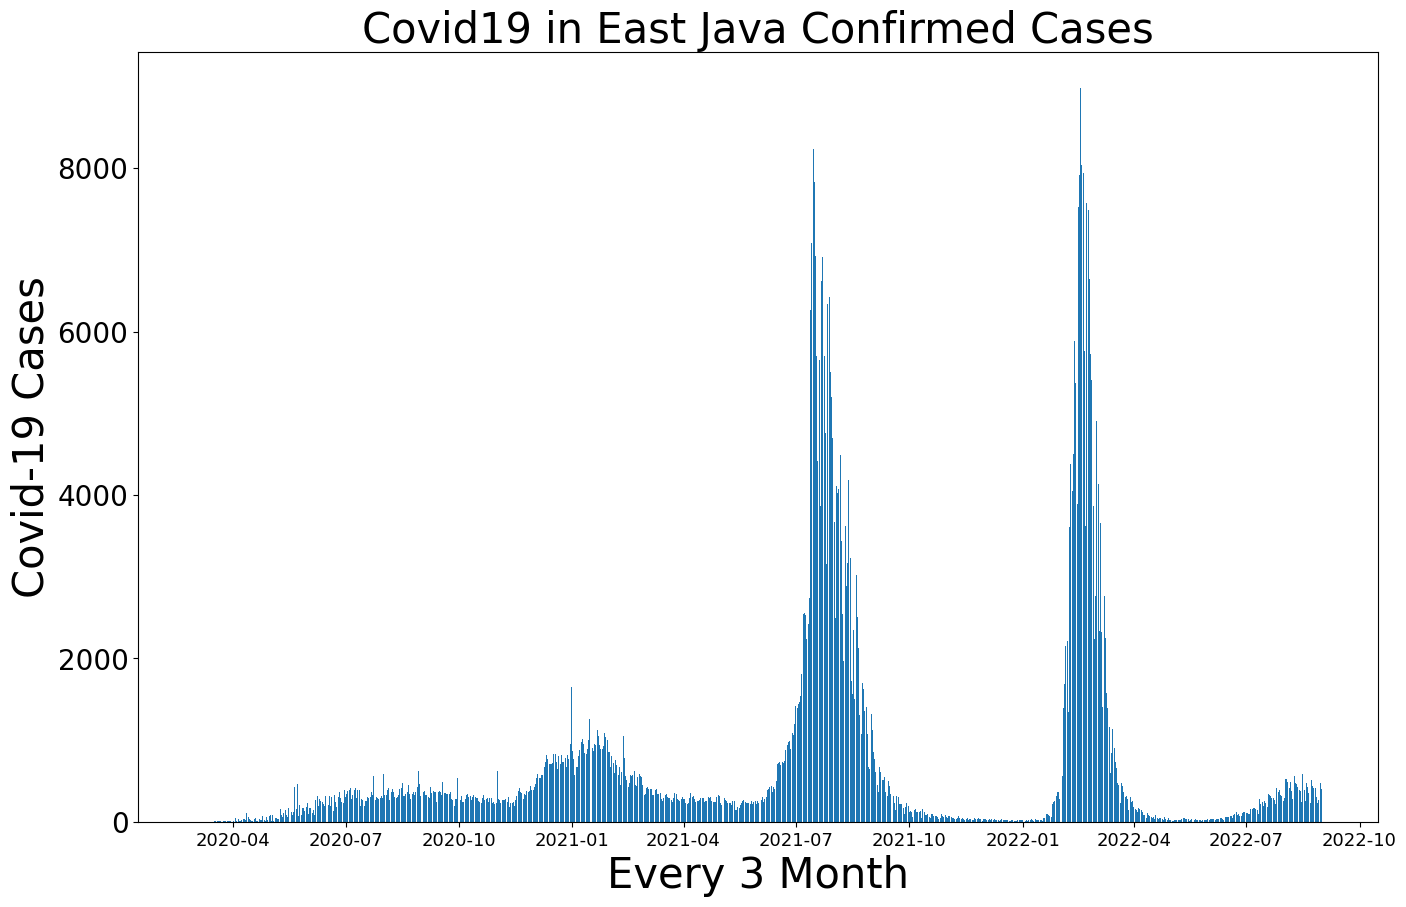

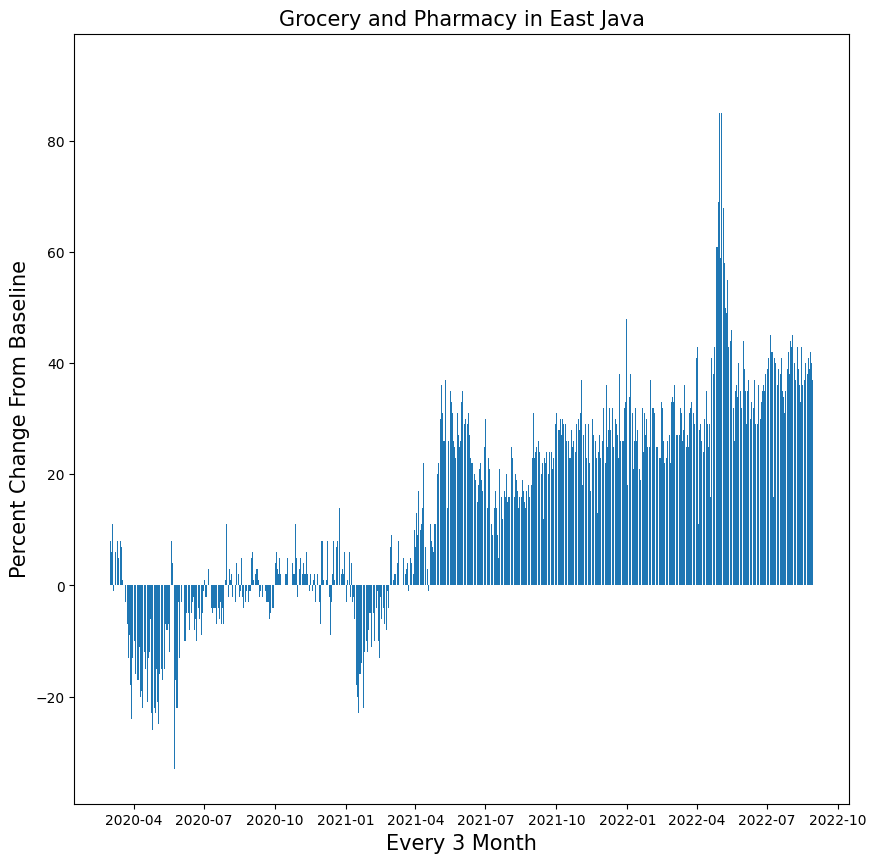

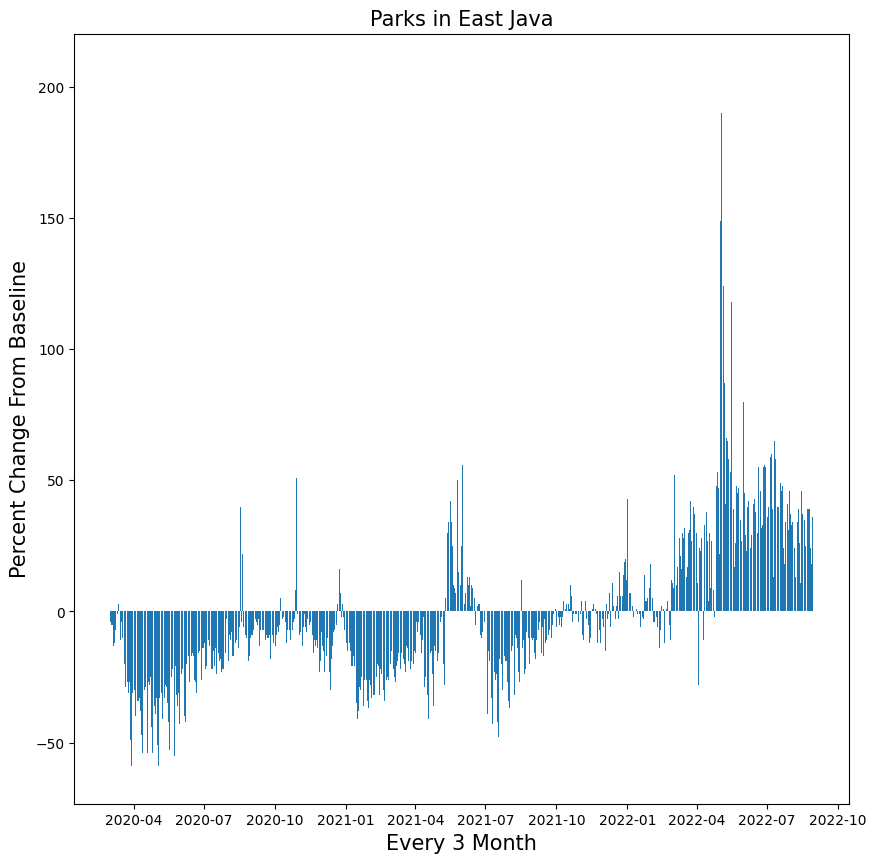

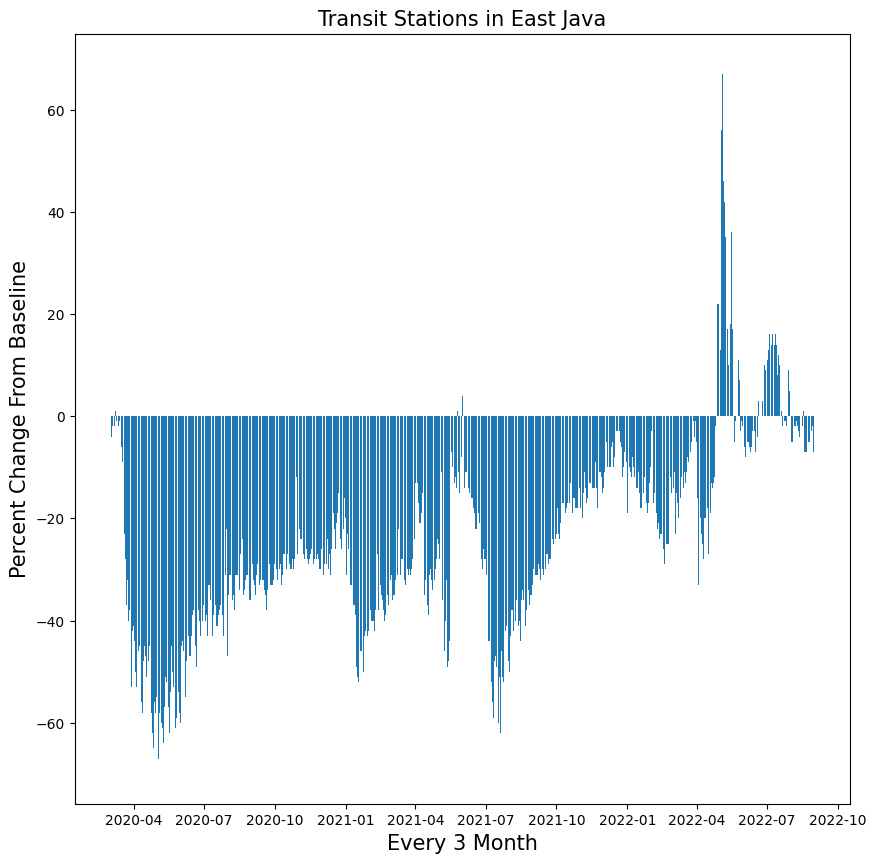

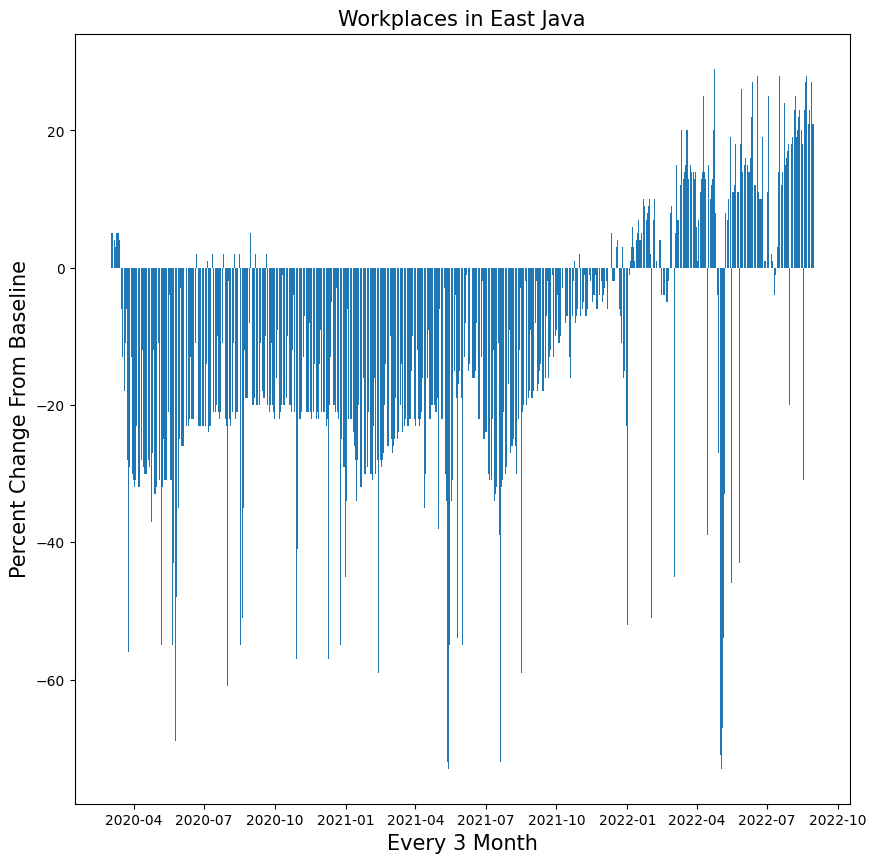

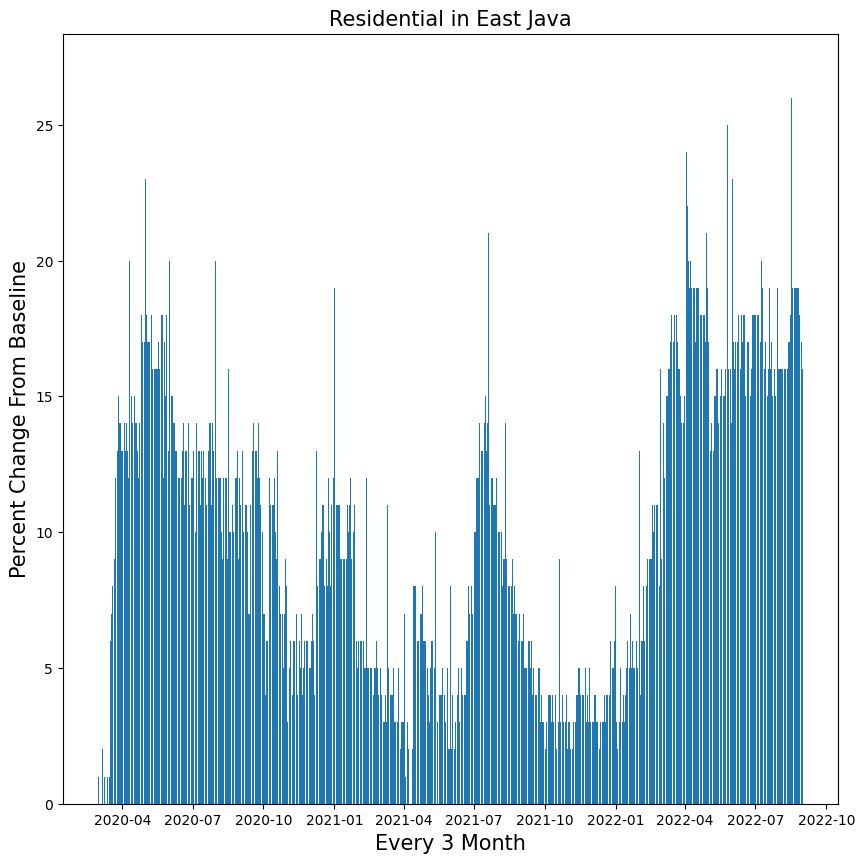

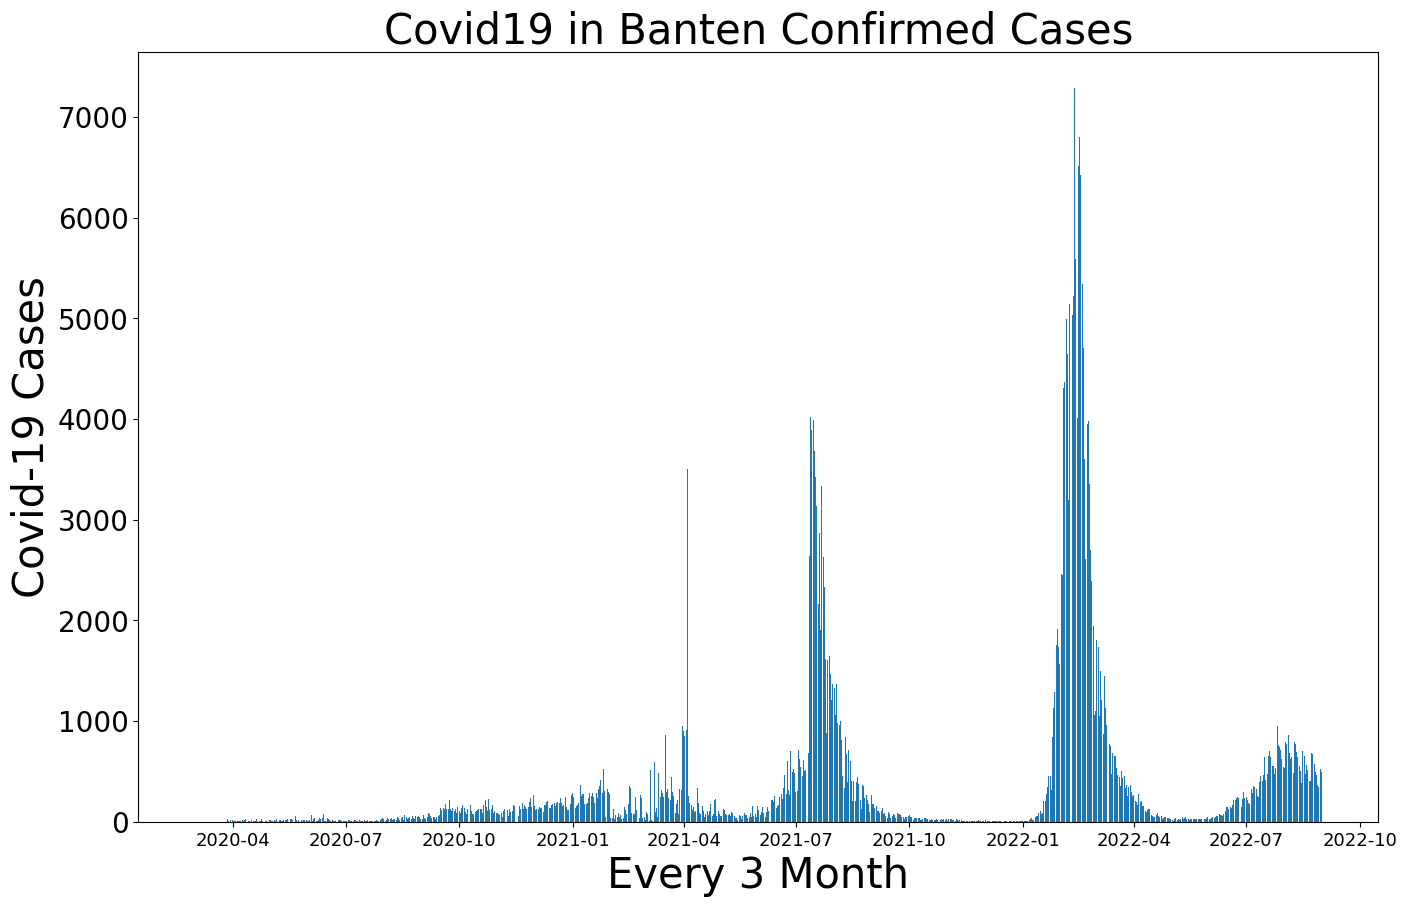

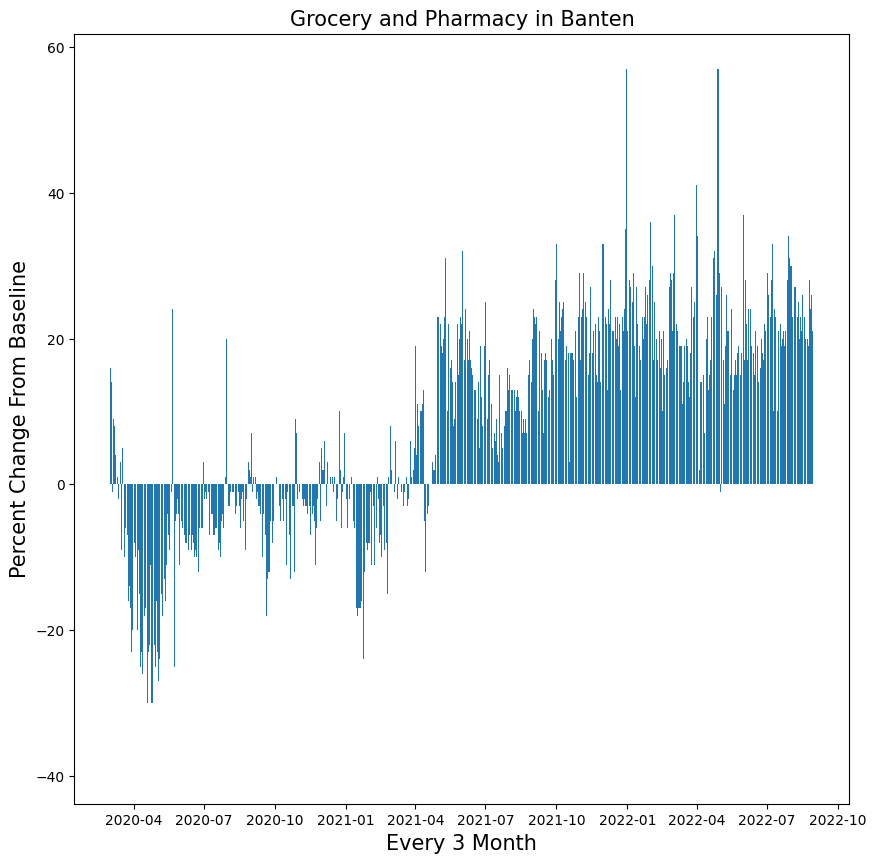

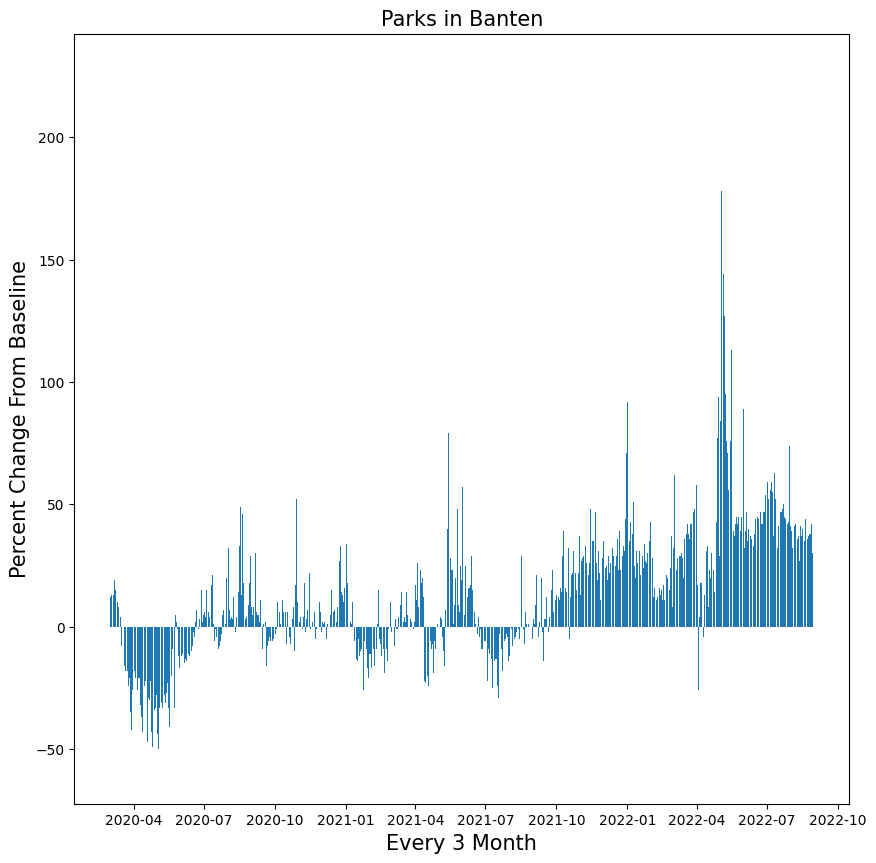

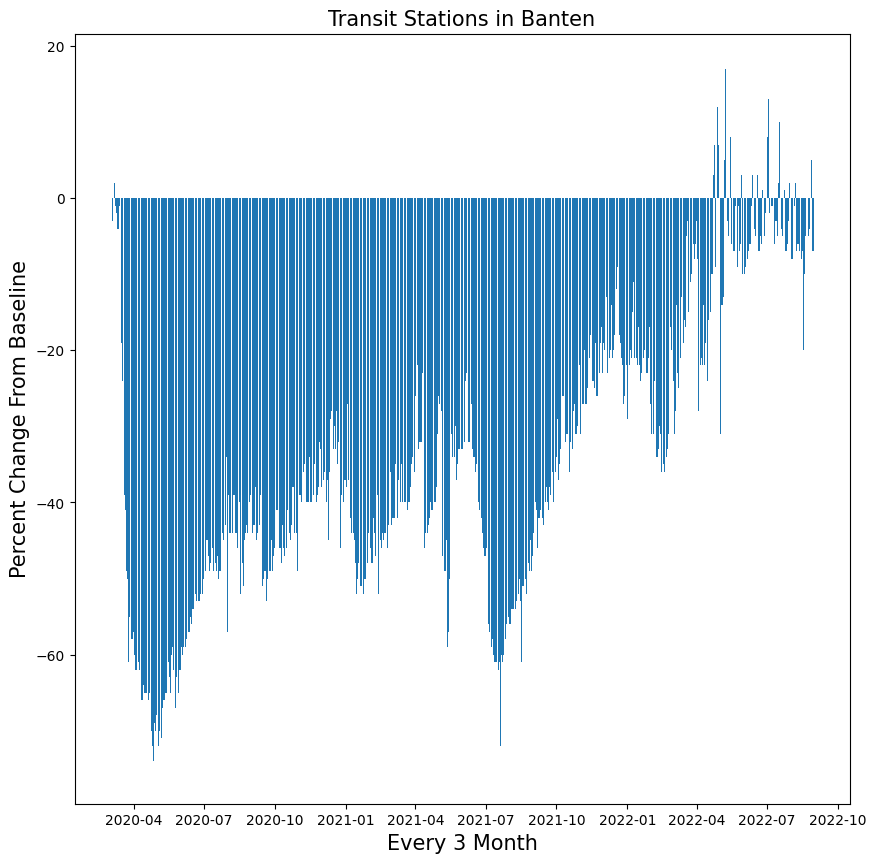

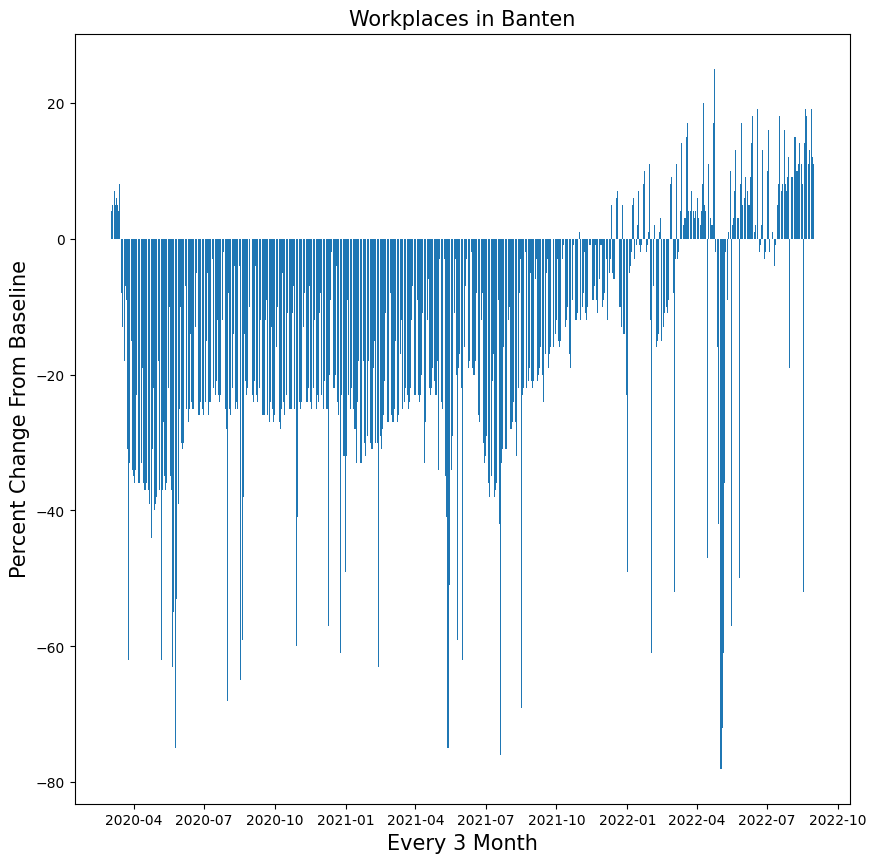

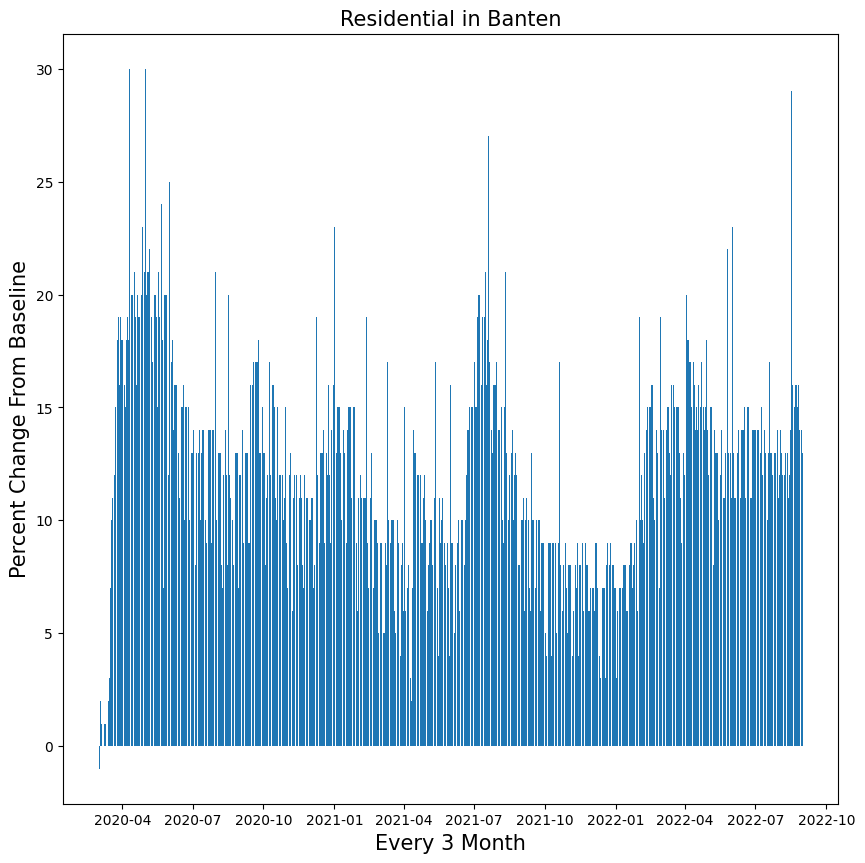

In [ ]:
top5 = data_mix_df.loc[(data_mix_df["Year"] == 2022) & (data_mix_df["Month"] == 8) & (data_mix_df["Day"] == 31)].sort_values("Cumulative_Cases", ascending=False).head()
for province in top5["Province"]:
  dataprovinsi = data_mix_df.loc[data_mix_df["Province"] == province]

  #covid case
  plt.figure(figsize=(16, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["New_Cases"])
  plt.title(f'Covid19 in {province} Confirmed Cases', size=30)
  plt.xlabel('Every 3 Month', size=30)
  plt.ylabel('Covid-19 Cases', size=30)
  plt.xticks(size=13)
  plt.yticks(size=20)
  plt.show()

  #covid death

  #mobility
  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Grocery_Pharmacy"])
  plt.title(f'Grocery and Pharmacy in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Parks"])
  plt.title(f'Parks in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Transit_Stations"])
  plt.title(f'Transit Stations in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Workplaces"])
  plt.title(f'Workplaces in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Residential"])
  plt.title(f'Residential in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()



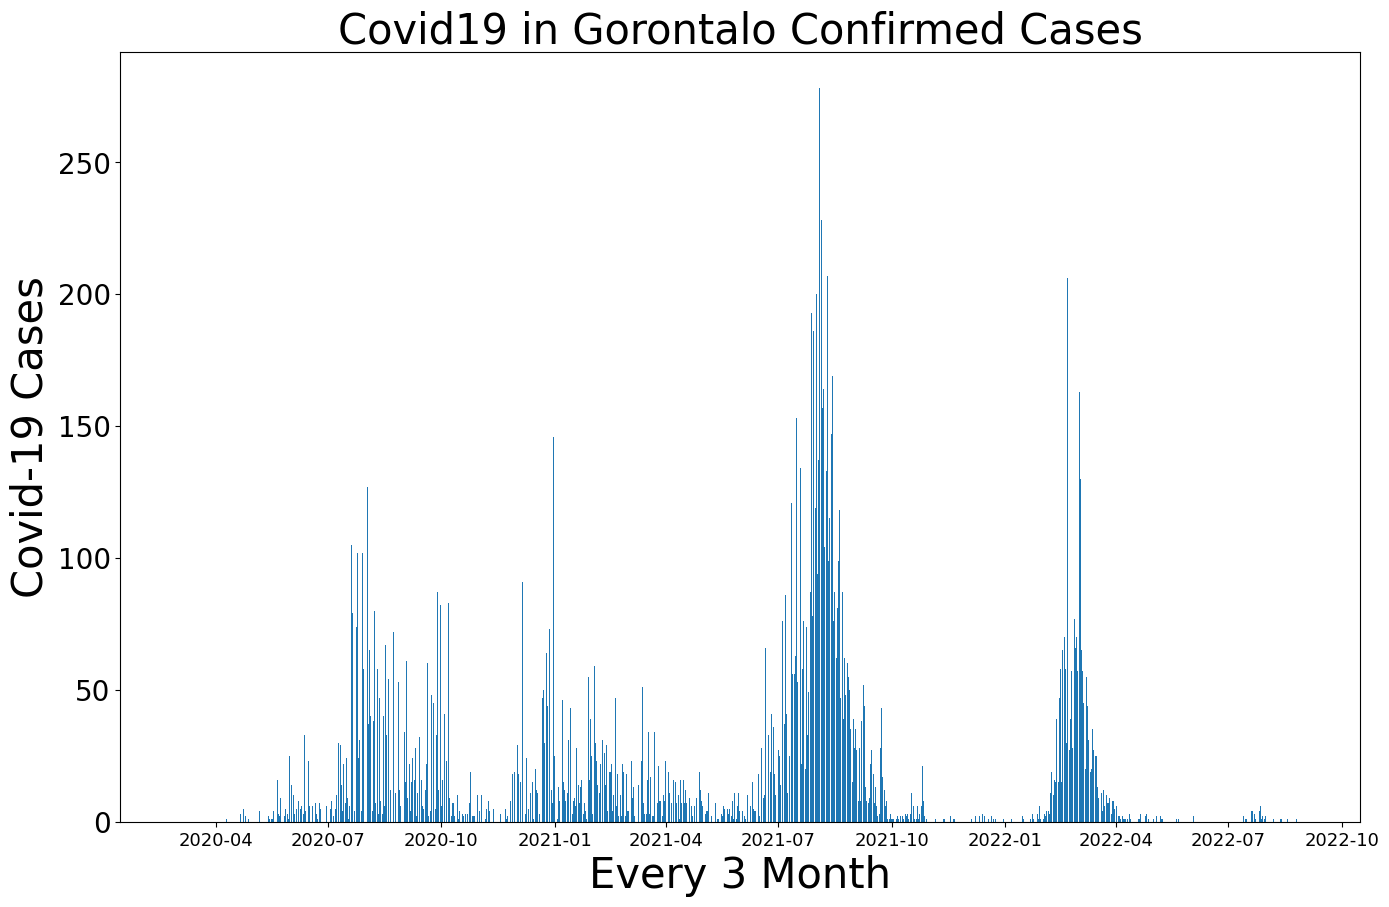

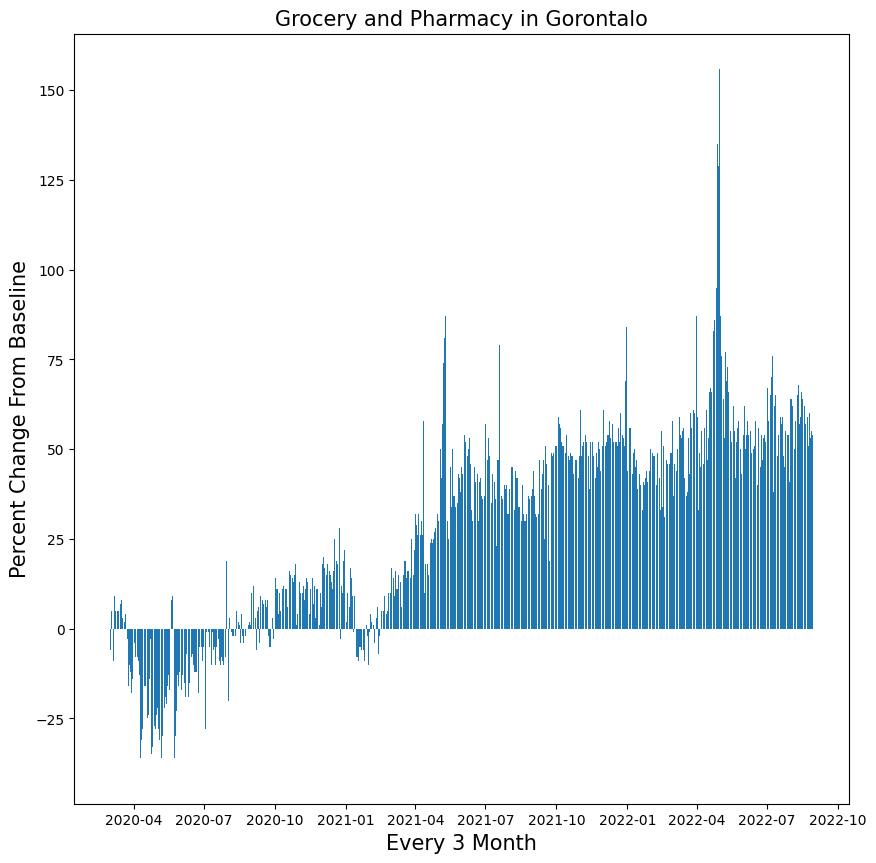

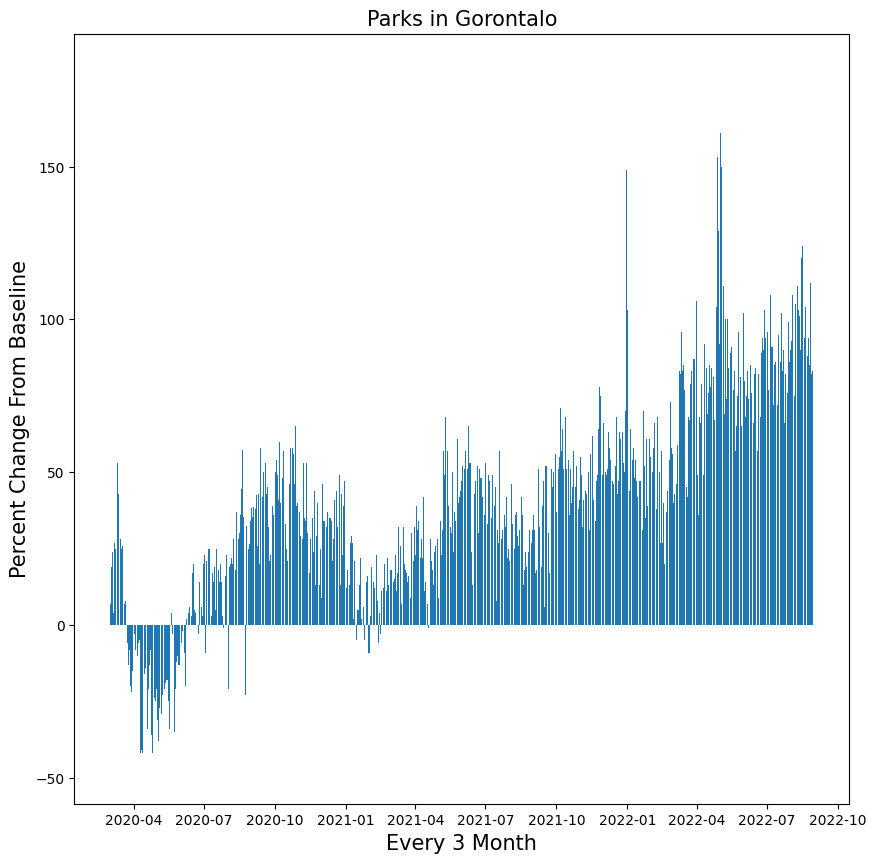

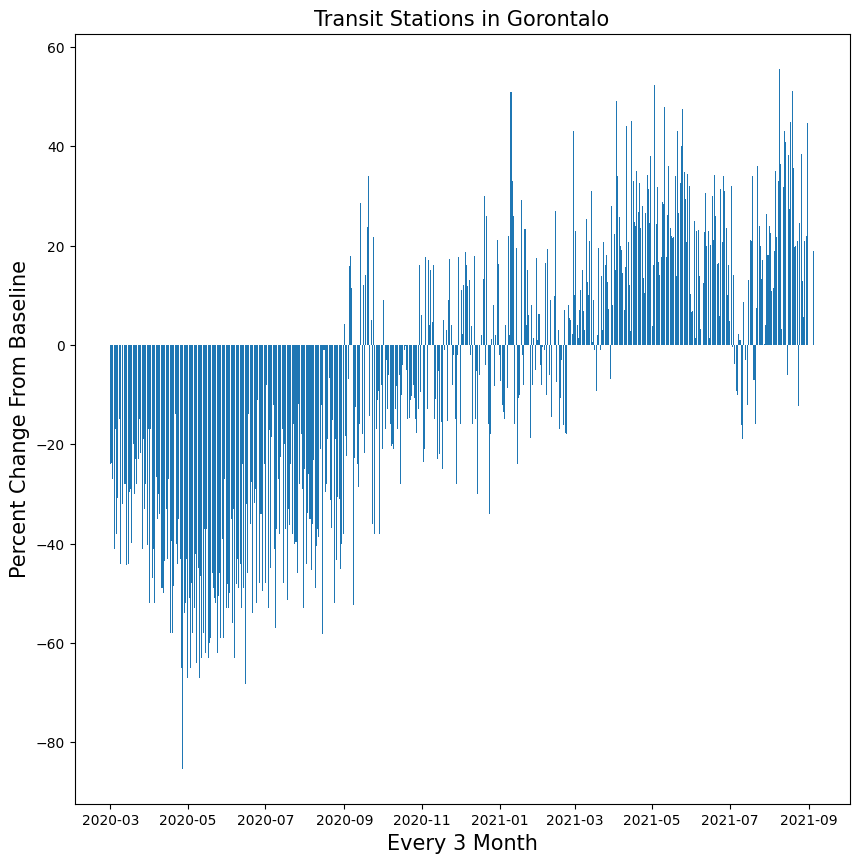

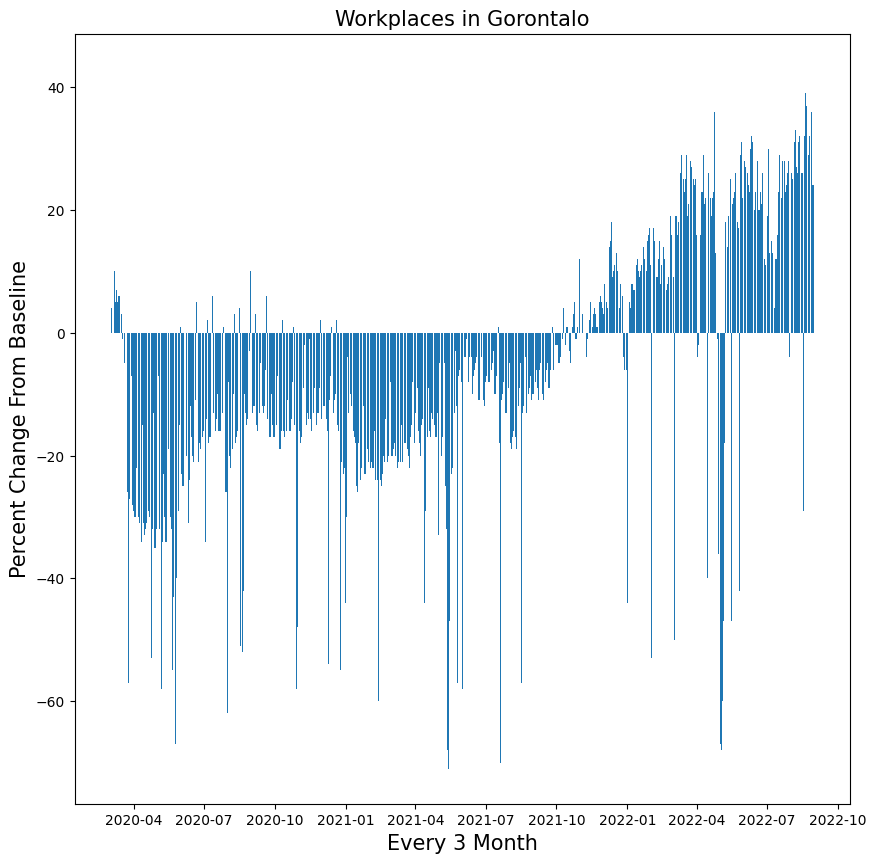

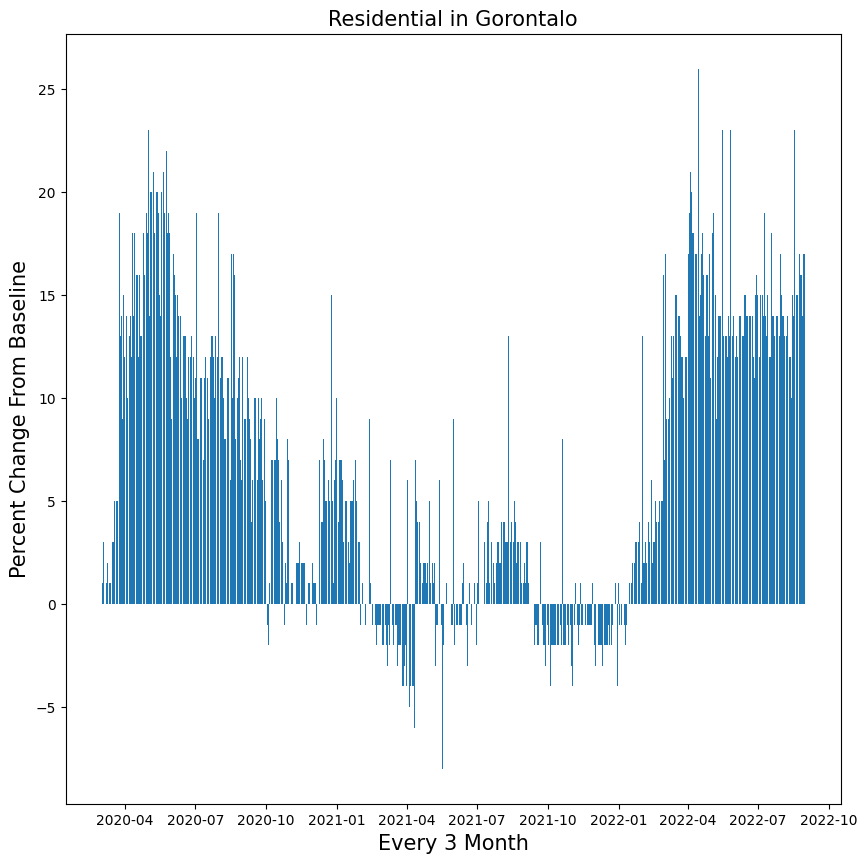

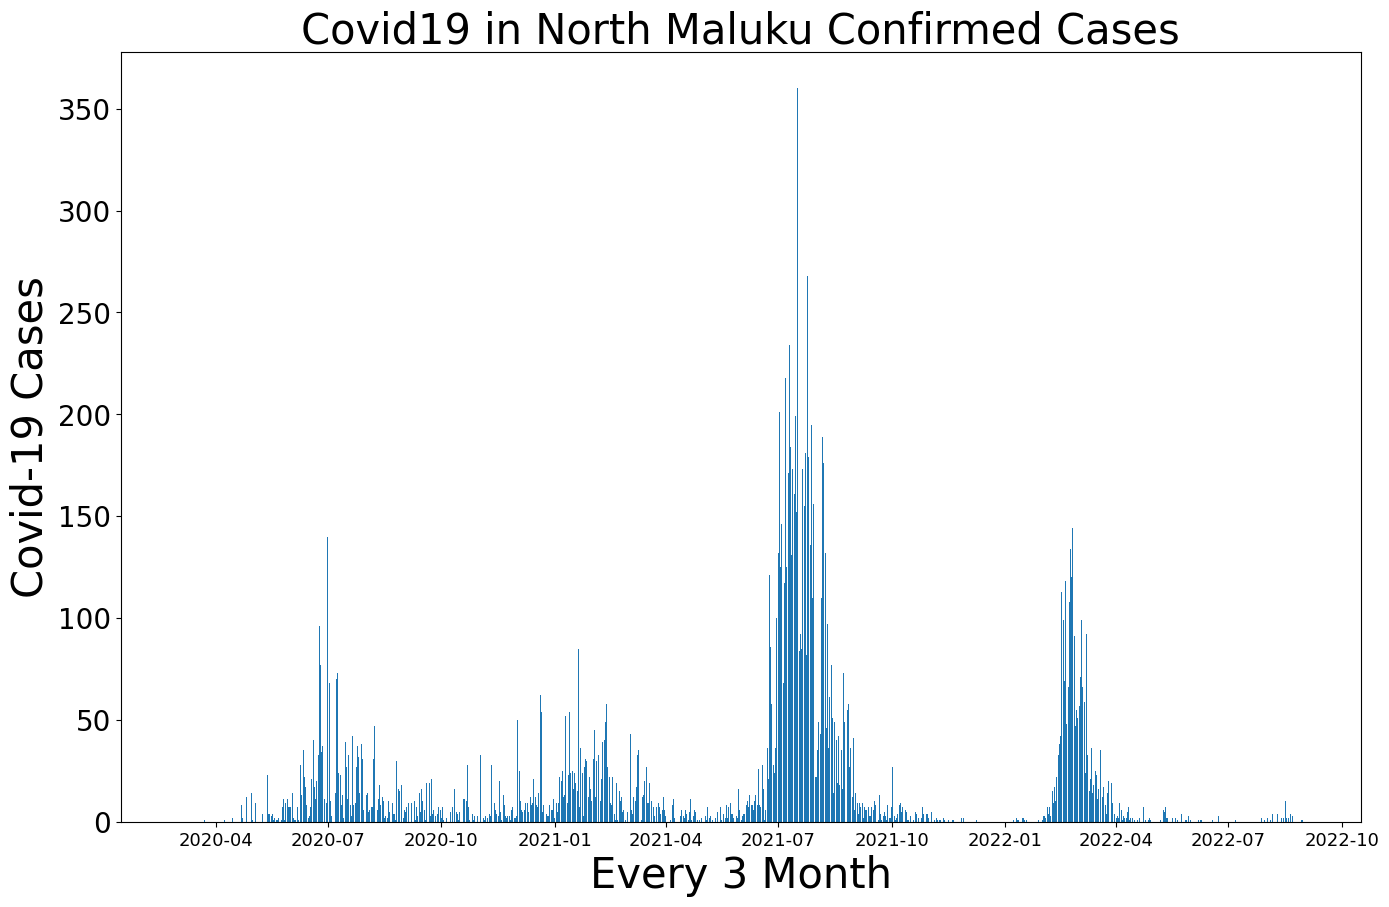

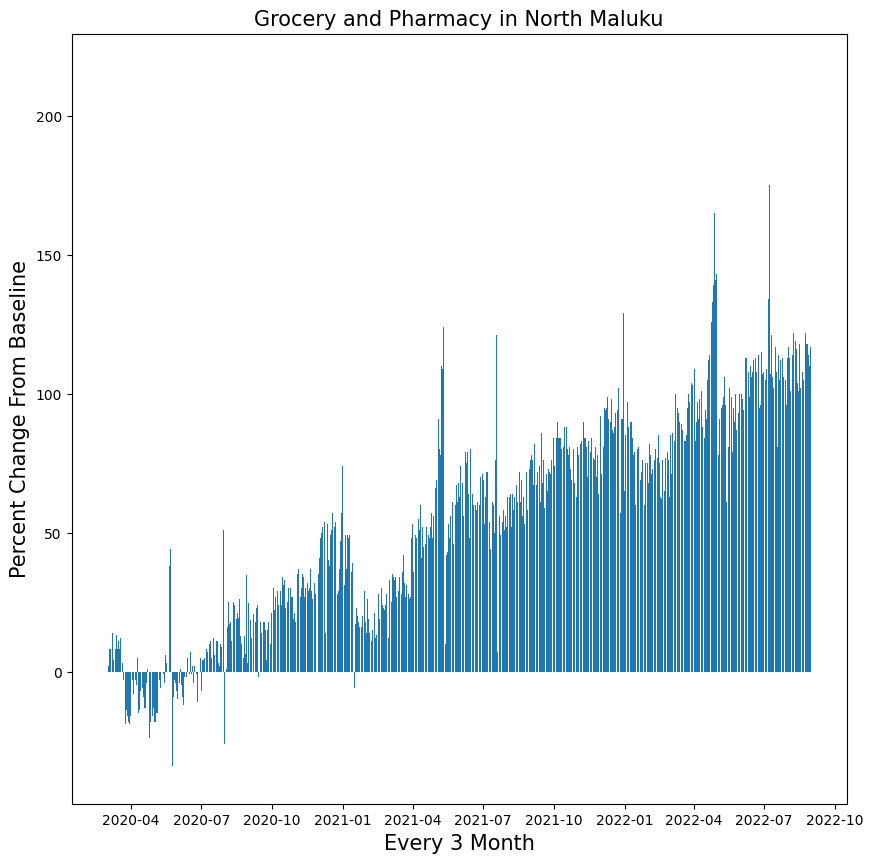

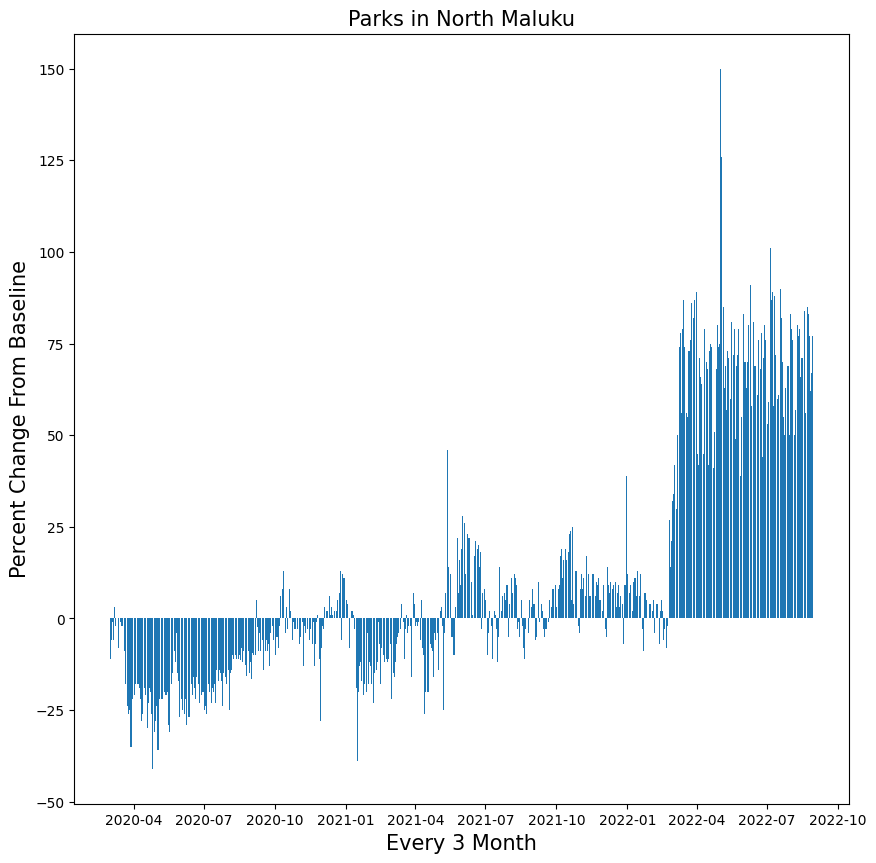

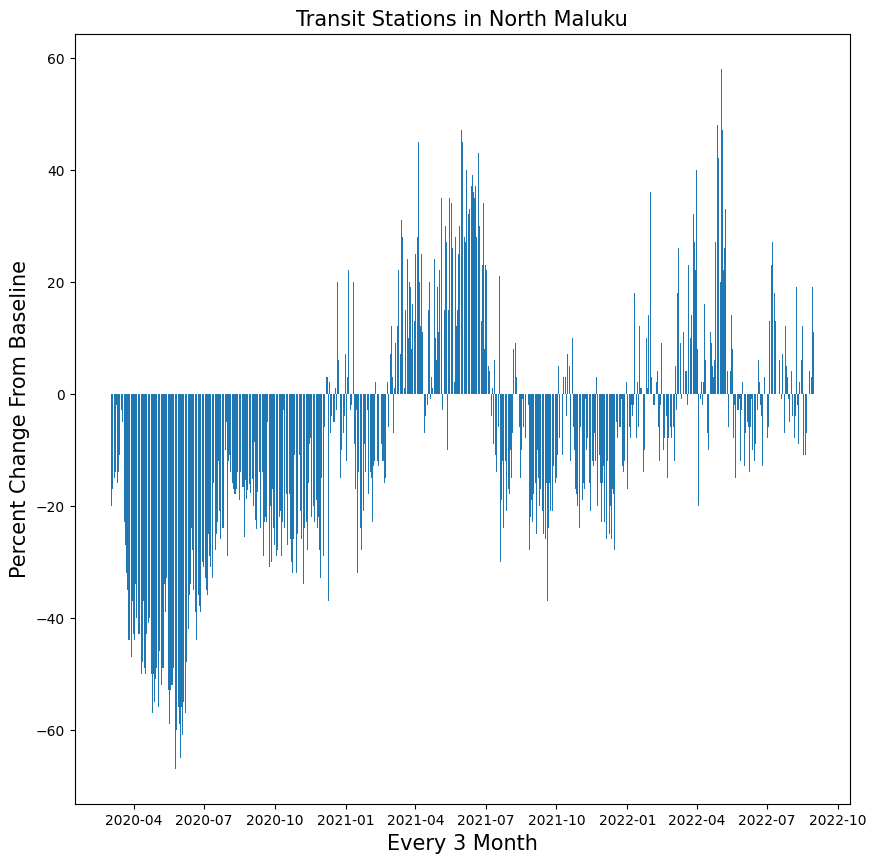

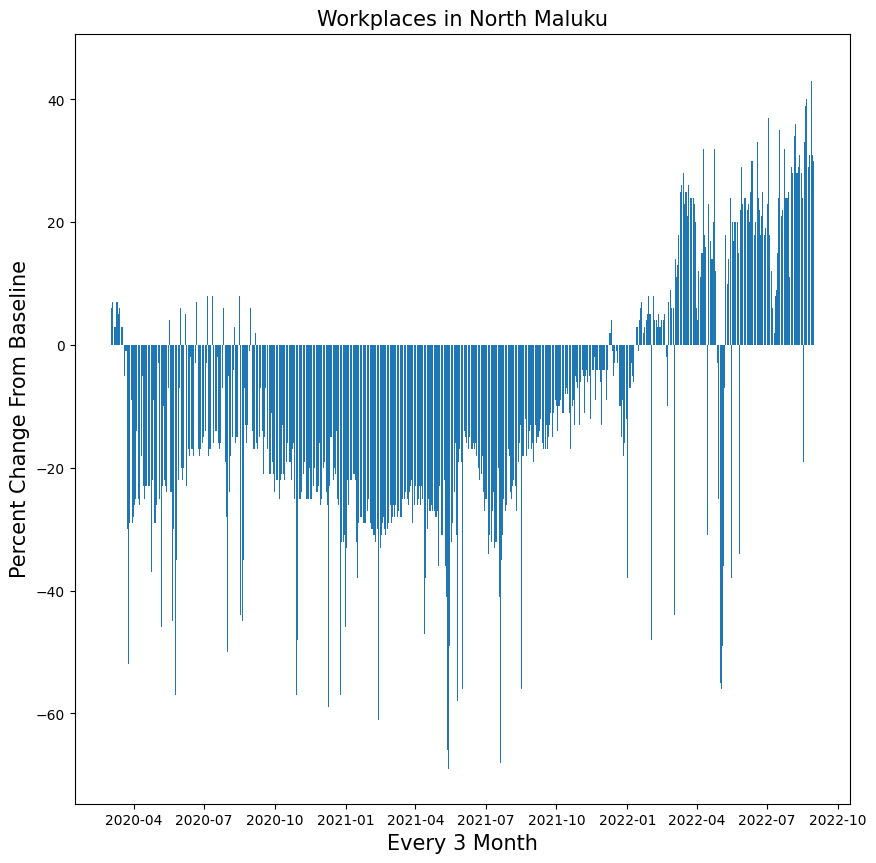

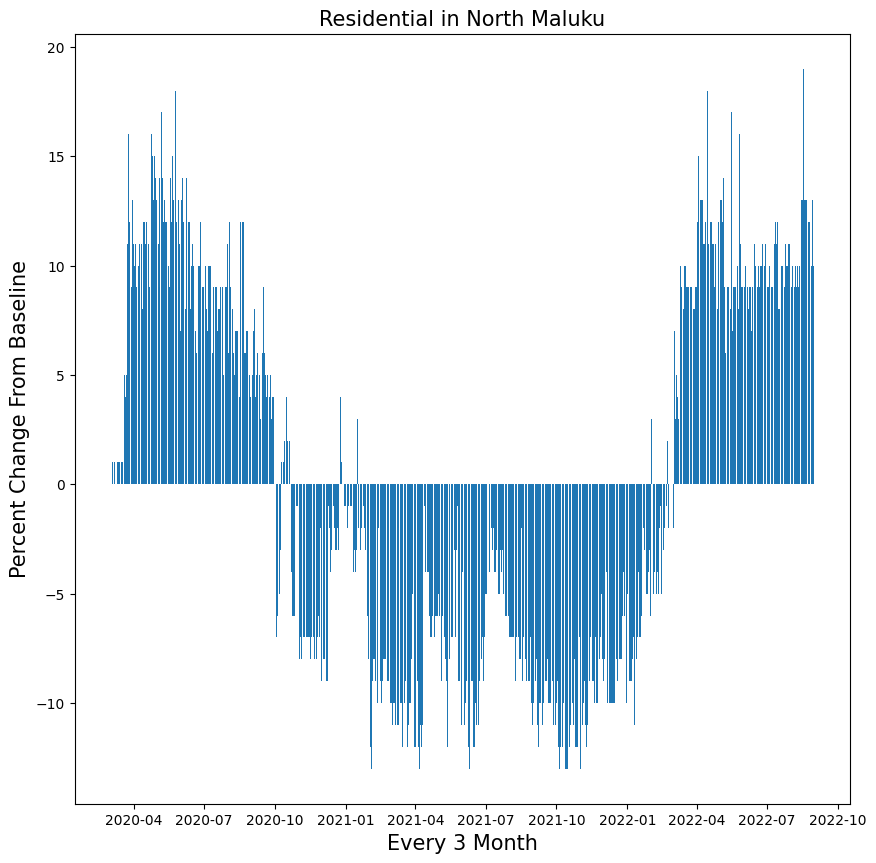

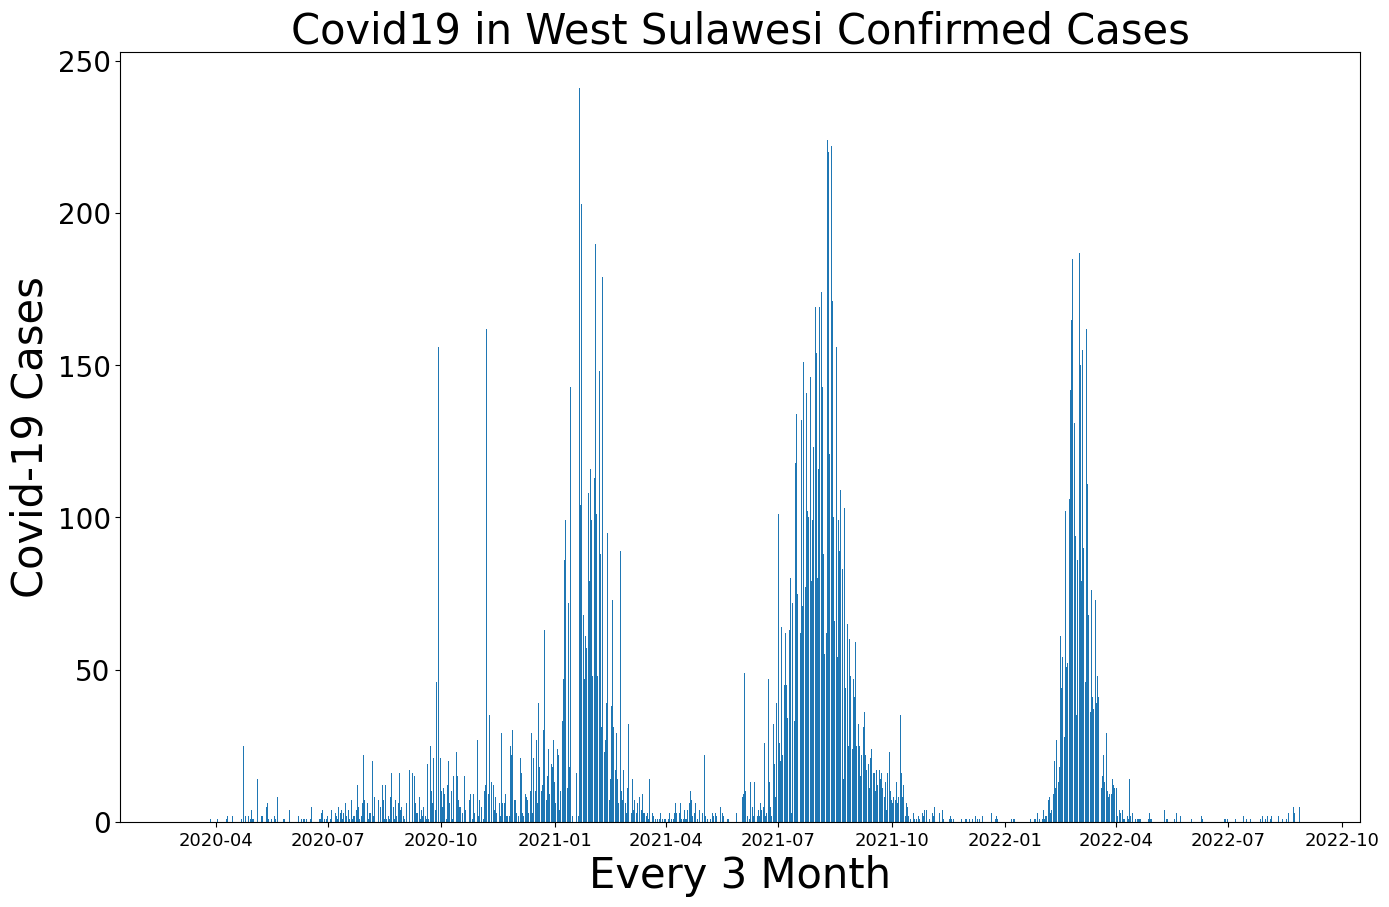

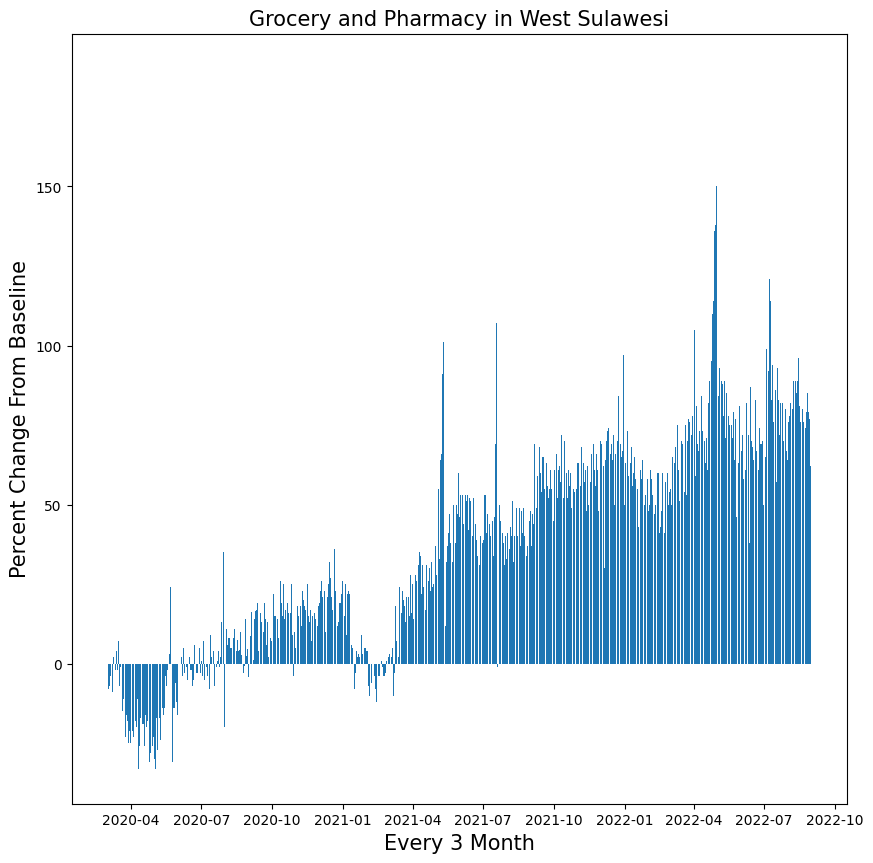

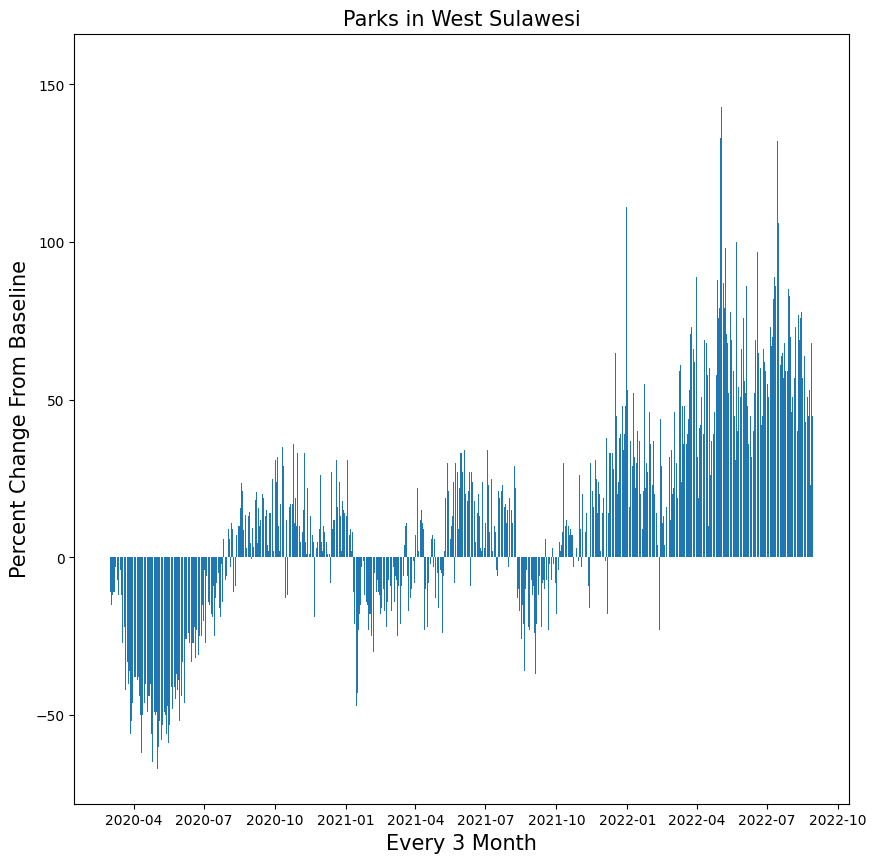

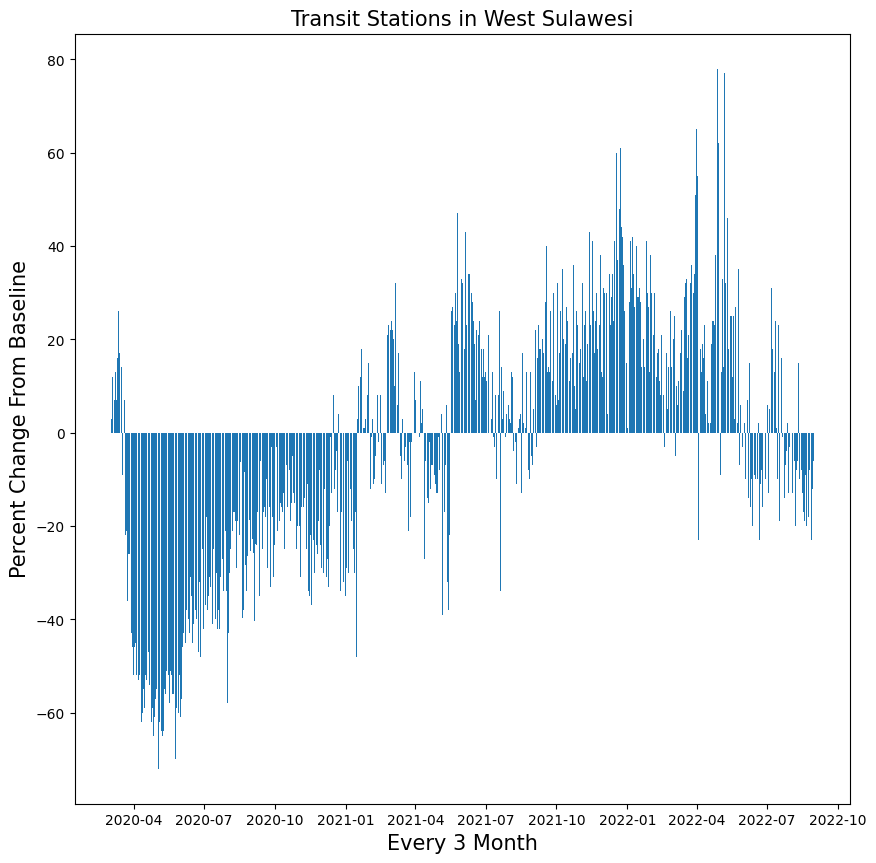

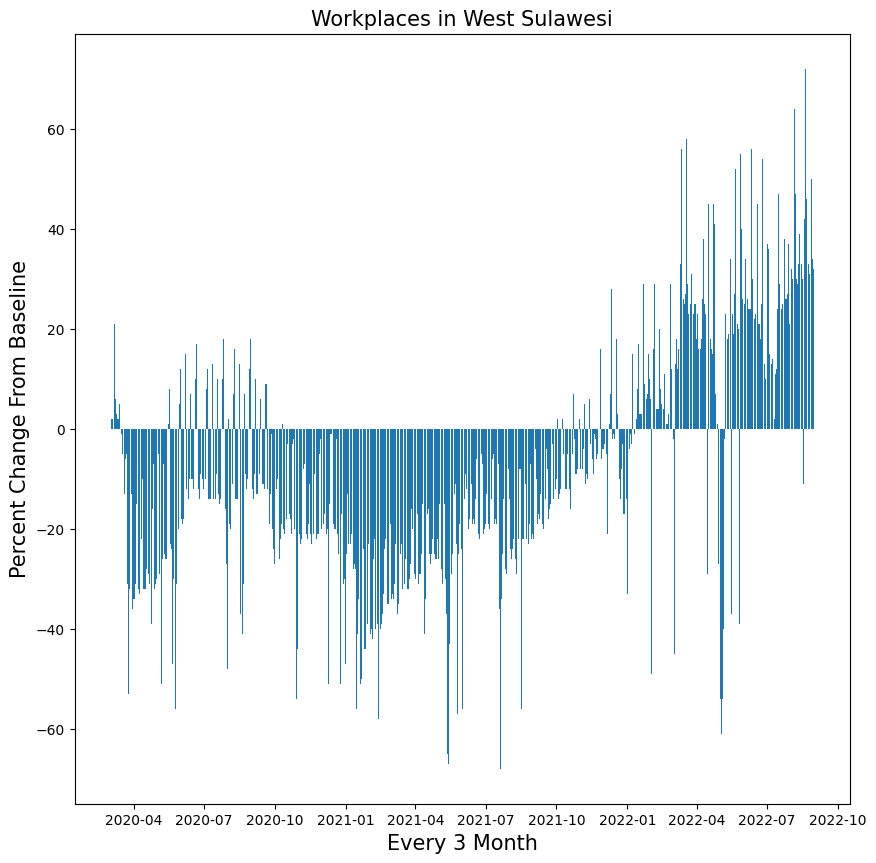

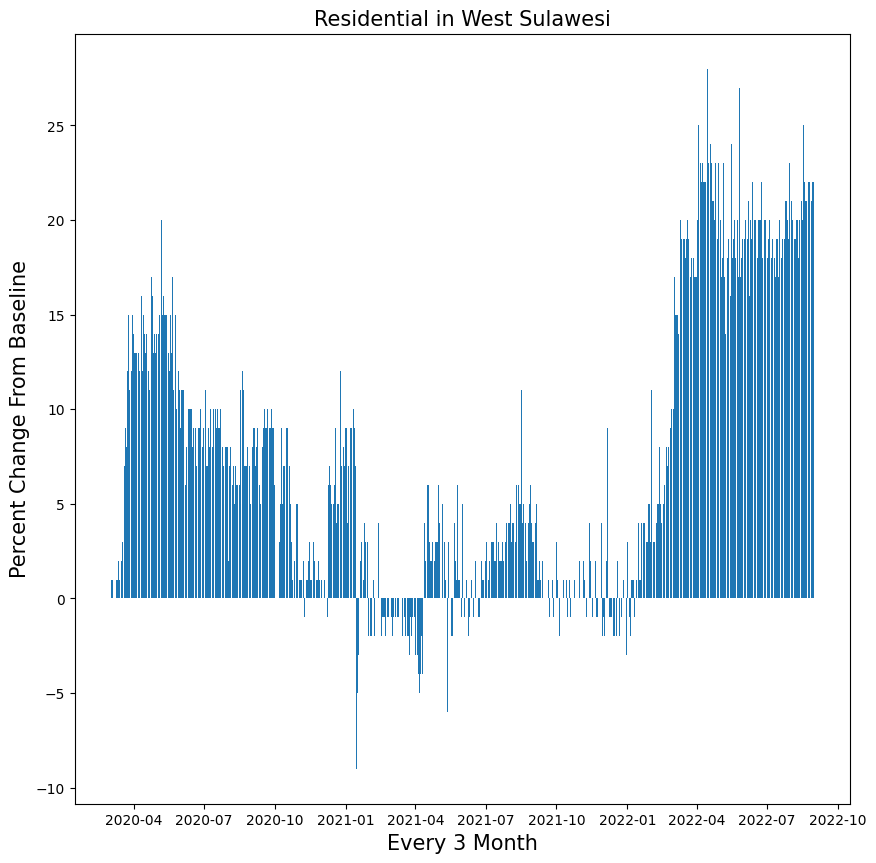

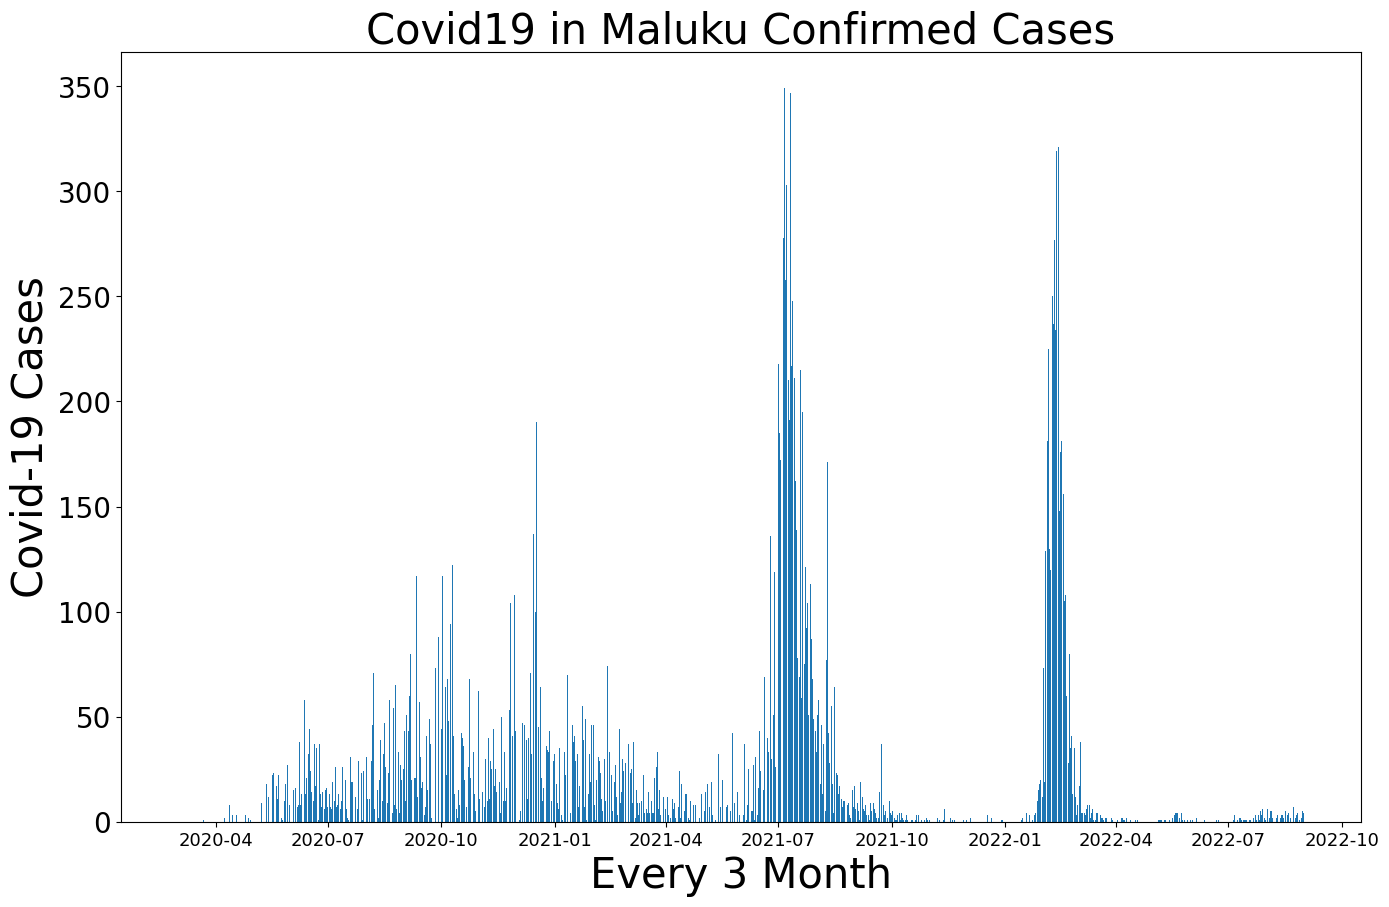

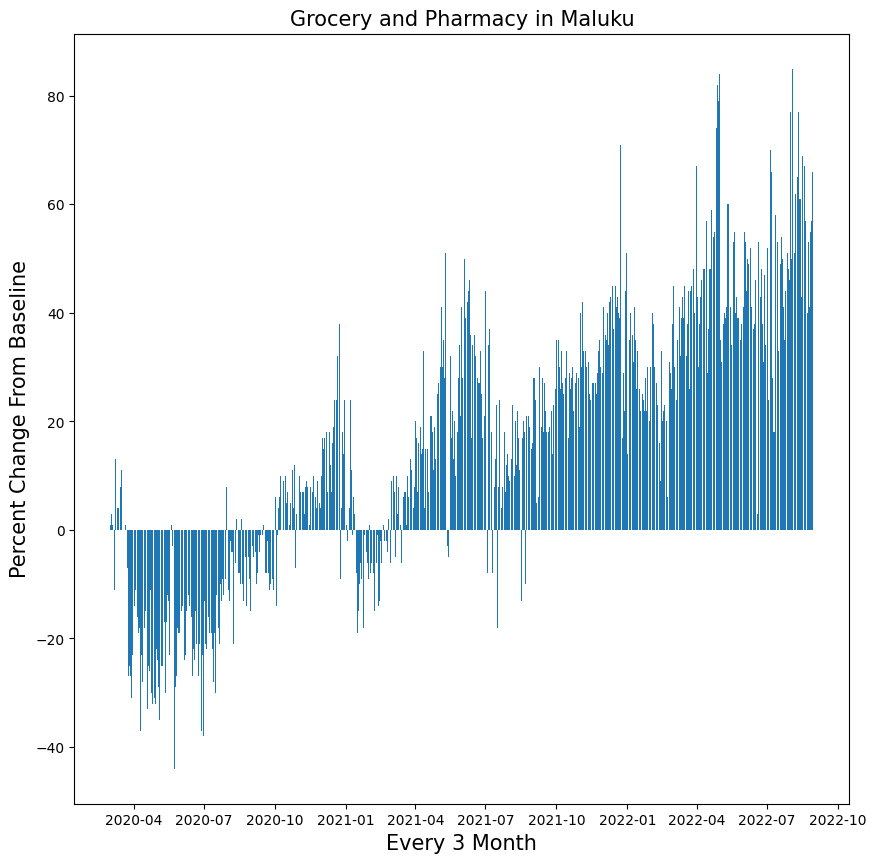

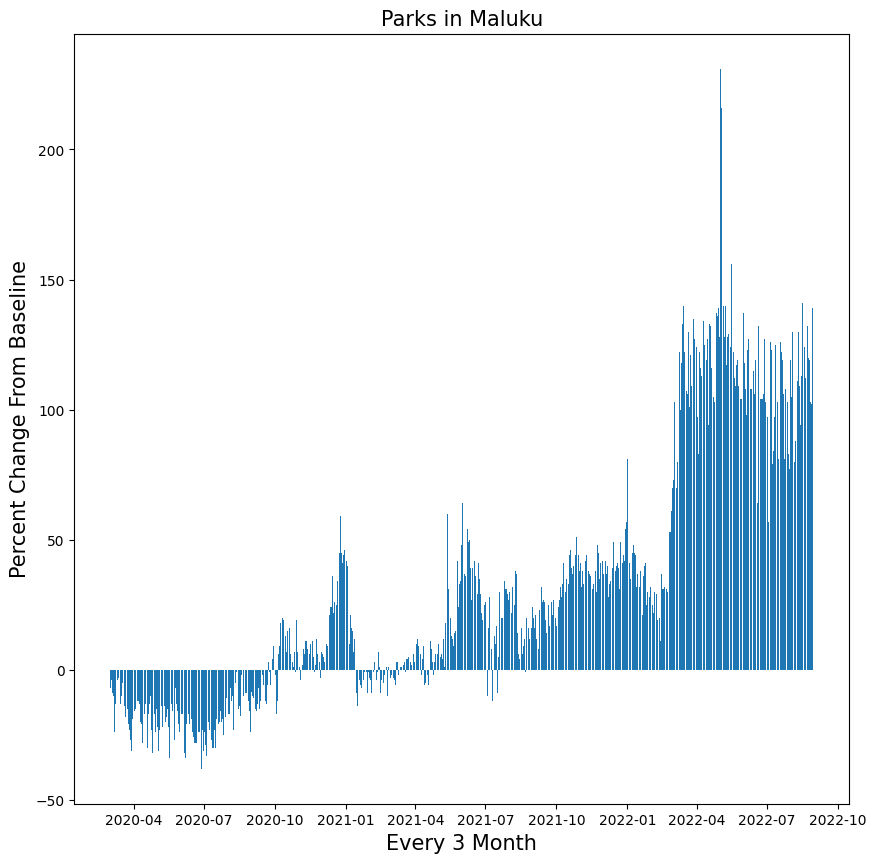

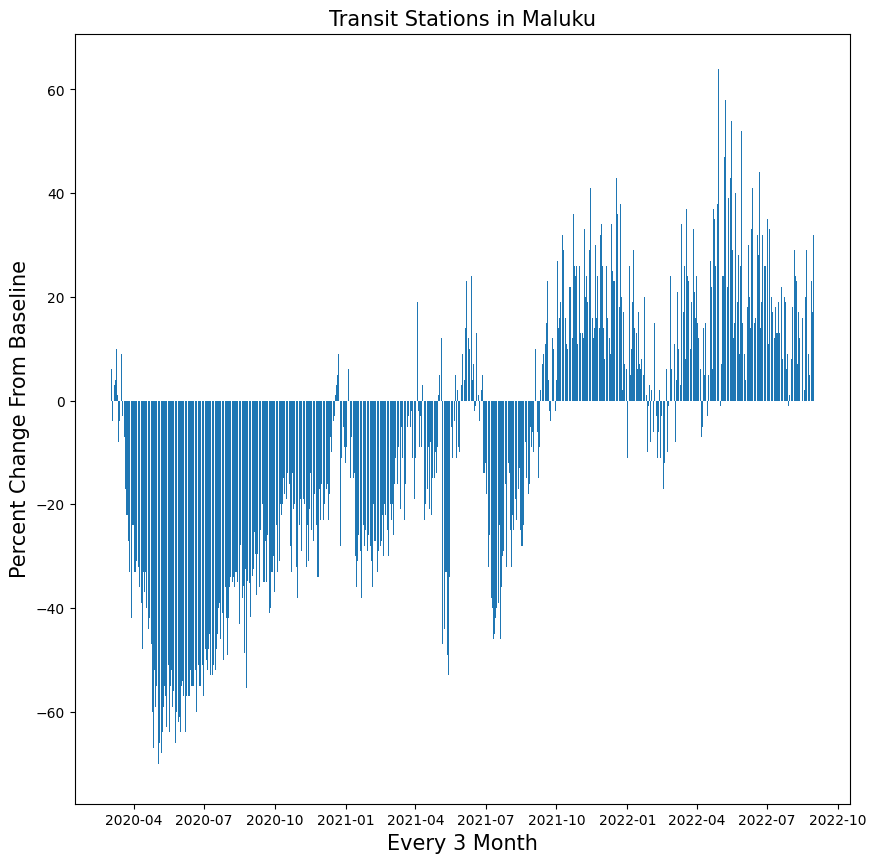

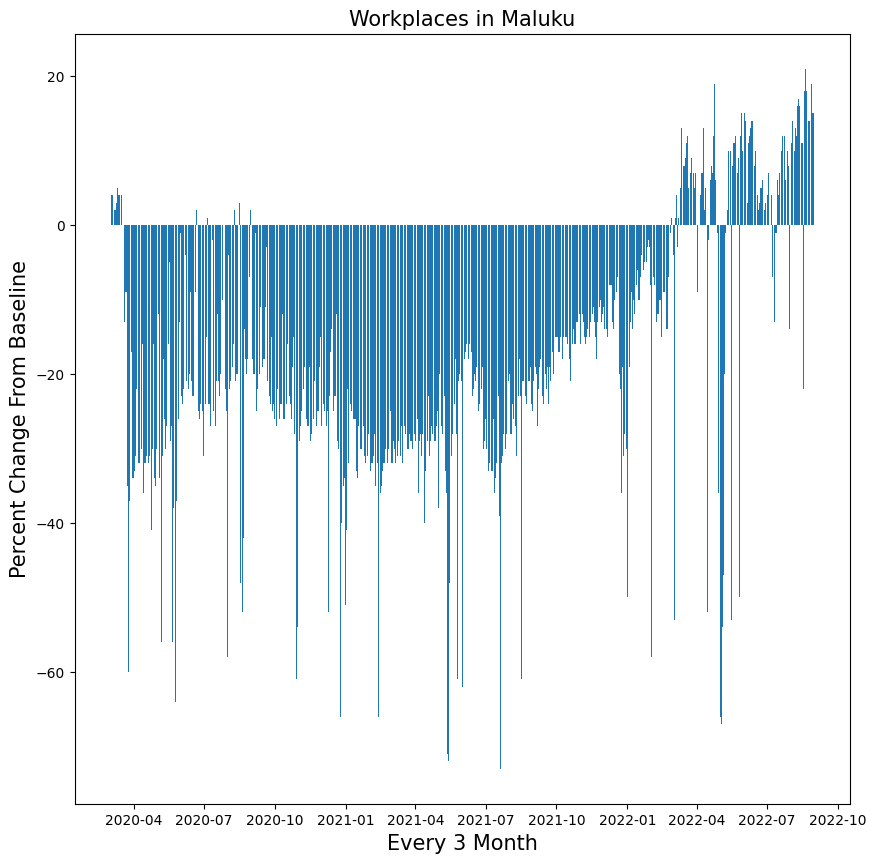

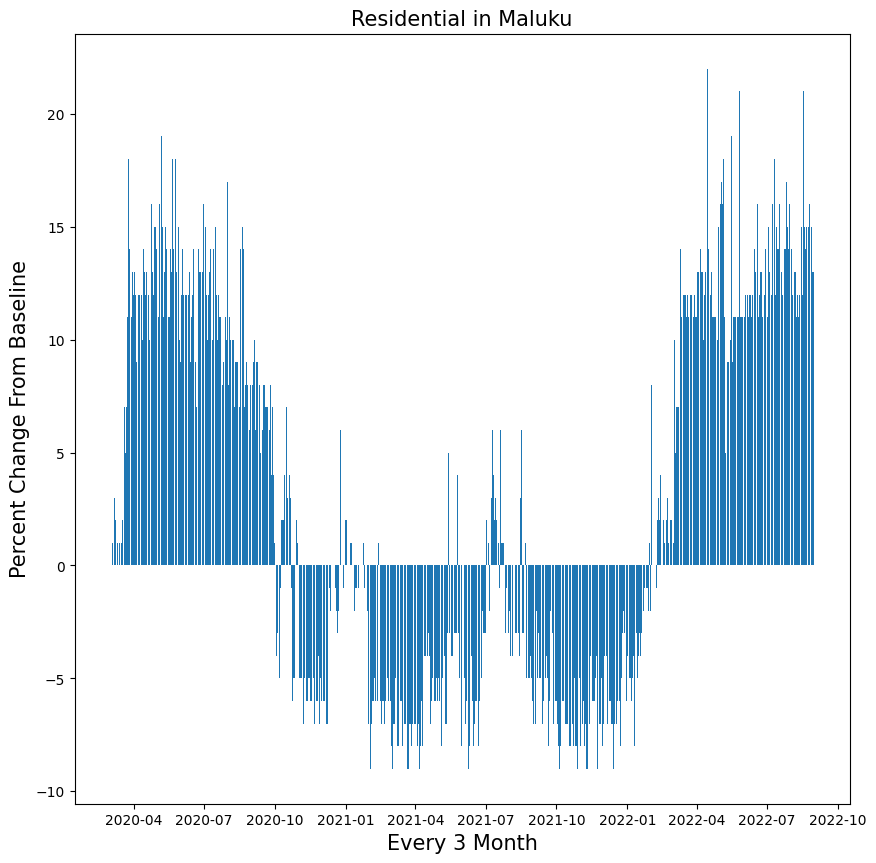

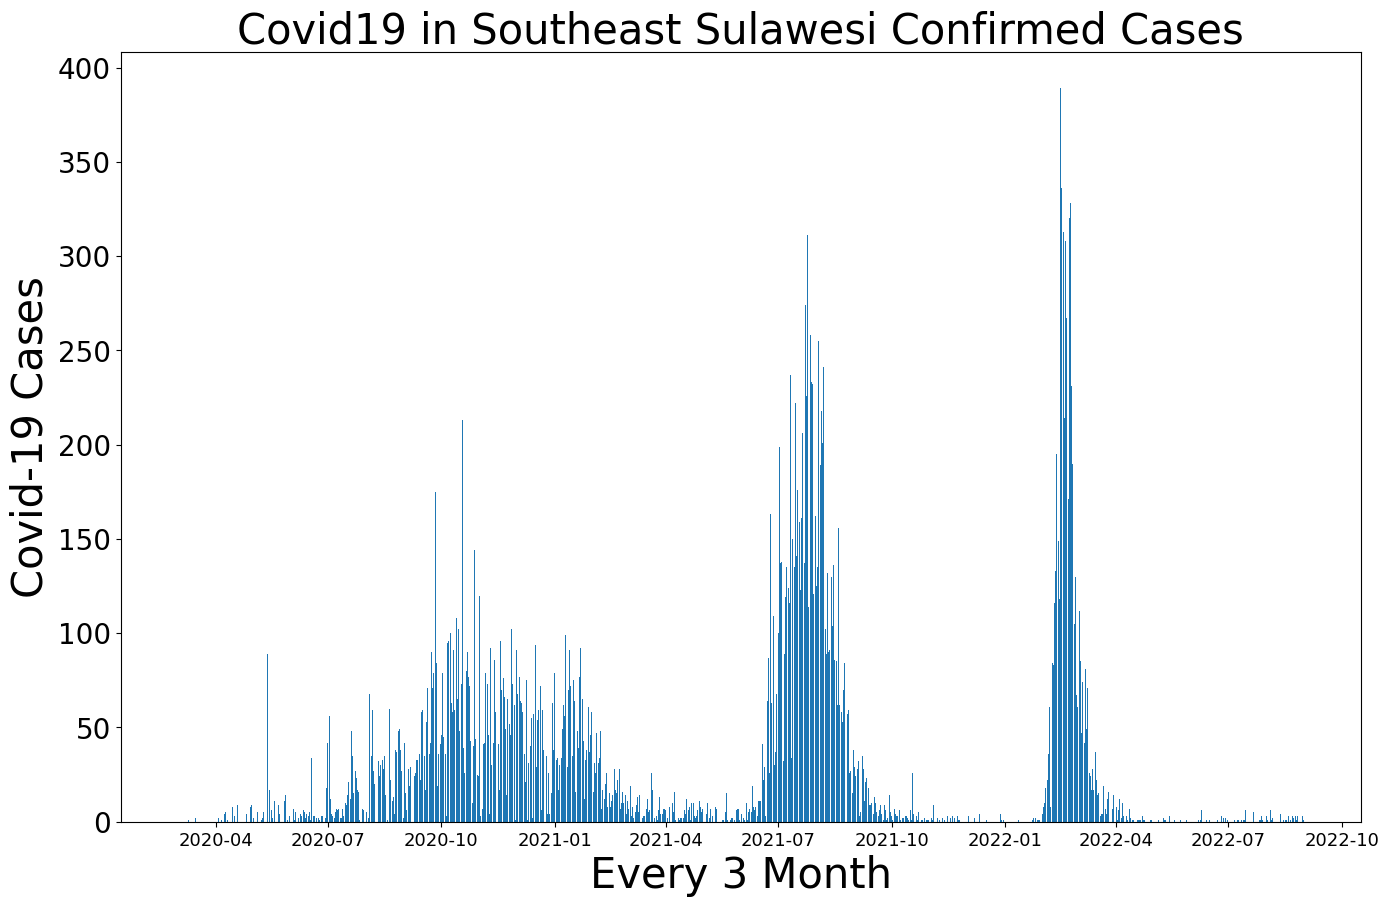

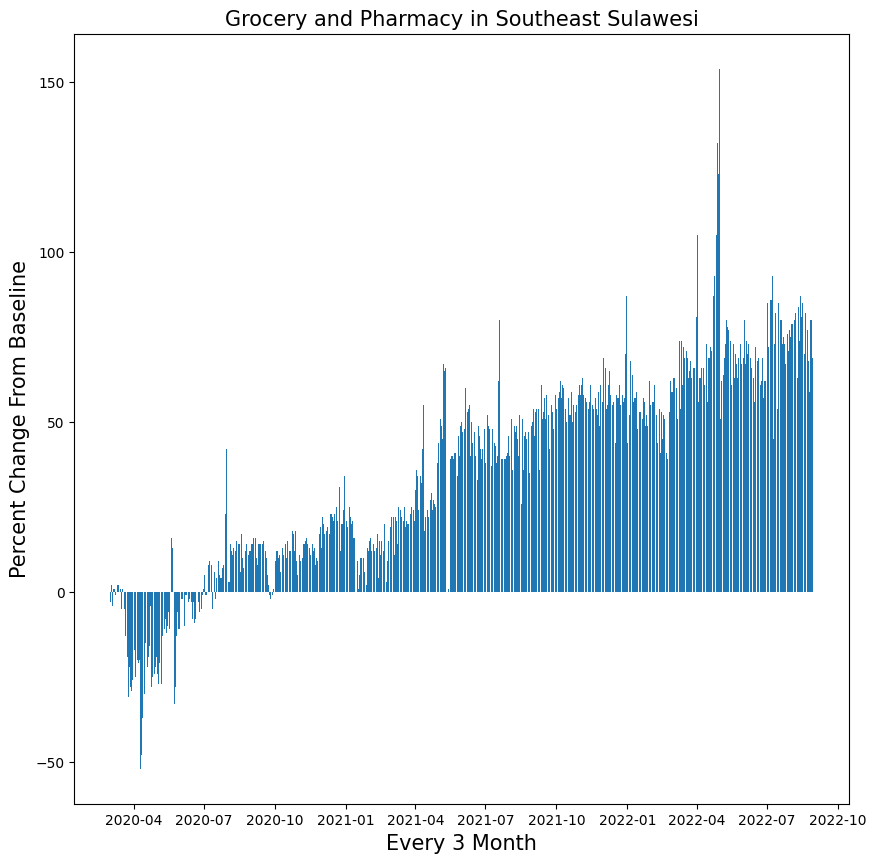

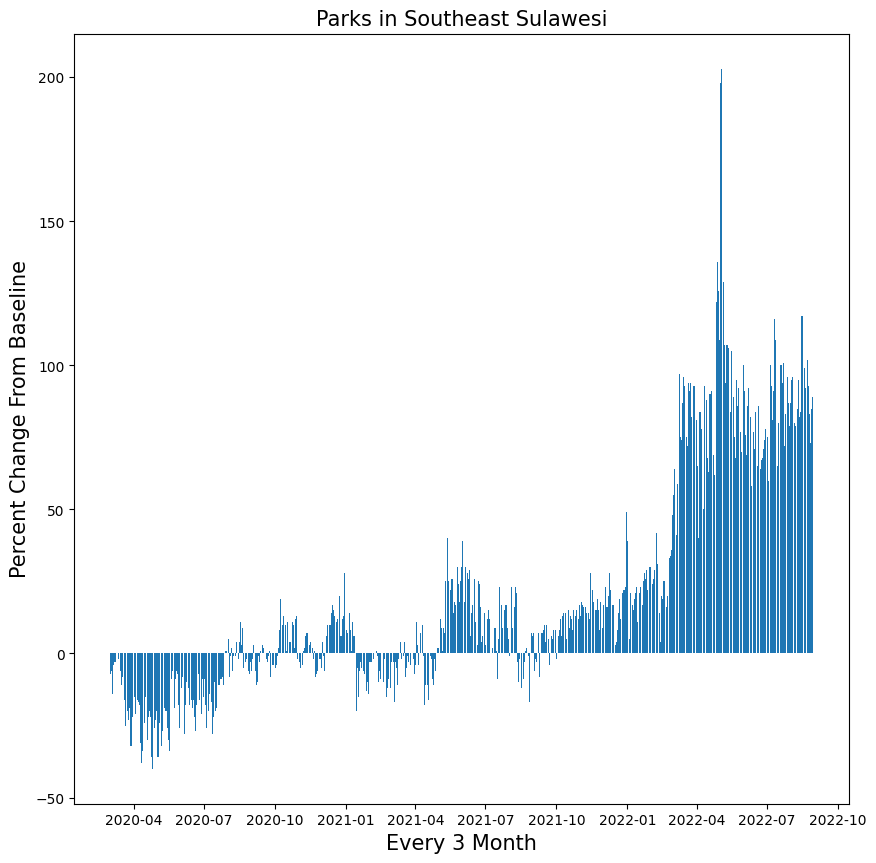

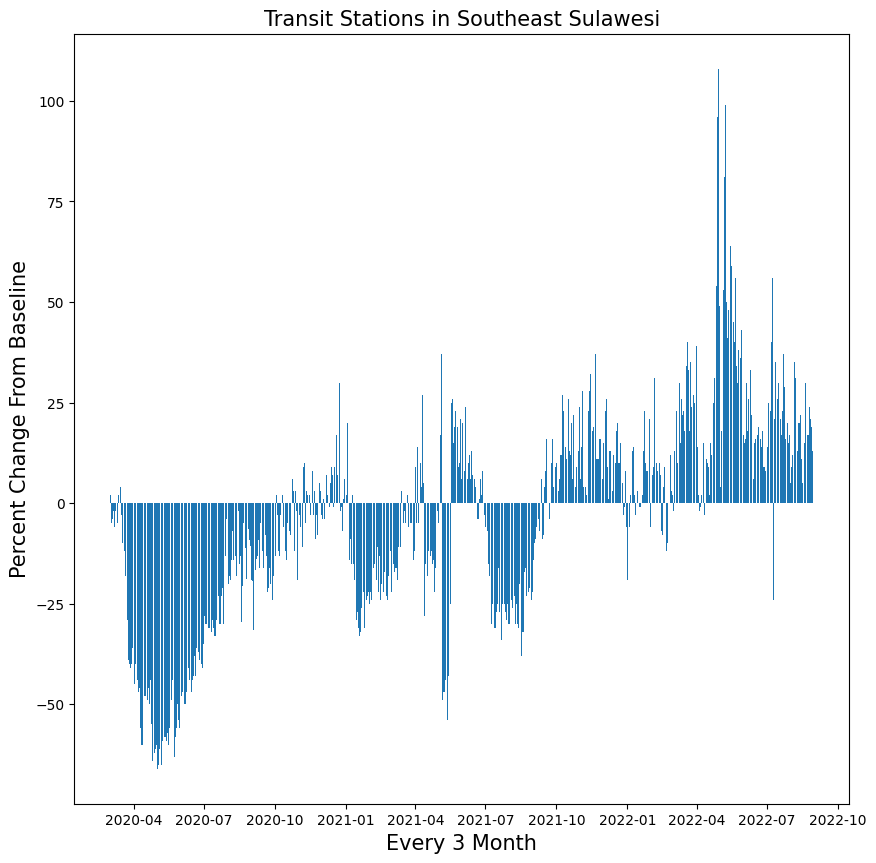

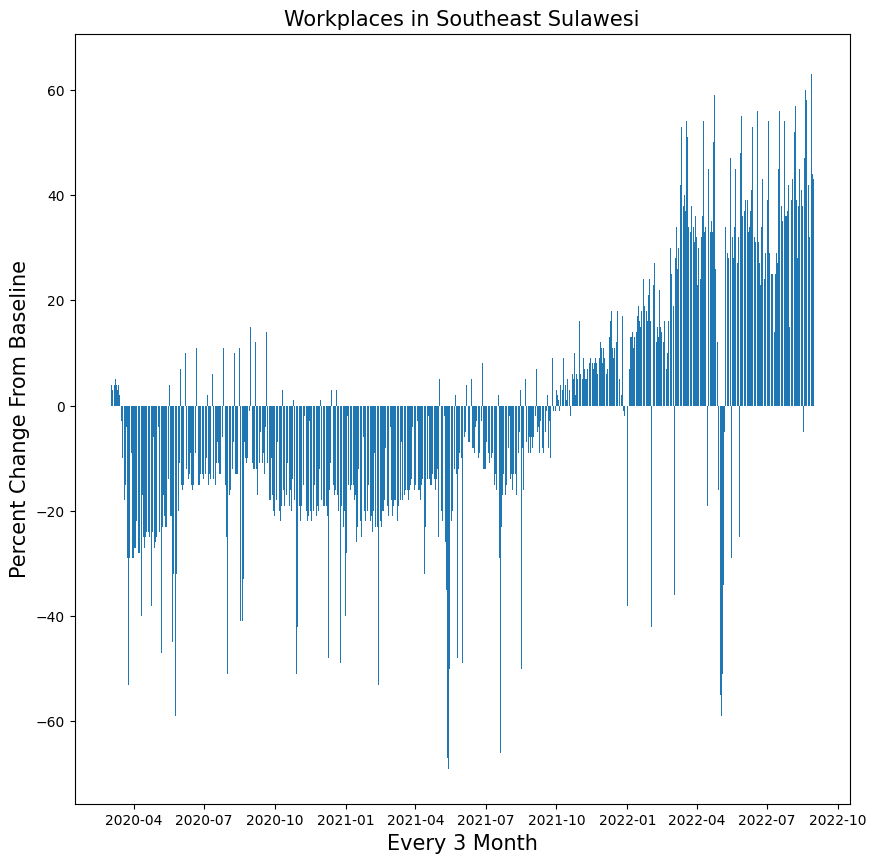

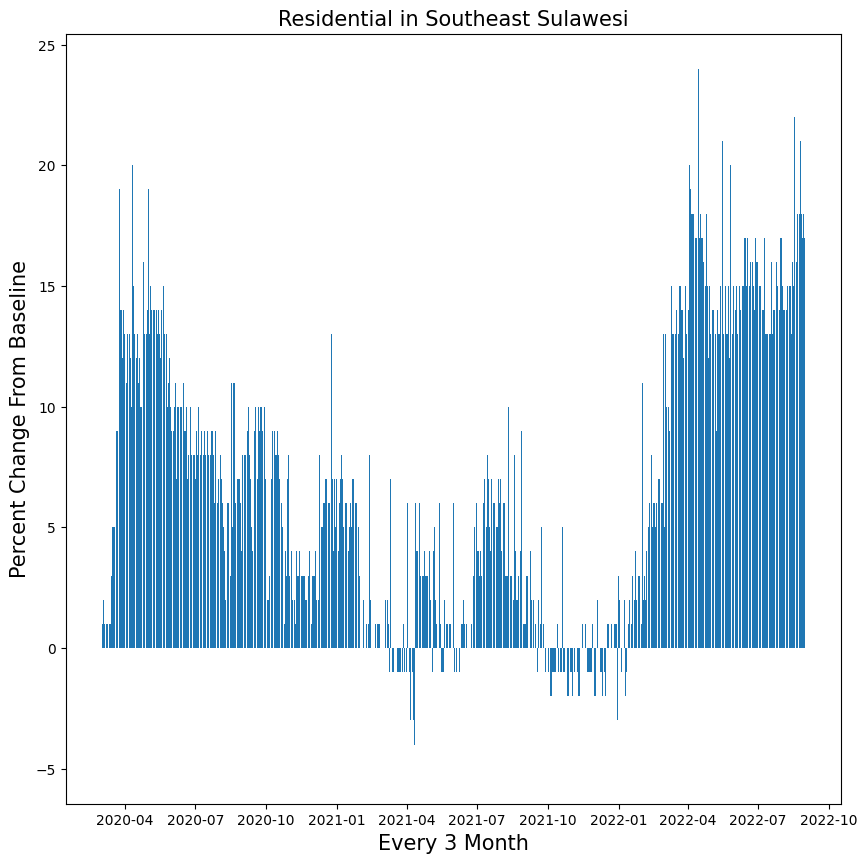

In [ ]:
bottom5 = data_mix_df.loc[(data_mix_df["Year"] == 2022) & (data_mix_df["Month"] == 8) & (data_mix_df["Day"] == 31)].sort_values("Cumulative_Cases", ascending=True).head()
for province in bottom5["Province"]:
  dataprovinsi = data_mix_df.loc[data_mix_df["Province"] == province]

  #covid case
  plt.figure(figsize=(16, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["New_Cases"])
  plt.title(f'Covid19 in {province} Confirmed Cases', size=30)
  plt.xlabel('Every 3 Month', size=30)
  plt.ylabel('Covid-19 Cases', size=30)
  plt.xticks(size=13)
  plt.yticks(size=20)
  plt.show()

  #covid death

  #mobility
  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Grocery_Pharmacy"])
  plt.title(f'Grocery and Pharmacy in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Parks"])
  plt.title(f'Parks in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Transit_Stations"])
  plt.title(f'Transit Stations in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Workplaces"])
  plt.title(f'Workplaces in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

  plt.figure(figsize=(10, 10))
  plt.bar(dataprovinsi["Date"], dataprovinsi["Residential"])
  plt.title(f'Residential in {province}', size=15)
  plt.xlabel('Every 3 Month', size=15)
  plt.ylabel('Percent Change From Baseline', size=15)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

**Covid**

In [ ]:
def show_data_per_province(asc, freq):
  return data_mix_df.loc[(data_mix_df["Year"] == 2022) & (data_mix_df["Month"] == 8) & (data_mix_df["Day"] == 31)]

In [ ]:
data_mix_df.loc[(data_mix_df["Year"] == 2022) & (data_mix_df["Month"] == 8) & (data_mix_df["Day"] == 31)].sort_values("Cumulative_Cases", ascending=False).head(10)

Province       Date  Year  Month  Day  New_Cases  \
11881          Jakarta 2022-08-31  2022      8   31       1931   
25591        West Java 2022-08-31  2022      8   31        981   
5483      Central Java 2022-08-31  2022      8   31        144   
8225         East Java 2022-08-31  2022      8   31        405   
3655            Banten 2022-08-31  2022      8   31        493   
31075       Yogyakarta 2022-08-31  2022      8   31         38   
9139   East Kalimantan 2022-08-31  2022      8   31         38   
1827              Bali 2022-08-31  2022      8   31         90   
18279    North Sumatra 2022-08-31  2022      8   31         93   
20107             Riau 2022-08-31  2022      8   31         28   

       Cumulative_Cases  New_Deceased  Cumulative_Deceased  New_Recovered  \
11881           1395803             3                15457           1537   
25591           1166645             1                15924           1602   
5483             634977             4                33441            165   
8225             597693             2                31697            412   
3655             329769             0                 2943            203   
31075            223902             0                 5923             35   
9139             208627             0                 5722             36   
1827             166271             4                 4707             87   
18279            158176             1                 3279             48   
20107            152320             2                 4446             36   

       Cumulative_Recovered  Retail_Recreation  Grocery_Pharmacy  Parks  \
11881               1364845              -10.0               9.0   -3.0   
25591               1133251               19.0              44.0   58.0   
5483                 599694               32.0              43.0   43.0   
8225                 564746               20.0              44.0   33.0   
3655                 323232               17.0              30.0   36.0   
31075                217271               10.0              19.0   20.0   
9139                 202550               17.0              51.0   66.0   
1827                 160718               -4.0              11.0    7.0   
18279                154089               12.0              35.0   50.0   
20107                147613               26.0              48.0  150.0   

       Transit_Stations  Workplaces  Residential  
11881             -23.0        -5.0          8.0  
25591               4.0        17.0         16.0  
5483                8.0        28.0         22.0  
8225               -6.0        22.0         16.0  
3655               -4.0        12.0         13.0  
31075             -16.0        14.0         14.0  
9139                5.0        23.0          8.0  
1827              -27.0        -2.0         13.0  
18279              -8.0        18.0         15.0  
20107              25.0        28.0         16.0

In [ ]:
data_mix_df.loc[(data_mix_df["Year"] == 2022) & (data_mix_df["Month"] == 8) & (data_mix_df["Day"] == 31)].sort_values("Cumulative_Cases", ascending=True).head(10)

Province       Date  Year  Month  Day  New_Cases  \
10967           Gorontalo 2022-08-31  2022      8   31          0   
16451        North Maluku 2022-08-31  2022      8   31          0   
29247       West Sulawesi 2022-08-31  2022      8   31          0   
14623              Maluku 2022-08-31  2022      8   31          4   
24677  Southeast Sulawesi 2022-08-31  2022      8   31          1   
4569             Bengkulu 2022-08-31  2022      8   31          3   
28333          West Papua 2022-08-31  2022      8   31         12   
27419  West Nusa Tenggara 2022-08-31  2022      8   31          2   
12795               Jambi 2022-08-31  2022      8   31          5   
913                  Aceh 2022-08-31  2022      8   31          8   

       Cumulative_Cases  New_Deceased  Cumulative_Deceased  New_Recovered  \
10967             13941             0                  487              0   
16451             14581             0                  334              4   
29247             15595             0                  394              1   
14623             18706             0                  294              7   
24677             25673             0                  569              0   
4569              29139             0                  522              0   
28333             32035             0                  384             16   
27419             36231             0                  901              4   
12795             38543             1                  888             11   
913               43902             0                 2221              4   

       Cumulative_Recovered  Retail_Recreation  Grocery_Pharmacy  Parks  \
10967                 13433               45.0              61.0  112.0   
16451                 14235               20.0             120.0   93.0   
29247                 15192               36.0              80.0   63.0   
14623                 18370                7.0              63.0  141.0   
24677                 25078               42.0              76.0   94.0   
4569                  28604               35.0              88.0   25.0   
28333                 31507                6.0              49.0  -22.0   
27419                 35312               30.0              46.0   60.0   
12795                 37581               30.0              55.0   59.0   
913                   41613               17.0              37.0   22.0   

       Transit_Stations  Workplaces  Residential  
10967               NaN        27.0         14.0  
16451              20.0        27.0          9.0  
29247               2.0        33.0         19.0  
14623              25.0        18.0         12.0  
24677               5.0        47.0         15.0  
4569              -47.0        27.0         15.0  
28333              16.0        23.0         13.0  
27419               7.0        30.0         20.0  
12795             -48.0        35.0         16.0  
913                -9.0        18.0         16.0

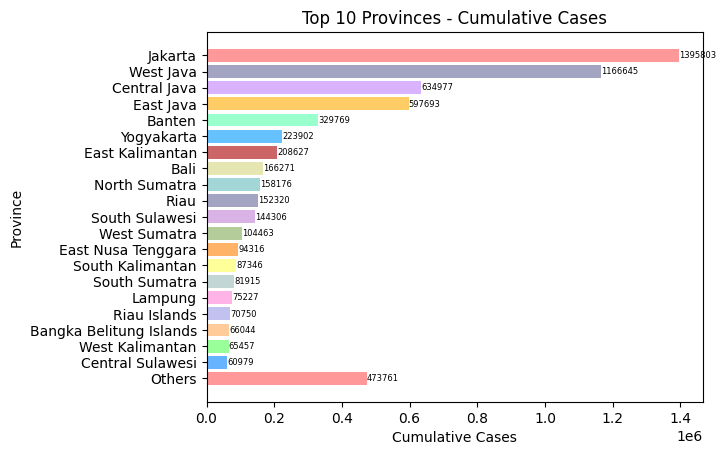

In [ ]:
data_kumulatif = data_mix_df.loc[(data_mix_df["Year"] == 2022) & (data_mix_df["Month"] == 8) & (data_mix_df["Day"] == 31)].sort_values("Cumulative_Cases", ascending=False)
top_20 = data_kumulatif.head(20)

#sum for other
other_cases_sum = data_kumulatif.loc[~data_kumulatif["Province"].isin(top_20["Province"]), "Cumulative_Cases"].sum()

#add other
other_row = pd.DataFrame({"Province": ["Others"], "Cumulative_Cases": [other_cases_sum]})
top_20 = pd.concat([top_20, other_row])
top_20 = top_20.iloc[::-1]

#colour
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2d6d6', '#ffff99', '#ffb366', '#b3cc99',
          '#d9b3e6', '#a3a3c2', '#a3d6d6', '#e6e6b3', '#cc6666', '#66c2ff', '#99ffcc', '#ffcc66', '#d9b3ff', '#a3a3c2']

plt.barh(top_20["Province"], top_20["Cumulative_Cases"], color=colors)

#label
for i, value in enumerate(top_20["Cumulative_Cases"]):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=6)

plt.xlabel("Cumulative Cases")
plt.ylabel("Province")
plt.title("Top 10 Provinces - Cumulative Cases")

plt.show()

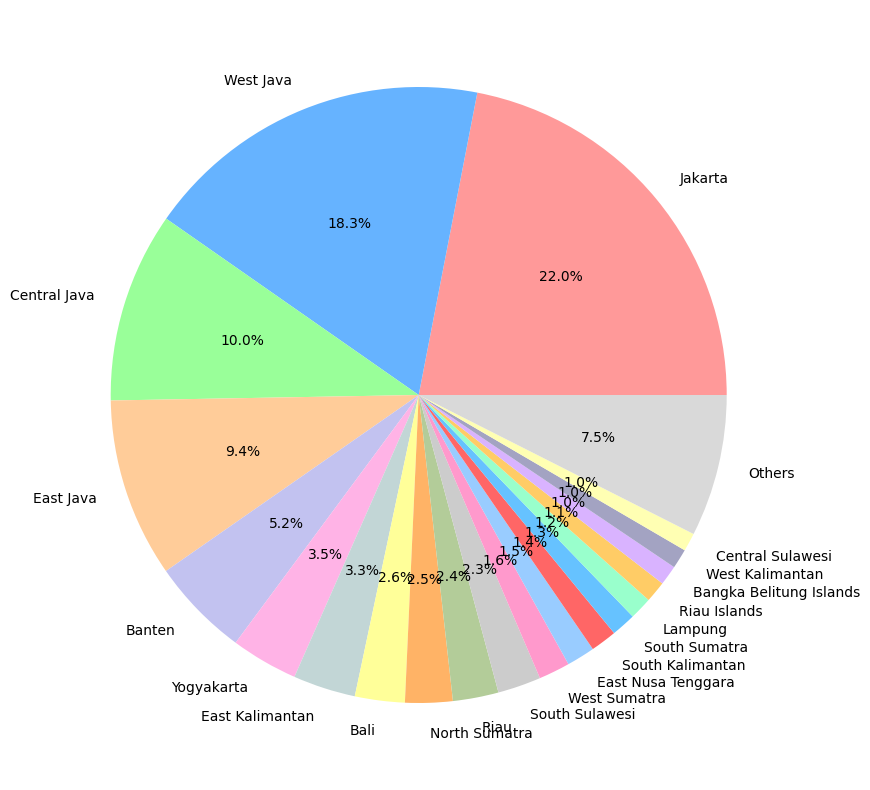

In [ ]:
data_kumulatif = data_mix_df.loc[(data_mix_df["Year"] == 2022) & (data_mix_df["Month"] == 8) & (data_mix_df["Day"] == 31)]
top_20 = data_kumulatif.sort_values("Cumulative_Cases", ascending=False).head(20)

# sum
other_cases_sum = data_kumulatif.loc[~data_kumulatif["Province"].isin(top_20["Province"]), "Cumulative_Cases"].sum()

# sum other than top 20
other_row = pd.DataFrame({"Province": ["Others"], "Cumulative_Cases": [other_cases_sum]})
top_20 = pd.concat([top_20, other_row])

# plotting figure
plt.figure(figsize=(16, 10))

#custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2d6d6', '#ffff99', '#ffb366', '#b3cc99',
          '#cccccc', '#ff99cc', '#99ccff', '#ff6666', '#66c2ff', '#99ffcc', '#ffcc66', '#d9b3ff', '#a3a3c2', '#ffffb3',
          '#d9d9d9']

# Create the pie chart
plt.pie(top_20["Cumulative_Cases"], labels=top_20["Province"], colors=colors, autopct='%1.1f%%')

plt.show()

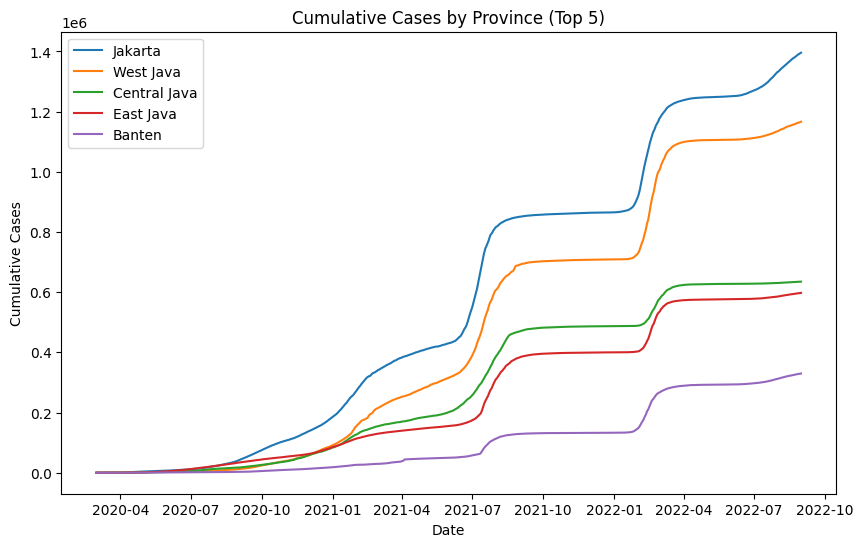

In [ ]:
data_kumulatif = data_mix_df.loc[(data_mix_df["Year"] == 2022) & (data_mix_df["Month"] == 8) & (data_mix_df["Day"] == 31)]
top_5 = data_kumulatif.sort_values("Cumulative_Cases", ascending=False).head(5)

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the values as desired

# Iterate over each province
for province in top_5["Province"]:
    province_df = data_mix_df.loc[data_mix_df["Province"] == province]
    plt.plot(province_df["Date"], province_df["Cumulative_Cases"], label=province)

plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("Cumulative Cases by Province (Top 5)")
plt.legend()

plt.show()

### 3. Preliminary Analysis

Check periode of wave covid

In [ ]:
def analysis_per_period(region):
  if region == 'National':
    df = data_mix_national_df
  else:
    df = data_mix_df.loc[(data_mix_df['Province'] == region)]

  df = df[['Year','Month','Day','New_Cases','New_Deceased','New_Recovered','Retail_Recreation','Grocery_Pharmacy','Parks','Transit_Stations','Workplaces','Residential']]

  PeriodAnalysis = pd.DataFrame(columns=["Periode", "Total_Case", "Total_Deceased", "Total_Recovered", "Retail_Recreation", "Grocery_Pharmacy", "Parks", "Transit_Stations", "Workplaces", "Residential"])

  current_year = 2020
  current_month = 3
  sum = 0
  period = 1
  total_day = 0

  while ((current_year <= 2022 and current_month <= 8 ) or (current_year < 2022)):
    for month in range(current_month, current_month+3):
      year = current_year
      if (month > 12):
        month -= 12
        year += 1
      data = df.loc[(df['Year'] == year) & (df['Month'] == month)]
      sum += data.sum()
      total_day += len(data)
      mean_data = sum / total_day

    PeriodAnalysis = PeriodAnalysis.append({"Periode":period,
                                            "Total_Case":sum["New_Cases"],
                                            "Total_Deceased":sum["New_Deceased"],
                                            "Total_Recovered":sum["New_Recovered"],
                                            "Retail_Recreation":mean_data["Retail_Recreation"],
                                            "Grocery_Pharmacy":mean_data["Grocery_Pharmacy"],
                                            "Parks":mean_data["Parks"],
                                            "Transit_Stations":mean_data["Transit_Stations"],
                                            "Workplaces":mean_data["Workplaces"],
                                            "Residential":mean_data["Residential"]},
                                          ignore_index=True)
    sum = 0
    total_day = 0
    period += 1
    current_month += 3
    if current_month > 12:
      current_month -= 12
      current_year += 1

  # correcting data types
  PeriodAnalysis["Periode"] = PeriodAnalysis["Periode"].astype(np.int64)
  PeriodAnalysis["Total_Case"] = PeriodAnalysis["Total_Case"].astype(np.int64)
  PeriodAnalysis["Total_Deceased"] = PeriodAnalysis["Total_Deceased"].astype(np.int64)
  PeriodAnalysis["Total_Recovered"] = PeriodAnalysis["Total_Recovered"].astype(np.int64)

  return PeriodAnalysis

In [ ]:
def show_bar_mobility_per_period(region):
  PeriodAnalysis = analysis_per_period(region)
  mobility_per_period = PeriodAnalysis[['Retail_Recreation','Grocery_Pharmacy','Parks','Transit_Stations','Workplaces','Residential']]

  # create valid markers from mpl.markers
  valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])

  # valid_markers = mpl.markers.MarkerStyle.filled_markers

  markers = np.random.choice(valid_markers, mobility_per_period.shape[1], replace=False)

  ax = mobility_per_period.plot(kind='bar')
  for i, line in enumerate(ax.get_lines()):
      line.set_marker(markers[i])

  # adding legend
  ax.legend(mobility_per_period.columns, loc='best')
  plt.ylabel('Percent Change from Baseline')
  plt.xlabel('Periode')
  plt.title(f'{region} Community Mobility ')
  labels = [i+1 for i in range(10)]
  ax.set_xticklabels(labels)
  plt.tight_layout()
  plt.show()

<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-99-35ef24bb4244>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])


In [ ]:
def show_line_mobility_per_period(region):
    PeriodAnalysis = analysis_per_period(region)
    mobility_per_period = PeriodAnalysis[['Retail_Recreation', 'Grocery_Pharmacy', 'Parks', 'Transit_Stations', 'Workplaces', 'Residential']]

    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Iterate over each mobility type
    for mobility in mobility_per_period:
        if mobility not in ['Periode', 'Total_Case']:
            # Calculate the gradient (slope) using numpy's polyfit
            x = PeriodAnalysis["Periode"]
            y = mobility_per_period[mobility]
            gradient, _ = np.polyfit(x, y, 1)

            # Plot the line with label including the gradient
            plt.plot(x, y, label=f"{mobility} (Gradient: {gradient:.2f})")

    plt.xlabel("Periode")
    plt.ylabel("Percent Change from Baseline")
    plt.title(f"{region} Community Mobility")
    plt.legend()

    plt.show()


In [ ]:
show_line_mobility_per_period2('National')

NameError: ignored

In [ ]:
analysis_national_per_period = analysis_per_period('National')
analysis_national_per_period

In [ ]:
average = analysis_national_per_period['Total_Case'].mean()

wave = []
for j in range(9):
  if analysis_national_per_period["Total_Case"].iloc[j]>average:
    wave.append(j+1)

wave

In [ ]:
# Define the date ranges and their corresponding colors
date_ranges = [
    (pd.to_datetime("2021-01-01"), pd.to_datetime("2021-04-01"), 'red'),
    (pd.to_datetime("2021-07-01"), pd.to_datetime("2021-10-01"), 'red'),
    (pd.to_datetime("2022-01-01"), pd.to_datetime("2022-04-01"), 'red')
]

# Plot the bar chart with custom colors for each range
plt.figure(figsize=(16, 10))

for date, cases in zip(data_mix_national_df["Date"], data_mix_national_df["New_Cases"]):
    color = 'green'  # Default color for dates not within any range
    for start_date, end_date, color_range in date_ranges:
        if start_date <= date <= end_date:
            color = color_range
            break

    plt.bar(date, cases, color=color)

plt.title('Wave of Covid19 in Indonesia', size=30)
plt.xlabel('Every 3 Months', size=30)
plt.ylabel('Covid-19 Cases', size=30)
plt.xticks(rotation=45, size=13)
plt.yticks(size=20)
plt.show()


There is 3 wave of Covid
Coba warnain yg grafik dibawah

In [ ]:
# Define the date ranges and their corresponding colors
date_ranges = [
    (pd.to_datetime("2021-01-01"), pd.to_datetime("2021-04-01"), 'red'),
    (pd.to_datetime("2021-07-01"), pd.to_datetime("2021-10-01"), 'red'),
    (pd.to_datetime("2022-01-01"), pd.to_datetime("2022-04-01"), 'red')
]

# Plot the bar chart with custom colors for each range
plt.figure(figsize=(16, 10))

for date, cases in zip(data_mix_national_df["Date"], data_mix_national_df["New_Deceased"]):
    color = 'green'  # Default color for dates not within any range
    for start_date, end_date, color_range in date_ranges:
        if start_date <= date <= end_date:
            color = color_range
            break

    plt.bar(date, cases, color=color)

plt.title('Wave of Deceased Caused by Covid19 in Indonesia', size=30)
plt.xlabel('Every 3 Months', size=30)
plt.ylabel('Covid-19 Cases', size=30)
plt.xticks(rotation=45, size=13)
plt.yticks(size=20)
plt.show()


In [ ]:
for province in top5['Province']:
  show_bar_mobility_per_period(province)

In [ ]:
for province in bottom5['Province']:
  show_bar_mobility_per_period(province)

In [ ]:
data_mix_national_df

Check for the correlation

In [ ]:
data_corr = data_mix_national_df[['New_Cases','New_Deceased','New_Recovered','Retail_Recreation','Grocery_Pharmacy','Parks','Transit_Stations','Workplaces','Residential']]
data_corr.corr()

In [ ]:
ax1 = data_mix_national_df.plot(kind='scatter', x='Retail_Recreation', y='New_Cases', color='#000000')

In [ ]:
ax2 = data_mix_national_df.plot(kind='scatter', x='Grocery_Pharmacy', y='New_Cases', color='#0000ff')

In [ ]:
ax3 = data_mix_national_df.plot(kind='scatter', x='Parks', y='New_Cases', color='#FFFF00')

In [ ]:
ax4 = data_mix_national_df.plot(kind='scatter', x='Transit_Stations', y='New_Cases', color='#008000')

In [ ]:
ax5 = data_mix_national_df.plot(kind='scatter', x='Workplaces', y='New_Cases', color='#FF0000')

In [ ]:
ax6 = data_mix_national_df.plot(kind='scatter', x='Residential', y='New_Cases', color='#FFA500')

### 4. Advanced Analysis

Try Linear Regression, see if the dataset have linear correlation

In [ ]:
#covid as target, and mobility as feature
covid = data_mix_national_df[[ "Year","Month","Day", "Retail_Recreation", "Grocery_Pharmacy","Parks", "Transit_Stations", "Workplaces", "Residential"]]
mobility = data_mix_national_df[["New_Cases", "Cumulative_Cases", "New_Deceased","Cumulative_Cases"]]

covid_train, covid_test, mobility_train, mobility_test= train_test_split(covid, mobility, test_size=0.2, random_state=42)

#make model
model = LinearRegression()
model.fit(covid_train, mobility_train)


In [ ]:
predictions = model.predict(covid_test)

#test
mse = mean_squared_error(mobility_test, predictions)
r2 = r2_score(mobility_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
plt.scatter(mobility_test, predictions)
plt.plot(mobility_test, mobility_test, color='red', label='Linear Regression')
plt.xlabel('Actual Mobility')
plt.ylabel('Predicted Mobility')
plt.title('Actual vs. Predicted Mobility')
plt.show()

### 5. Conclusion and Recommendation

1. In Indonesia, there have been three waves of COVID-19 outbreaks between April 2020 and August 2022.
2. These waves of COVID outbreaks have had an impact on the mobility of the Indonesian people, with a correlational relationship that can be considered direct
3. According to the data we refer to, the transit stations sector was the most negatively affected, while the parks sector was the most positively affected by the surges in COVID cases.